In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Visualizations

In [2]:
data = pd.read_csv("past_sales.csv")

In [3]:
data.head()

,Date,Seller,Tags,Buyer,Purchase Price,Link,VIN,CARFAX AMT,Reserve Price,Year,...,Trim,Stock #,Mileage,Score,Flag,90,95,100,105,110
0,11/19/23,Jean Dumas Kia - 9194-2318 Qc Inc,NaN,Leduc Automobile,1500,https://app.eblock.com/finished/sold?dateRanGT...,3FADP4EJXDM117146,-,"1,500.00",2013,...,5dr HB SE,-,148358,72/100,1.0,1707.0,2114.0,2521.0,2928.0,3335.0
1,11/18/23,CARS FOR TOYS,"Engine Needs Repair, Former US Vehicle, Out Of...",Magnes Auto Group Ltd.,7200,https://app.eblock.com/finished/sold?dateRanGT...,SALMP1E49BA349307,9882,-,2011,...,4WD 4dr SC Autobiography,APPRAISAL,166800,74/100,1.0,13852.0,14897.0,15943.0,16989.0,18034.0
2,11/18/23,Plaza Chevrolet Buick GMC,"OBDII Codes Present, Out Of Province Vehicle, ...",Global Amana Auto Corp,1800,https://app.eblock.com/finished/sold?dateRanGT...,5XYZUDLB5DG053700,1171,-,2013,...,AWD 4dr 2.4L Auto Luxury,23244B,334206,55/100,1.0,NaN,NaN,NaN,NaN,NaN
3,11/18/23,Baywest Inc - Baywest Nissan,NaN,Scarborough Auto Group - Octane Used Cars,16200,https://app.eblock.com/finished/sold?dateRanGT...,2T1BURHE9KC161442,-,-,2019,...,LE CVT,-,71065,92/100,1.0,15513.0,16648.0,17783.0,18918.0,20053.0
4,11/18/23,Mercedes-Benz Brampton,NaN,5027653 Ontario Inc.,15500,https://app.eblock.com/finished/sold?dateRanGT...,4JGDA2EB6DA159279,-,14000,2013,...,4MATIC 4dr ML 350 BlueTEC,-,187174,84/100,1.0,12383.0,13442.0,14501.0,15560.0,16619.0


In [4]:
data["Score"] = data["Score"].str.split("/").str[0].astype(int)

In [5]:
non_conforming_dates = pd.to_datetime(data['Date'], format='%m/%d/%y', errors='coerce').isna()
data.loc[non_conforming_dates, 'Date'] = pd.NaT
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y', errors='coerce')

In [6]:
data.dtypes

Date              datetime64[ns]
Seller                    object
Tags                      object
Buyer                     object
Purchase Price             int64
Link                      object
VIN                       object
CARFAX AMT                object
Reserve Price             object
Year                       int64
Make                      object
Model                     object
Trim                      object
Stock #                   object
Mileage                    int64
Score                      int64
Flag                     float64
90                       float64
95                       float64
100                      float64
105                      float64
110                      float64
dtype: object

In [7]:
data = data[["Buyer", "Date", "Make", "Model", "Year", "Purchase Price", "Score", "Mileage", "90", "95", "100", "105", "110"]]

In [8]:
data.head()

,Buyer,Date,Make,Model,Year,Purchase Price,Score,Mileage,90,95,100,105,110
0,Leduc Automobile,2023-11-19,Ford,Fiesta,2013,1500,72,148358,1707.0,2114.0,2521.0,2928.0,3335.0
1,Magnes Auto Group Ltd.,2023-11-18,Land Rover,Range Rover,2011,7200,74,166800,13852.0,14897.0,15943.0,16989.0,18034.0
2,Global Amana Auto Corp,2023-11-18,Hyundai,Santa Fe,2013,1800,55,334206,NaN,NaN,NaN,NaN,NaN
3,Scarborough Auto Group - Octane Used Cars,2023-11-18,Toyota,Corolla,2019,16200,92,71065,15513.0,16648.0,17783.0,18918.0,20053.0
4,5027653 Ontario Inc.,2023-11-18,Mercedes-Benz,M-Class,2013,15500,84,187174,12383.0,13442.0,14501.0,15560.0,16619.0


In [9]:
len(data)

57164

In [10]:
data=data[(data["110"] > 0) & (data["90"] > 0) & (data["95"] > 0) & (data["100"] > 0) & (data["105"] > 0)]
data.head()

,Buyer,Date,Make,Model,Year,Purchase Price,Score,Mileage,90,95,100,105,110
0,Leduc Automobile,2023-11-19,Ford,Fiesta,2013,1500,72,148358,1707.0,2114.0,2521.0,2928.0,3335.0
1,Magnes Auto Group Ltd.,2023-11-18,Land Rover,Range Rover,2011,7200,74,166800,13852.0,14897.0,15943.0,16989.0,18034.0
3,Scarborough Auto Group - Octane Used Cars,2023-11-18,Toyota,Corolla,2019,16200,92,71065,15513.0,16648.0,17783.0,18918.0,20053.0
4,5027653 Ontario Inc.,2023-11-18,Mercedes-Benz,M-Class,2013,15500,84,187174,12383.0,13442.0,14501.0,15560.0,16619.0
5,5027653 Ontario Inc.,2023-11-18,Mercedes-Benz,E-Class,2014,14500,85,186868,12196.0,13287.0,14377.0,15468.0,16558.0


In [11]:
len(data)

38024

In [12]:
data["Gain110"] = ((data["Purchase Price"] - data["110"]) / data["110"])*100
data["Gain100"] = ((data["Purchase Price"] - data["100"]) / data["100"])*100
data["Gain105"] = ((data["Purchase Price"] - data["105"]) / data["105"])*100
data.head()

<ipython-input-12-5174b6379d5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Gain110"] = ((data["Purchase Price"] - data["110"]) / data["110"])*100
<ipython-input-12-5174b6379d5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Gain100"] = ((data["Purchase Price"] - data["100"]) / data["100"])*100
<ipython-input-12-5174b6379d5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,Buyer,Date,Make,Model,Year,Purchase Price,Score,Mileage,90,95,100,105,110,Gain110,Gain100,Gain105
0,Leduc Automobile,2023-11-19,Ford,Fiesta,2013,1500,72,148358,1707.0,2114.0,2521.0,2928.0,3335.0,-55.022489,-40.499802,-48.770492
1,Magnes Auto Group Ltd.,2023-11-18,Land Rover,Range Rover,2011,7200,74,166800,13852.0,14897.0,15943.0,16989.0,18034.0,-60.075413,-54.839114,-57.619636
3,Scarborough Auto Group - Octane Used Cars,2023-11-18,Toyota,Corolla,2019,16200,92,71065,15513.0,16648.0,17783.0,18918.0,20053.0,-19.214083,-8.901760,-14.367269
4,5027653 Ontario Inc.,2023-11-18,Mercedes-Benz,M-Class,2013,15500,84,187174,12383.0,13442.0,14501.0,15560.0,16619.0,-6.733257,6.889180,-0.385604
5,5027653 Ontario Inc.,2023-11-18,Mercedes-Benz,E-Class,2014,14500,85,186868,12196.0,13287.0,14377.0,15468.0,16558.0,-12.429037,0.855533,-6.258081


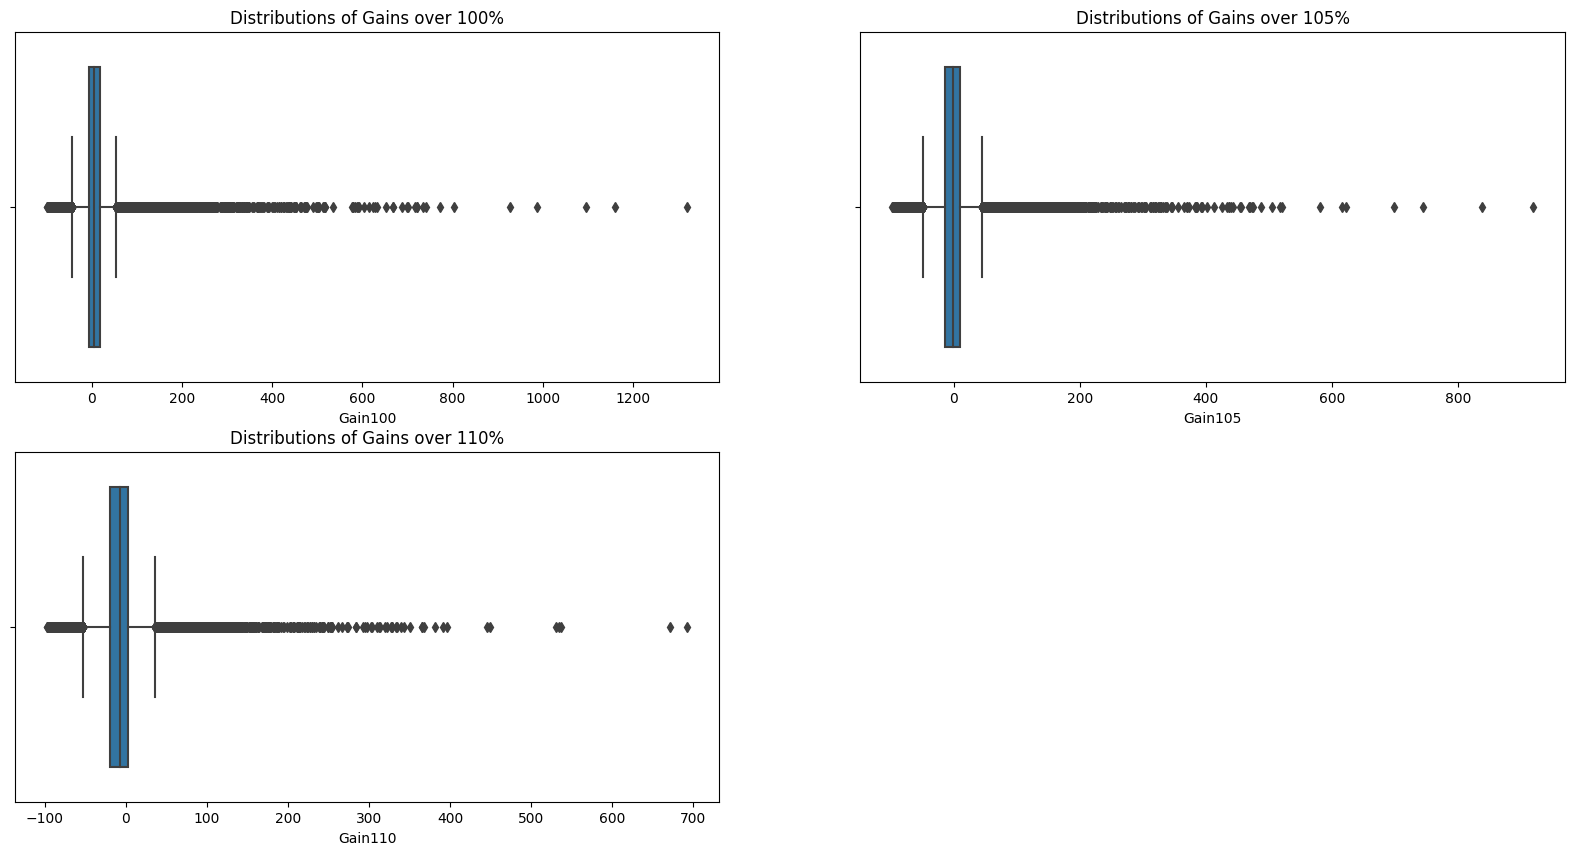

In [13]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(data=data, x="Gain100")
plt.title("Distributions of Gains over 100%")
plt.subplot(2,2,2)
sns.boxplot(data=data, x="Gain105")
plt.title("Distributions of Gains over 105%")
plt.subplot(2,2,3)
sns.boxplot(data=data, x="Gain110")
plt.title("Distributions of Gains over 110%")
plt.show()

In [14]:
print("---------------------------------------------------------------------------\nGain% over 100 (Q1, Q2, Q3)\n")
print(data["Gain100"].quantile(0.25),"%, ", data["Gain100"].quantile(0.50),"%, ", data["Gain100"].quantile(0.75),"%, ")
print("---------------------------------------------------------------------------\nGain% over 105 (Q1, Q2, Q3)\n")
print(data["Gain105"].quantile(0.25),"%, ", data["Gain105"].quantile(0.50),"%, ", data["Gain105"].quantile(0.75),"%, ")
print("---------------------------------------------------------------------------\nGain% over 110 (Q1, Q2, Q3)\n")
print(data["Gain110"].quantile(0.25),"%, ", data["Gain110"].quantile(0.50),"%, ", data["Gain110"].quantile(0.75),"%, ")

---------------------------------------------------------------------------
Gain% over 100 (Q1, Q2, Q3)

-7.6407126841242174 %,  4.9507209447844165 %,  16.987024622132644 %, 
---------------------------------------------------------------------------
Gain% over 105 (Q1, Q2, Q3)

-13.763700987690056 %,  -1.4536269569823268 %,  9.532406953186758 %, 
---------------------------------------------------------------------------
Gain% over 110 (Q1, Q2, Q3)

-19.23664627518469 %,  -7.116577129439216 %,  3.0051228469444906 %, 


In [15]:
data["Greater100"]=data["Gain100"] > 0
data["Greater105"]=data["Gain105"] > 0
data["Greater110"]=data["Gain110"] > 0

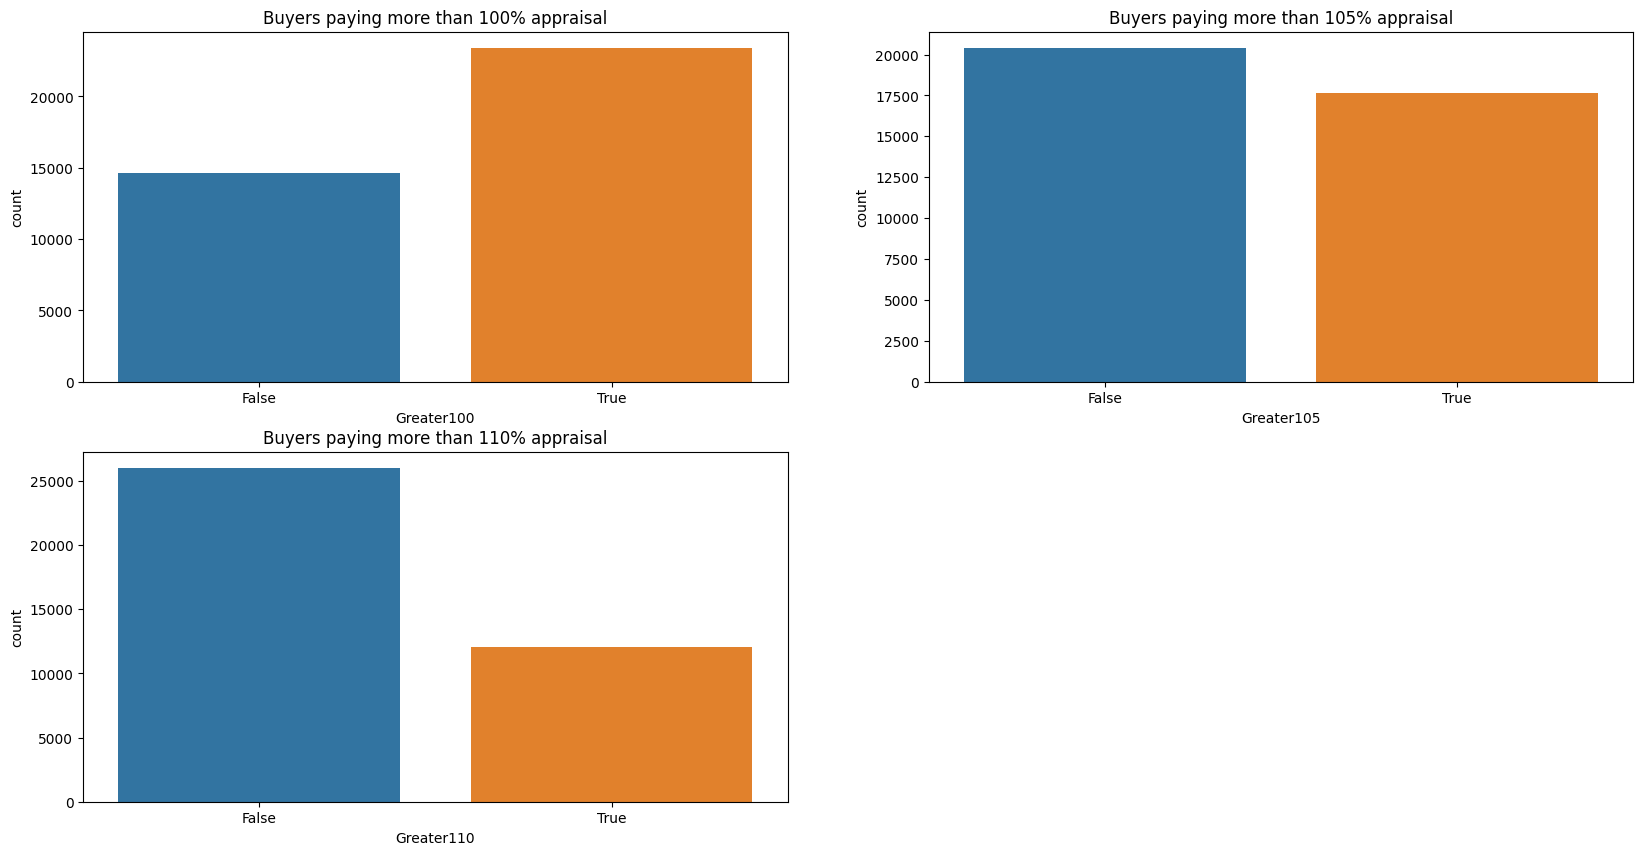

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(data=data, x="Greater100")
plt.title("Buyers paying more than 100% appraisal")
plt.subplot(2,2,2)
sns.countplot(data=data, x="Greater105")
plt.title("Buyers paying more than 105% appraisal")
plt.subplot(2,2,3)
sns.countplot(data=data, x="Greater110")
plt.title("Buyers paying more than 110% appraisal")
plt.show()

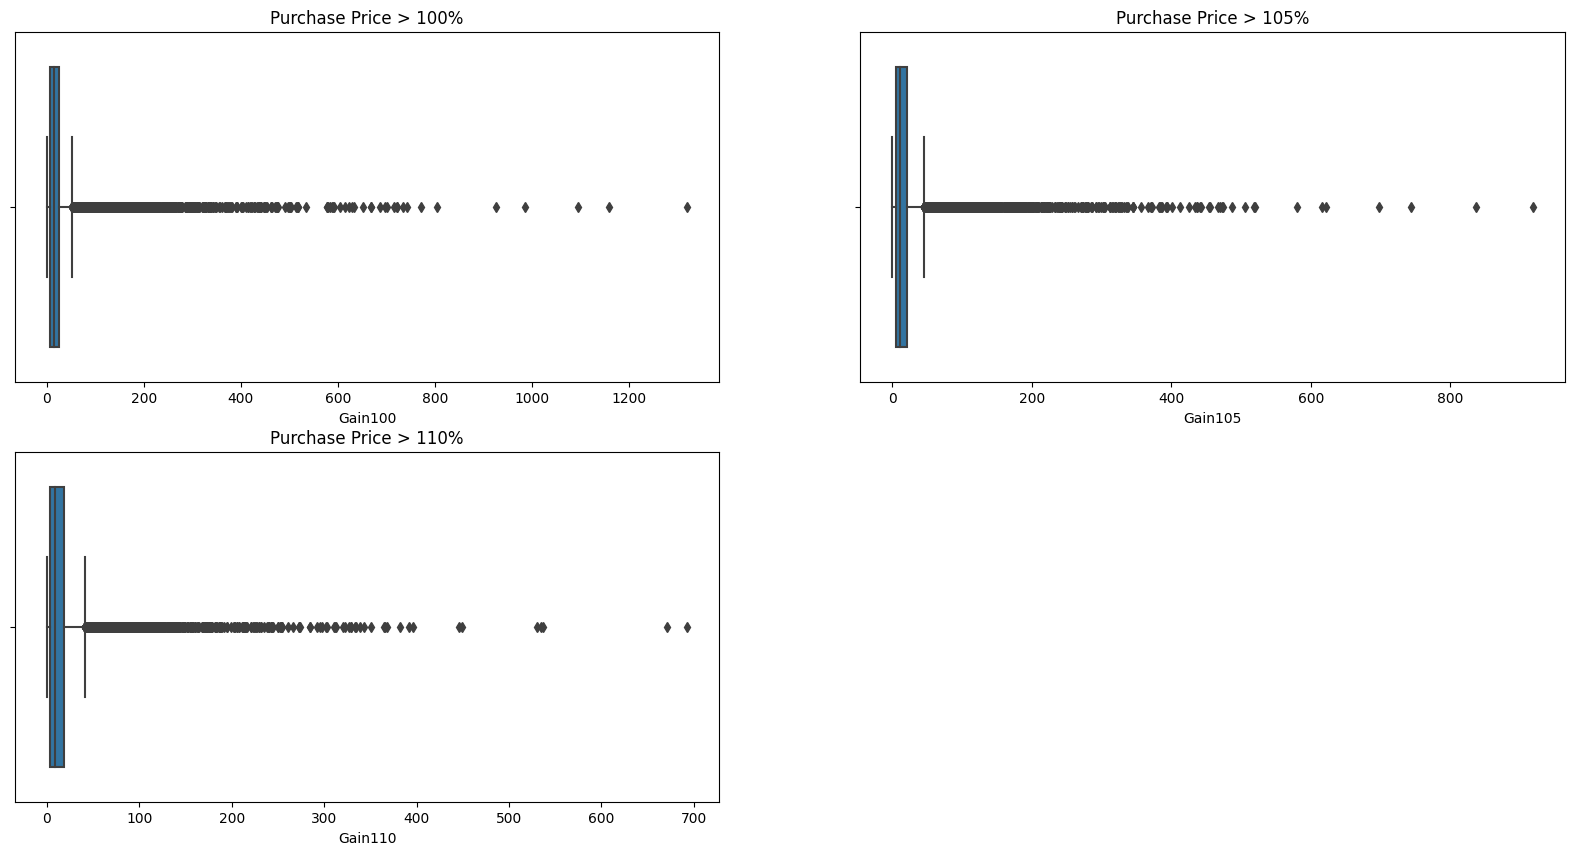

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(data=data[data["Greater100"]], x="Gain100")
plt.title("Purchase Price > 100%")
plt.subplot(2,2,2)
sns.boxplot(data=data[data["Greater105"]], x="Gain105")
plt.title("Purchase Price > 105%")
plt.subplot(2,2,3)
sns.boxplot(data=data[data["Greater110"]], x="Gain110")
plt.title("Purchase Price > 110%")
plt.show()

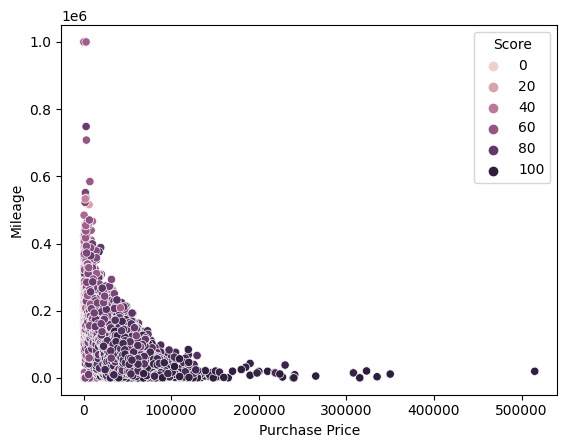

In [18]:
sns.scatterplot(data=data, x="Purchase Price", y="Mileage", hue="Score")
plt.show()

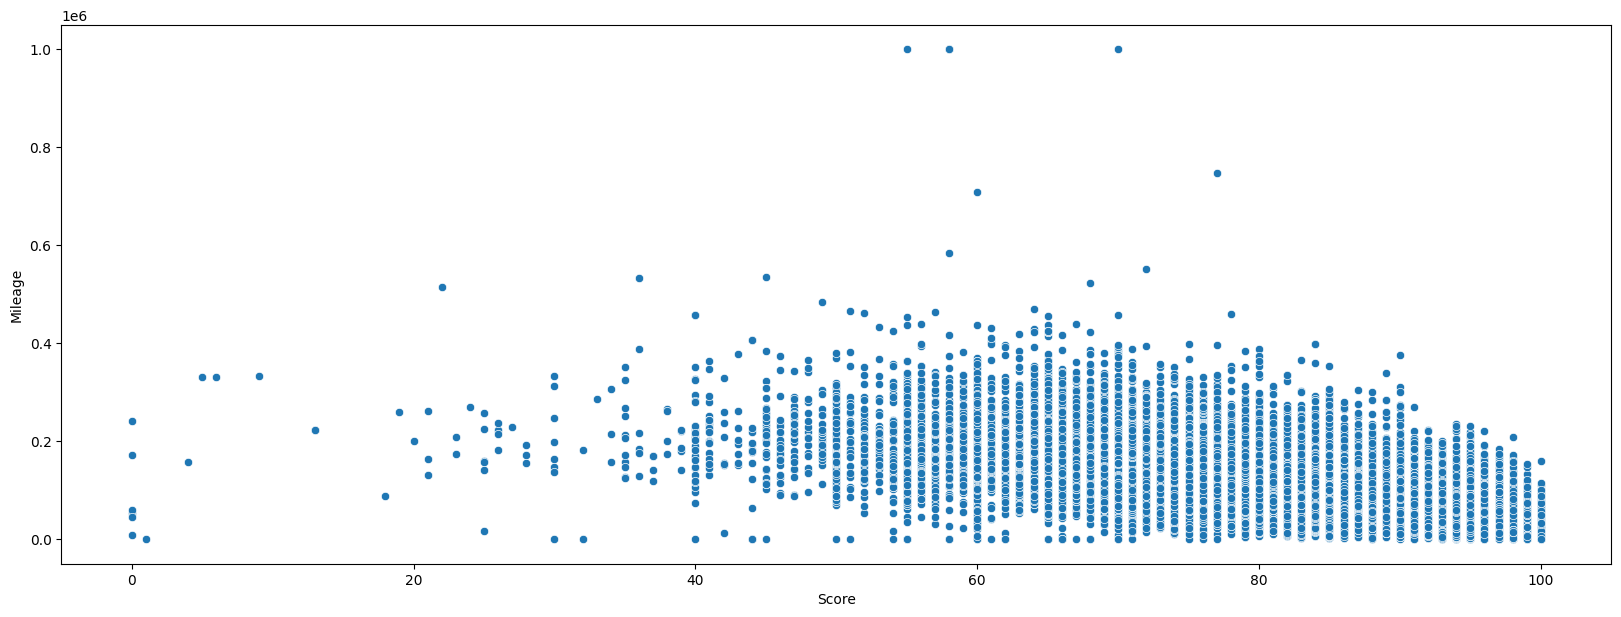

In [19]:
plt.figure(figsize=(20, 7))
sns.scatterplot(data=data, x="Score", y="Mileage")
plt.show()

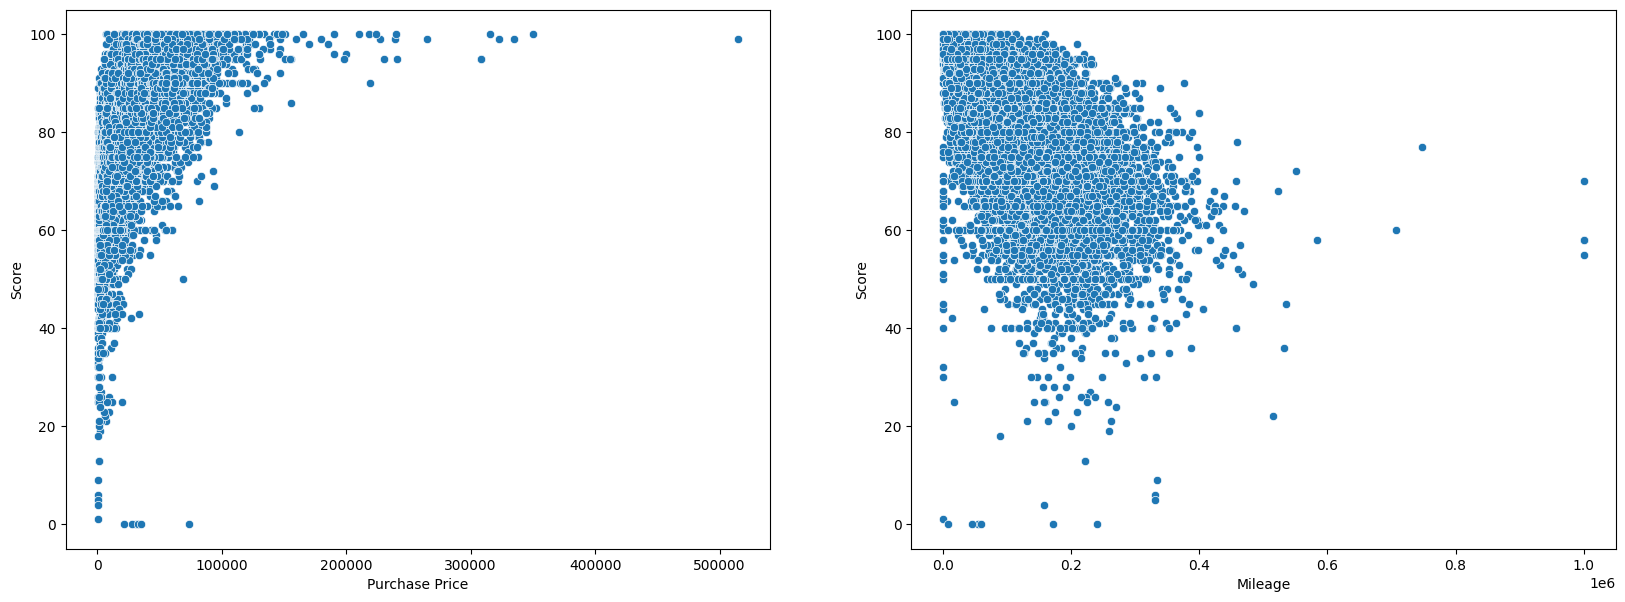

In [20]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
sns.scatterplot(data=data, x="Purchase Price", y="Score")
plt.subplot(1,2,2)
sns.scatterplot(data=data, x="Mileage", y="Score")
plt.show()

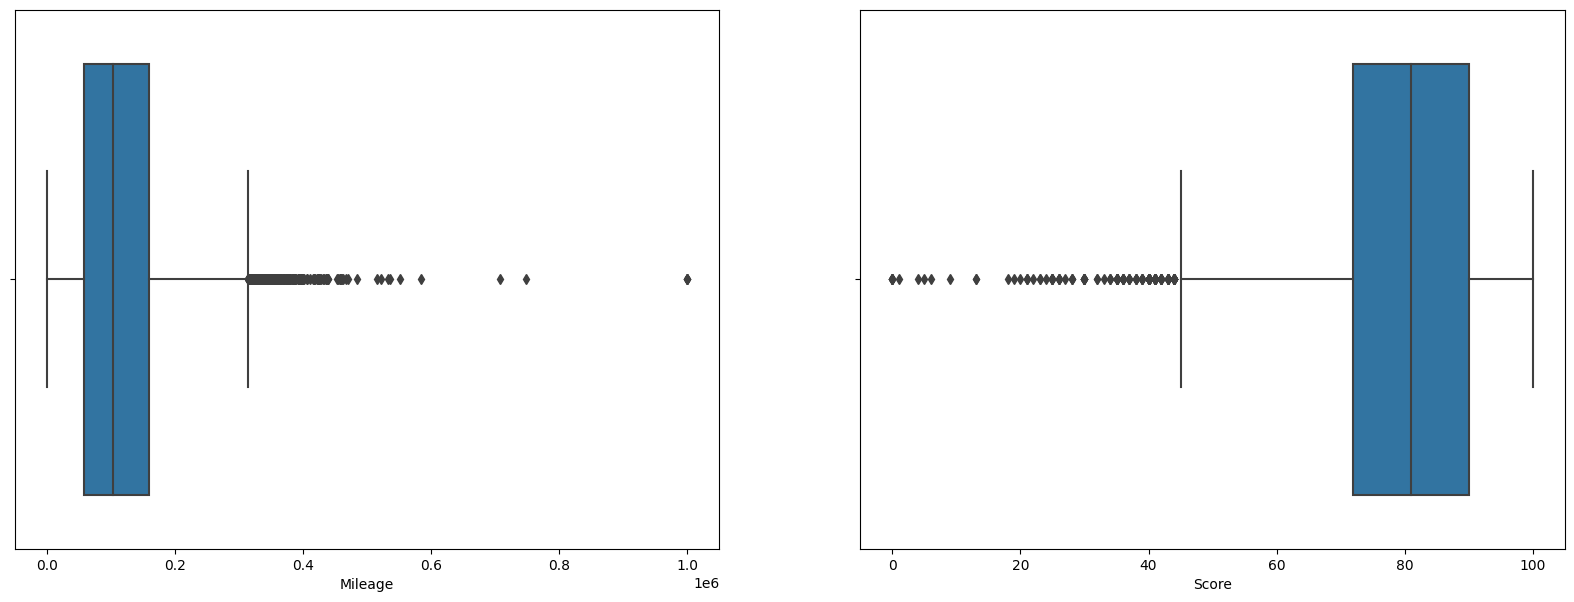

In [21]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
sns.boxplot(data=data, x="Mileage")
plt.subplot(1,2,2)
sns.boxplot(data=data, x="Score")
plt.show()

In [22]:
print("---------------------------------------------------------------------------\nMileage (Q1, Q2, Q3)\n")
print(data["Mileage"].quantile(0.25), data["Mileage"].quantile(0.50), data["Mileage"].quantile(0.75))
print("---------------------------------------------------------------------------\nVehicle Score 105 (Q1, Q2, Q3)\n")
print(data["Score"].quantile(0.25), data["Score"].quantile(0.50), data["Score"].quantile(0.75))

---------------------------------------------------------------------------
Mileage (Q1, Q2, Q3)

57234.0 103523.5 160018.25
---------------------------------------------------------------------------
Vehicle Score 105 (Q1, Q2, Q3)

72.0 81.0 90.0


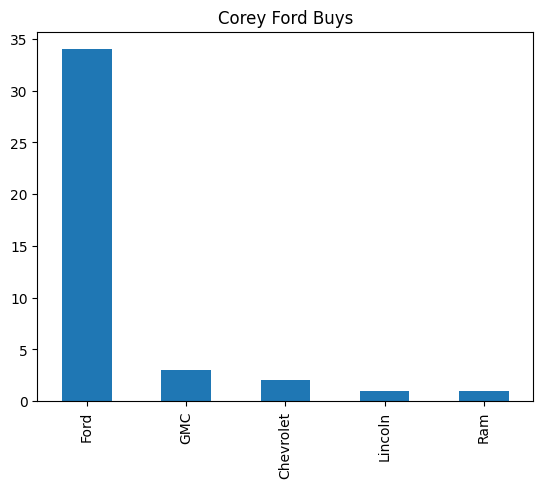

In [23]:
data[data["Buyer"] == "Corey Ford"]["Make"].value_counts().plot(kind="bar")
plt.title("Corey Ford Buys")
plt.show()

## Feature Extraction and Lead Score

In [24]:
def loyalty_index(data: pd.DataFrame, buyer: str, make: str, model: str):
    buyer_count = len(data["Buyer"][data["Buyer"] == buyer])
    brand_buys = len(data["Buyer"][(data["Model"] == model) & (data["Make"] == make) & (data["Buyer"] == buyer)])
    loyalty_index = brand_buys / buyer_count
    return loyalty_index

In [25]:
def gain_score(result, buyer:str):

    buyer_row = result[(result['Buyer'] == buyer)]

    if(buyer_row["Gain110"].values[0] > 0):
        return (buyer_row["Gain110"].values[0]/100)*buyer_row["Greater110"].values[0]
    elif(buyer_row["Gain105"].values[0] > 0):
        return (buyer_row["Gain105"].values[0]/100)*buyer_row["Greater105"].values[0]*.75
    elif(buyer_row["Gain100"].values[0] > 0):
        return (buyer_row["Gain100"].values[0]/100)*buyer_row["Greater100"].values[0]*.5
    else:
        return (buyer_row["Gain100"].values[0]/100)*(buyer_row["Purchase Count"].values[0] - buyer_row["Greater100"].values[0])


In [26]:
def repeat_purchase_delay(data: pd.DataFrame, buyer: str, make: str, model: str):
  day = 86400000000000
  dates = data[(data["Model"] == model) & (data["Make"] == make) & (data["Buyer"] == buyer)].sort_values(by="Date")["Date"].values
  diff = 0
  nat = 0
  if(len(dates) > 1):
    for i in range(1, len(dates)):
      date = dates[i]
      prev = dates[i-1]
      if(date is pd.NaT):
        nat += 1
      else:
        try:
          diff += float(date - prev) / day
          # print(diff)
        except Exception:
          # print(diff)
          nat += 1
    try:
      return diff / (len(dates) - nat - 1)
    except:
      # print(len(dates), nat)
      return None
  else:
    return None


In [27]:
repeat_purchase_delay(data, "Automobiles Paille Inc.", "Ford", "F-150")

2.0081967213114753

In [28]:
def customer_churn(data: pd.DataFrame, buyer: str, make: str, model: str):
  buyer_data = data[["Buyer", "Date"]][(data["Model"] == model) & (data["Make"] == make) & (data["Buyer"] == buyer)]
  date_data = buyer_data.groupby("Date").size().reset_index(name='sales_count')
  date_data['date_ordinal'] = pd.to_datetime(date_data['Date']).apply(lambda date: date.toordinal())
  if(len(date_data) == 0):
    return None
  corr = date_data[['date_ordinal', 'sales_count']].corr()
  return corr["date_ordinal"]["sales_count"]

In [29]:
customer_churn(data, "Bridge Valley", "Ford", "F-150")

-0.024323094544489884

In [30]:
customer_churn(data, "The Approval Guys", "Ford", "F-150")

nan

In [31]:
customer_churn(data, "Automobiles Paille Inc.", "Ford", "F-150")

0.1494070588854233

In [32]:
def market_share(data,buyer_name):
    filter_by_buyer=data[data["Buyer"]==buyer_name]
    total_buys=len(filter_by_buyer)
    total_buys_over_110=len(filter_by_buyer[(filter_by_buyer["Purchase Price"] > filter_by_buyer["110"])])
    return total_buys_over_110/total_buys

In [33]:
market_share(data, "Bridge Valley")

0.17715617715617715

In [34]:
def lead_score(result: pd.DataFrame, buyer:str):

    score = 0

    buyer_row = result[result["Buyer"] == buyer]

    if(buyer_row["Score"].values[0] < result['Score'].quantile(0.25)):
        score += .5
    elif(buyer_row["Score"].values[0] < result['Score'].quantile(0.75)):
        score += 1
    else:
        score += .5

    if(buyer_row["Mileage"].values[0] < result['Mileage'].quantile(0.25)):
        score += .5
    elif(buyer_row["Mileage"].values[0] < result['Mileage'].quantile(0.75)):
        score += 1
    else:
        score += .5


    score += buyer_row["Consistent Buys"].values[0]
    # score += buyer_row["Gain Score"].values[0]

    # score += 1/buyer_row["Repeat Purchase Delay"].values[0]
    # score += buyer_row["Churn"].values[0]

    return score

In [35]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def filter_dataset(df: pd.DataFrame, make: str, model: str):
    # Filter the DataFrame for the specified make and model
    filtered_df = df[(df['Make'] == make) & (df['Model'] == model)]

    # Group by 'Buyer' and calculate the mean of other columns
    result = filtered_df.groupby(['Buyer', 'Make', 'Model']).agg({
        'Purchase Price': 'mean',  # Calculate the mean purchase price
        "90": 'mean',                 # Calculate the mean for column '90'
        "95": 'mean',                 # Calculate the mean for column '95'
        "100": 'mean',                # Calculate the mean for column '100'
        "105": 'mean',                # Calculate the mean for column '105'
        "110": 'mean',                # Calculate the mean for column '110'
        "Score": 'mean',
        "Mileage": "mean",
        "Gain100": "mean",
        "Gain105": "mean",
        "Gain110": "mean",
        "Greater100": "sum",
        "Greater105": "sum",
        "Greater110": "sum",
    }).reset_index()

    # Count the number of purchases per buyer
    purchase_count = filtered_df['Buyer'].value_counts().reset_index()
    purchase_count.columns = ['Buyer', 'Purchase Count']  # Rename columns for clarity

    result = pd.merge(result, purchase_count, on='Buyer', how='left')  # Merge on 'Buyer' column
    result['Loyalty Index'] = result['Buyer'].apply(lambda x: loyalty_index(df, x, make, model))
    result['Consistent Buys'] = result['Loyalty Index']*result['Purchase Count']
    result["Gain Score"] = result['Buyer'].apply(lambda x: gain_score(result, x))
    result["Repeat Purchase Delay"] = result["Buyer"].apply(lambda x: repeat_purchase_delay(df, x, make, model))
    result["Churn"] = result["Buyer"].apply(lambda x: customer_churn(df, x, make, model))
    result["Market Share"] = result["Buyer"].apply(lambda x: market_share(df, x))

    scaler = MinMaxScaler()

    result['Consistent Buys'] = scaler.fit_transform(result['Consistent Buys'].values.reshape(-1, 1))
    result['Gain Score'] = scaler.fit_transform(result['Gain Score'].values.reshape(-1, 1))
    result['Lead Score'] = result['Buyer'].apply(lambda x: lead_score(result, x))

    return result


result = filter_dataset(data, "Ford", "F-150")  # Filter the dataset for Ford F-150
result = result.sort_values(by='Market Share', ascending=False)  # Sort the result by 'Purchase Count'
result.reset_index(drop=True, inplace=True)  # Reset the index and modify the DataFrame in place
result[:20]  # Display the final result

,Buyer,Make,Model,Purchase Price,90,95,100,105,110,Score,...,Greater105,Greater110,Purchase Count,Loyalty Index,Consistent Buys,Gain Score,Repeat Purchase Delay,Churn,Market Share,Lead Score
0,Wheels & Deals,Ford,F-150,15000.000000,5461.000000,6022.000000,6583.000000,7144.000000,7705.000000,68.000000,...,1,1,1,0.500000,0.009116,0.848765,NaN,NaN,1.000000,1.509116
1,HC & W Enterprise Corp,Ford,F-150,52500.000000,34878.000000,36965.000000,39052.000000,41139.000000,43226.000000,93.000000,...,1,1,1,1.000000,0.018329,0.776193,NaN,NaN,1.000000,1.018329
2,Mackenzie Auto Ltd. - SK,Ford,F-150,56900.000000,38402.000000,40820.000000,43238.000000,45656.000000,48074.000000,95.000000,...,1,1,1,1.000000,0.018329,0.773125,NaN,NaN,1.000000,1.018329
3,AFK Auto Wholesaler LTD,Ford,F-150,10500.000000,10323.000000,11321.000000,12319.000000,13317.000000,14315.000000,65.000000,...,0,0,1,0.111111,0.001949,0.740295,NaN,NaN,0.888889,1.001949
4,Pacific Nations Auto Sales And Finance Ltd,Ford,F-150,34500.000000,29214.000000,31213.333333,33212.666667,35212.000000,37211.333333,76.000000,...,2,1,3,0.071429,0.003851,0.759199,28.5,1.0,0.857143,2.003851
5,Legacy Cars - Legacy Auto Sales Inc,Ford,F-150,53500.000000,34083.000000,36220.000000,38357.000000,40494.000000,42631.000000,90.000000,...,1,1,1,0.018868,0.000250,0.780198,NaN,NaN,0.849057,1.000250
6,Kamloops Honda Cars,Ford,F-150,43500.000000,35501.000000,37666.000000,39831.000000,41996.000000,44161.000000,96.000000,...,1,0,1,0.037037,0.000584,0.757592,NaN,NaN,0.814815,1.000584
7,Vernon Nissan - Vernon Titanium Autogroup Ltd.,Ford,F-150,33900.000000,31080.000000,33130.000000,35179.000000,37228.000000,39278.000000,75.000000,...,0,0,1,0.020408,0.000278,0.751326,NaN,NaN,0.795918,2.000278
8,Seattle Direct Auto Sales,Ford,F-150,18000.000000,11722.000000,12725.000000,13729.000000,14733.000000,15736.000000,76.000000,...,1,1,1,0.043478,0.000703,0.769189,NaN,NaN,0.782609,2.000703
9,Morrey Volvo Of Burnaby,Ford,F-150,40250.000000,34152.000000,36380.000000,38609.000000,40838.000000,43066.000000,73.000000,...,0,0,1,0.090909,0.001577,0.757036,NaN,NaN,0.727273,1.501577


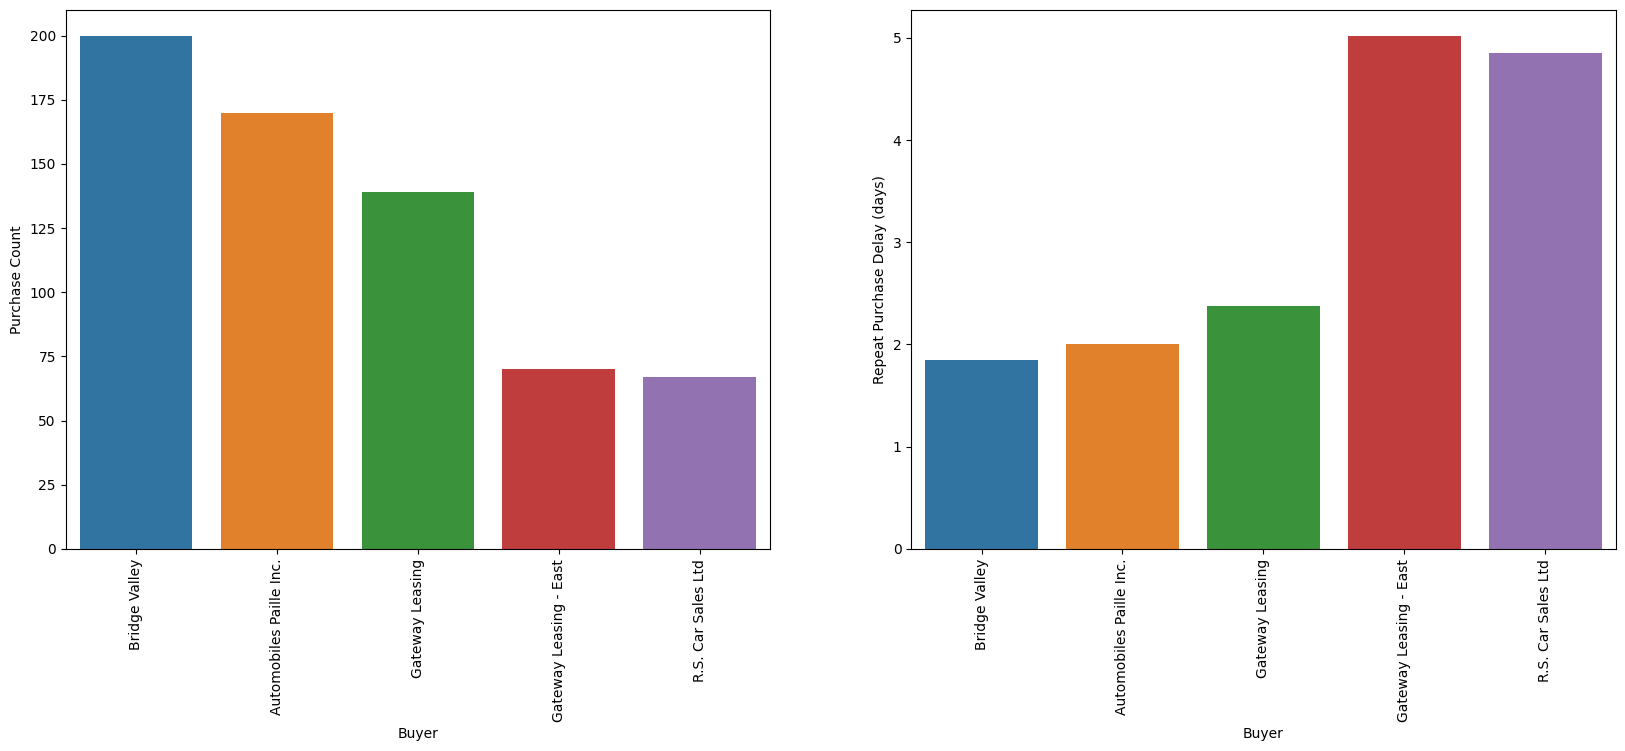

In [36]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,2)
ax1 = sns.barplot(data=result.sort_values(by="Purchase Count", ascending=False).head(5), x="Buyer", y="Repeat Purchase Delay")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.ylabel("Repeat Purchase Delay (days)")
plt.subplot(1,2,1)
ax2 = sns.barplot(data=result.sort_values(by="Purchase Count", ascending=False).head(5), x="Buyer", y="Purchase Count")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.show()

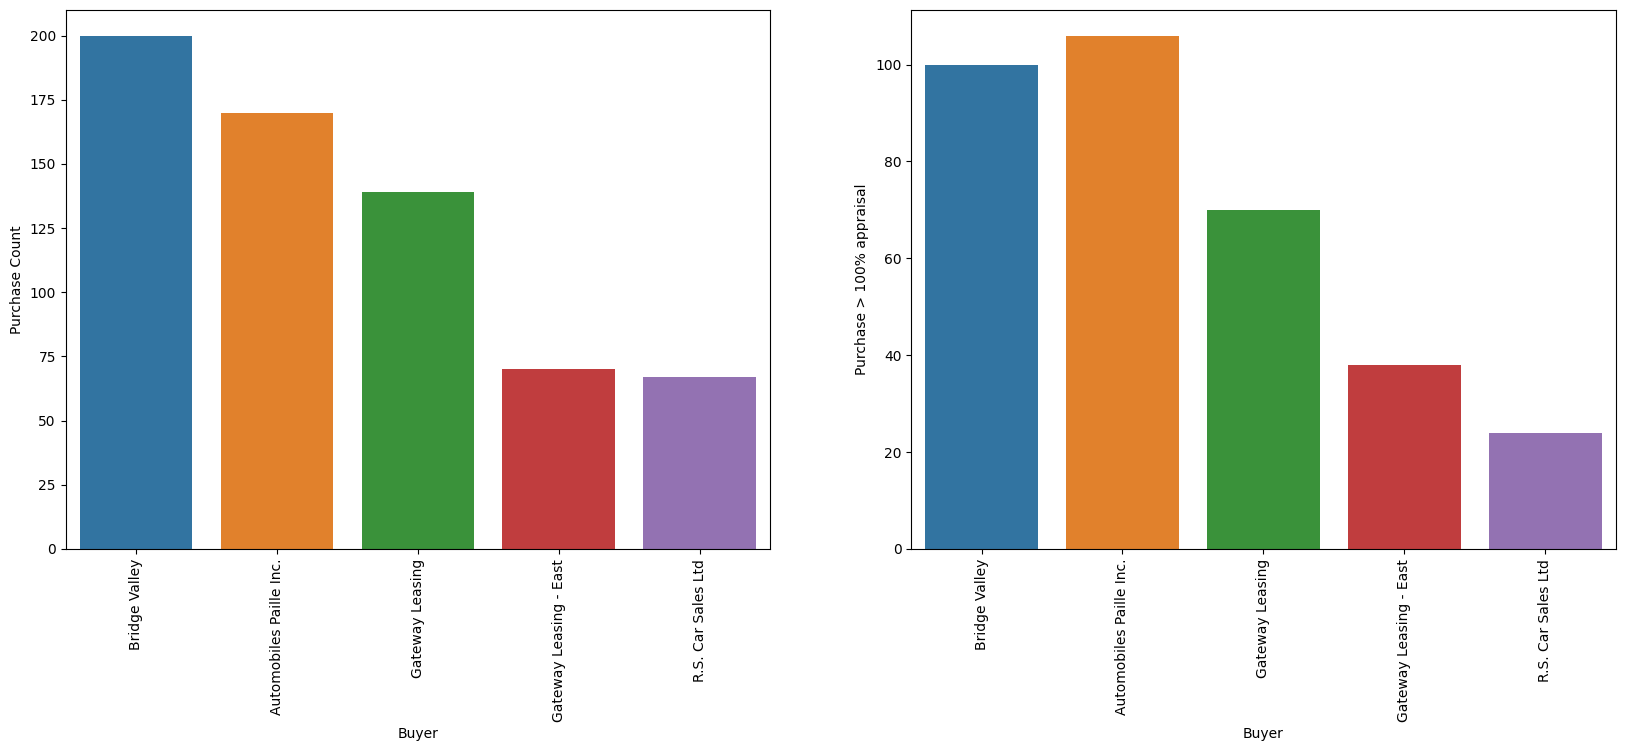

In [37]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,2)
ax1 = sns.barplot(data=result.sort_values(by="Purchase Count", ascending=False).head(5), x="Buyer", y="Greater100")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.ylabel("Purchase > 100% appraisal")
plt.subplot(1,2,1)
ax2 = sns.barplot(data=result.sort_values(by="Purchase Count", ascending=False).head(5), x="Buyer", y="Purchase Count")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.show()

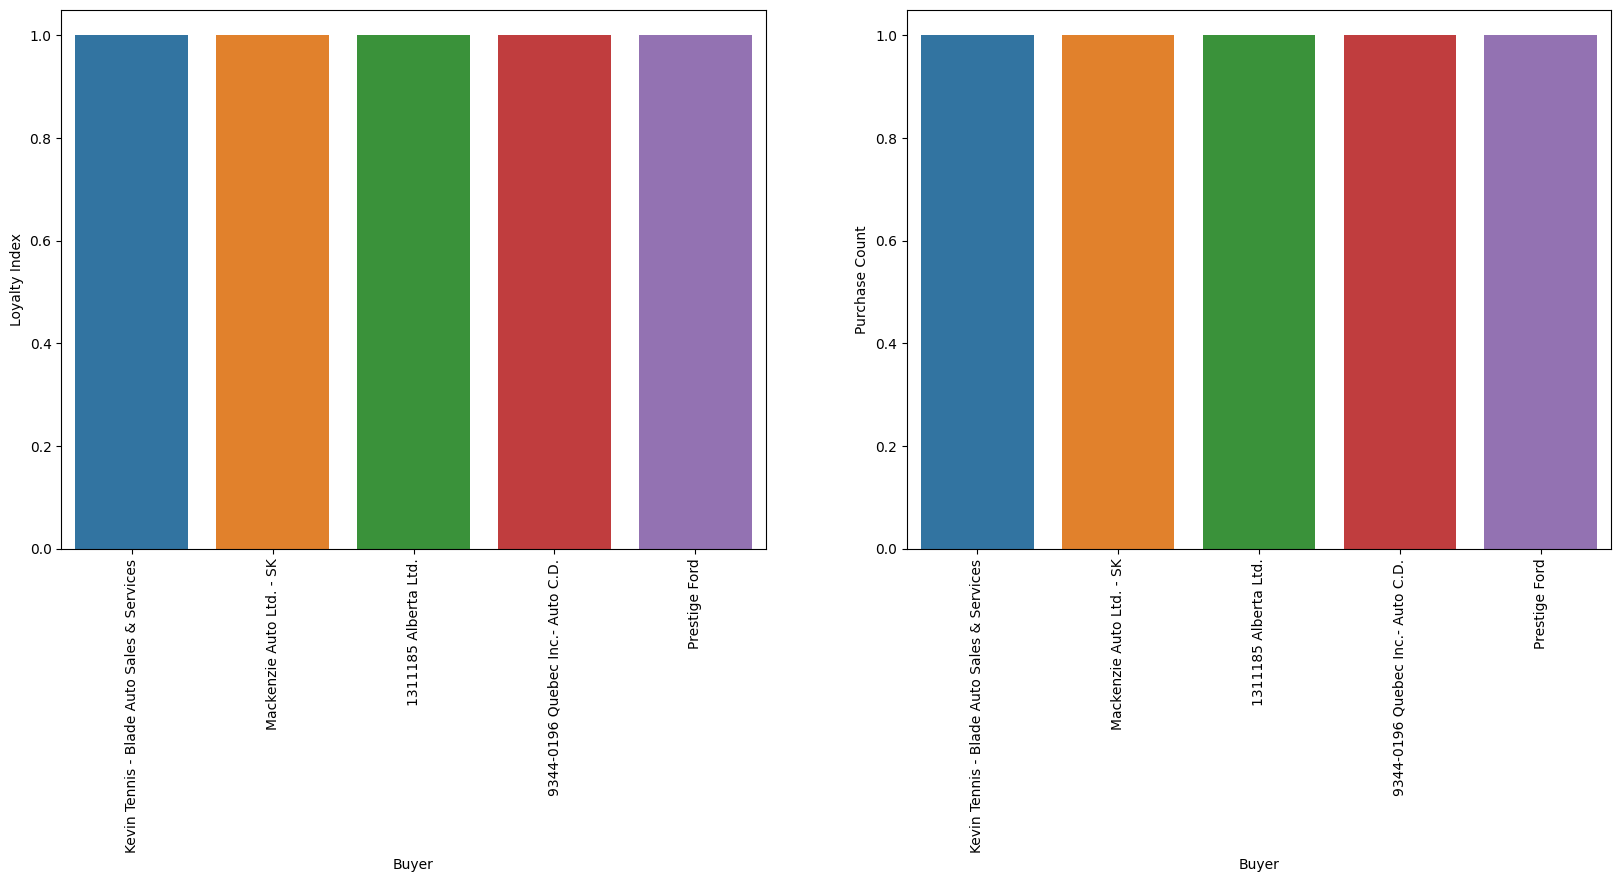

In [38]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
ax1 = sns.barplot(data=result.sort_values(by="Loyalty Index", ascending=False).head(), x="Buyer", y="Loyalty Index")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.subplot(1,2,2)
ax2 = sns.barplot(data=result.sort_values(by="Loyalty Index", ascending=False).head(), x="Buyer", y="Purchase Count")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.show()

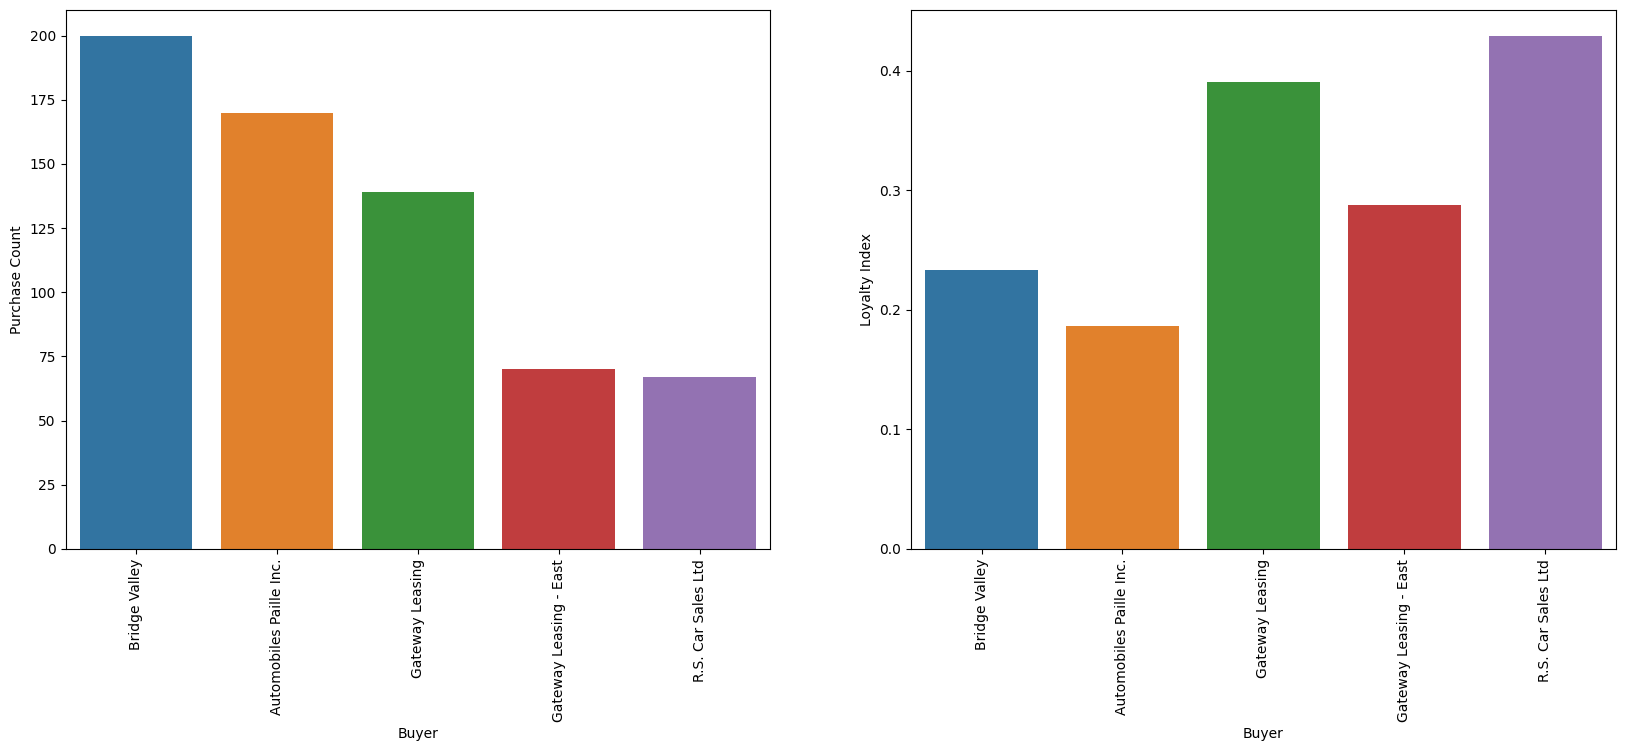

In [39]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,2)
ax1 = sns.barplot(data=result.sort_values(by="Purchase Count", ascending=False).head(), x="Buyer", y="Loyalty Index")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.subplot(1,2,1)
ax2 = sns.barplot(data=result.sort_values(by="Purchase Count", ascending=False).head(), x="Buyer", y="Purchase Count")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.show()

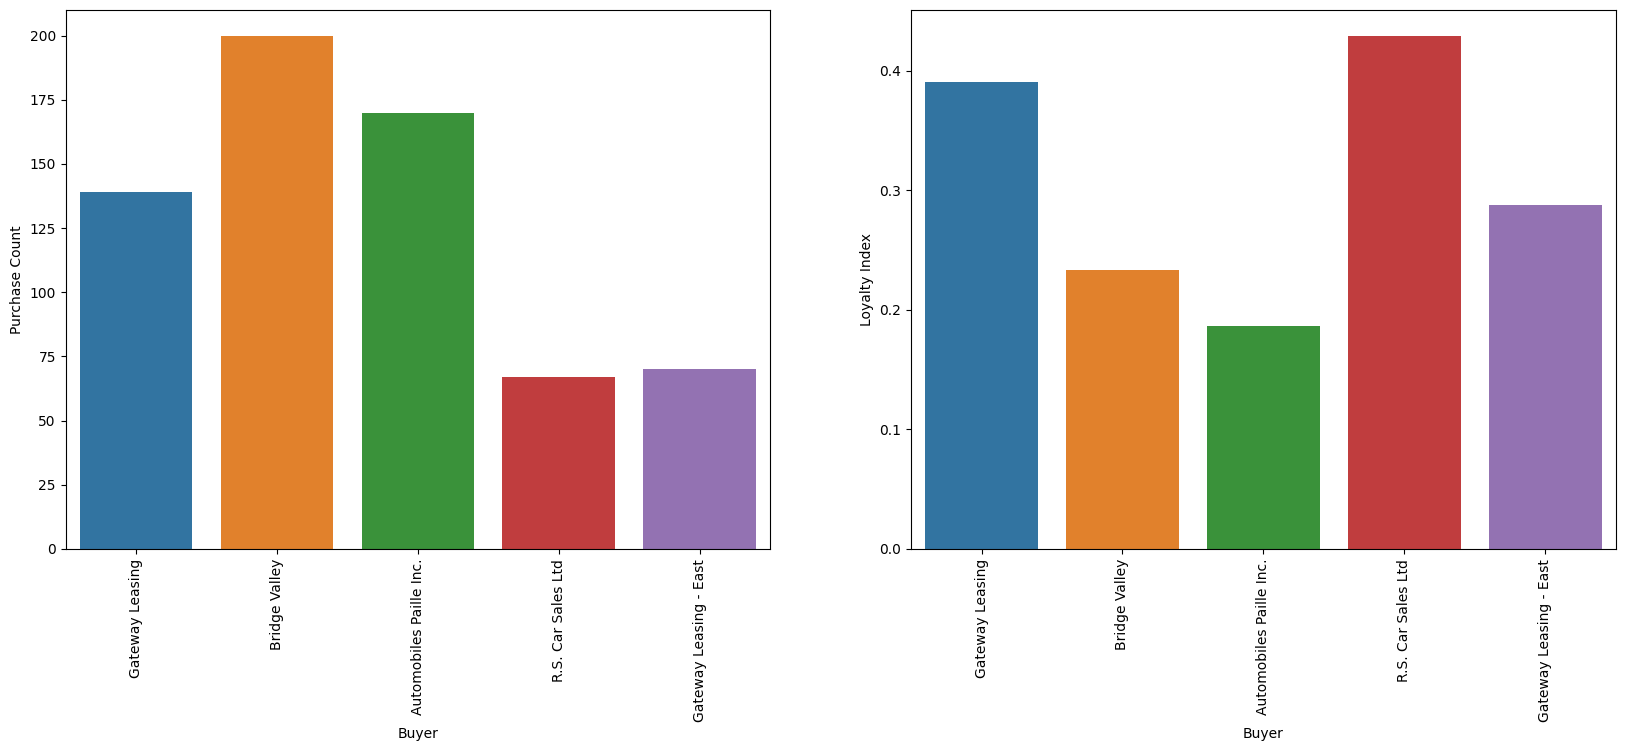

In [40]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,2)
ax1 = sns.barplot(data=result.sort_values(by="Consistent Buys", ascending=False).head(), x="Buyer", y="Loyalty Index")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.subplot(1,2,1)
ax2 = sns.barplot(data=result.sort_values(by="Consistent Buys", ascending=False).head(), x="Buyer", y="Purchase Count")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.show()

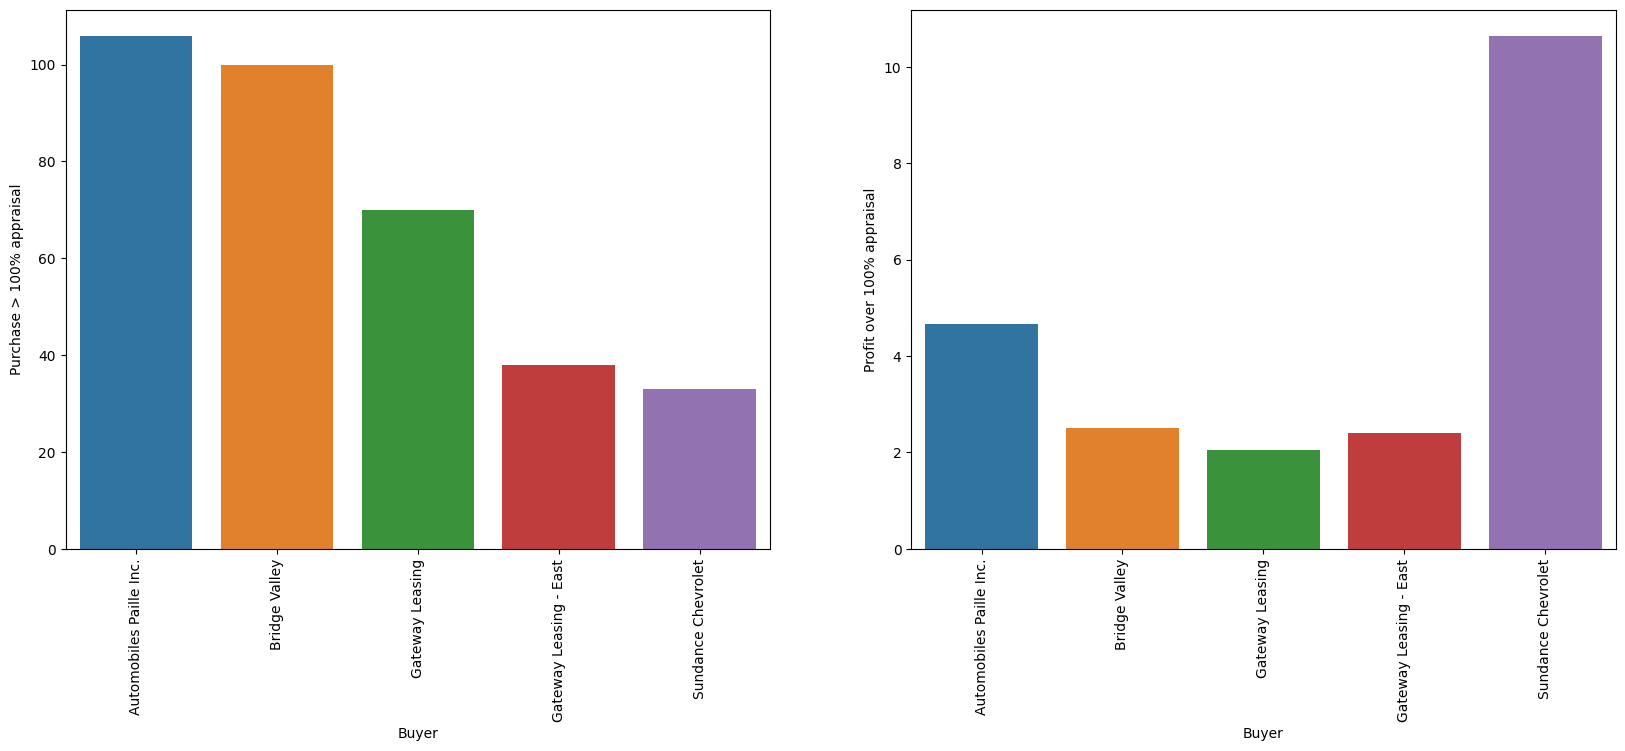

In [41]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
ax1 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Greater100", ascending=False).head(), x="Buyer", y="Greater100")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.ylabel("Purchase > 100% appraisal")
plt.subplot(1,2,2)
ax2 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Greater100", ascending=False).head(), x="Buyer", y="Gain100")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.ylabel("Profit over 100% appraisal")
plt.show()

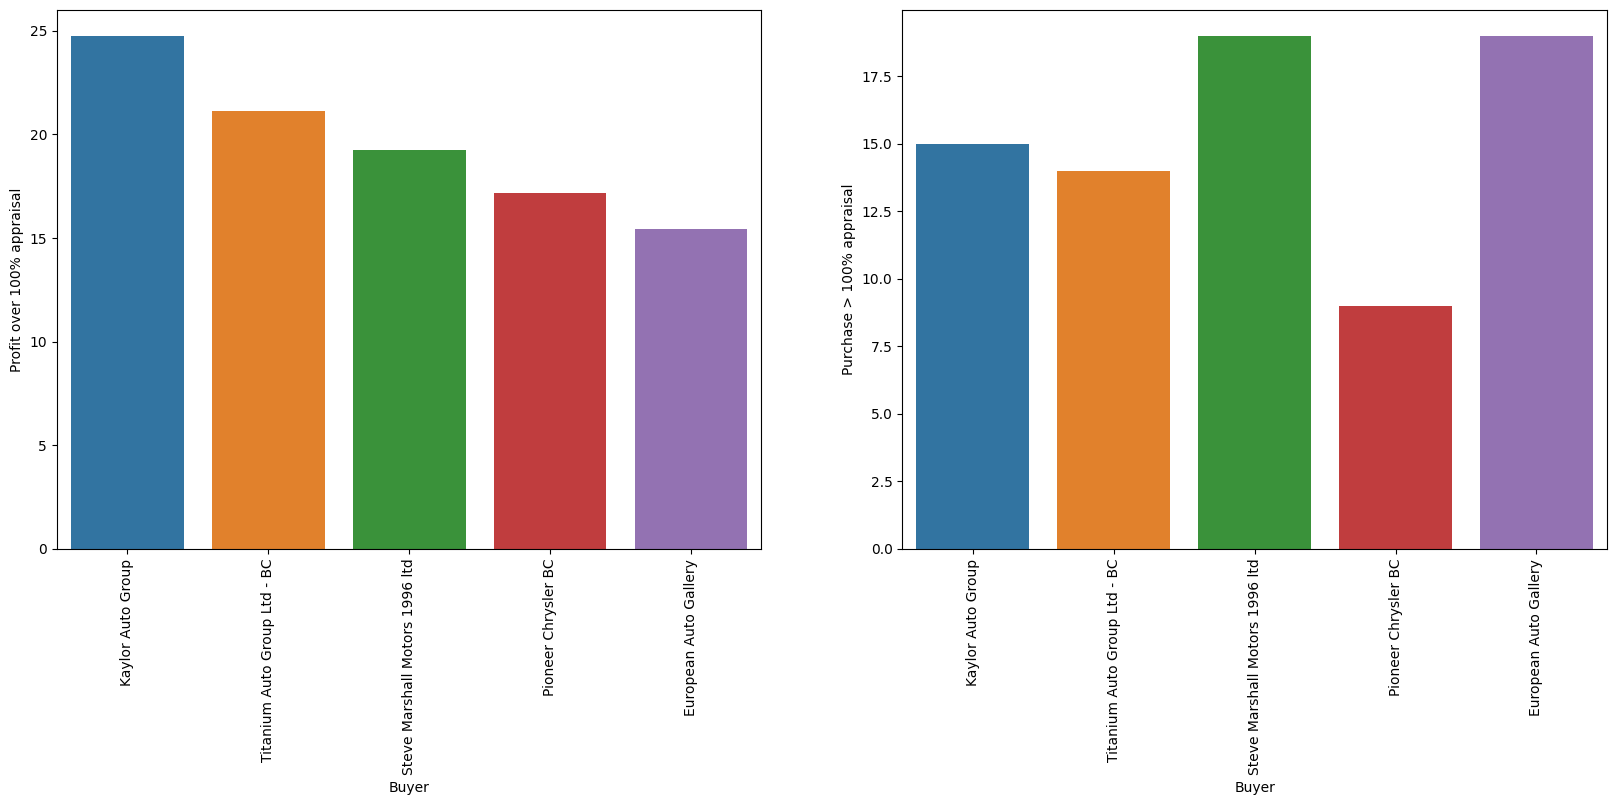

In [42]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,2)
ax1 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Gain100", ascending=False).head(), x="Buyer", y="Greater100")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.ylabel("Purchase > 100% appraisal")
plt.subplot(1,2,1)
ax2 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Gain100", ascending=False).head(), x="Buyer", y="Gain100")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.ylabel("Profit over 100% appraisal")
plt.show()

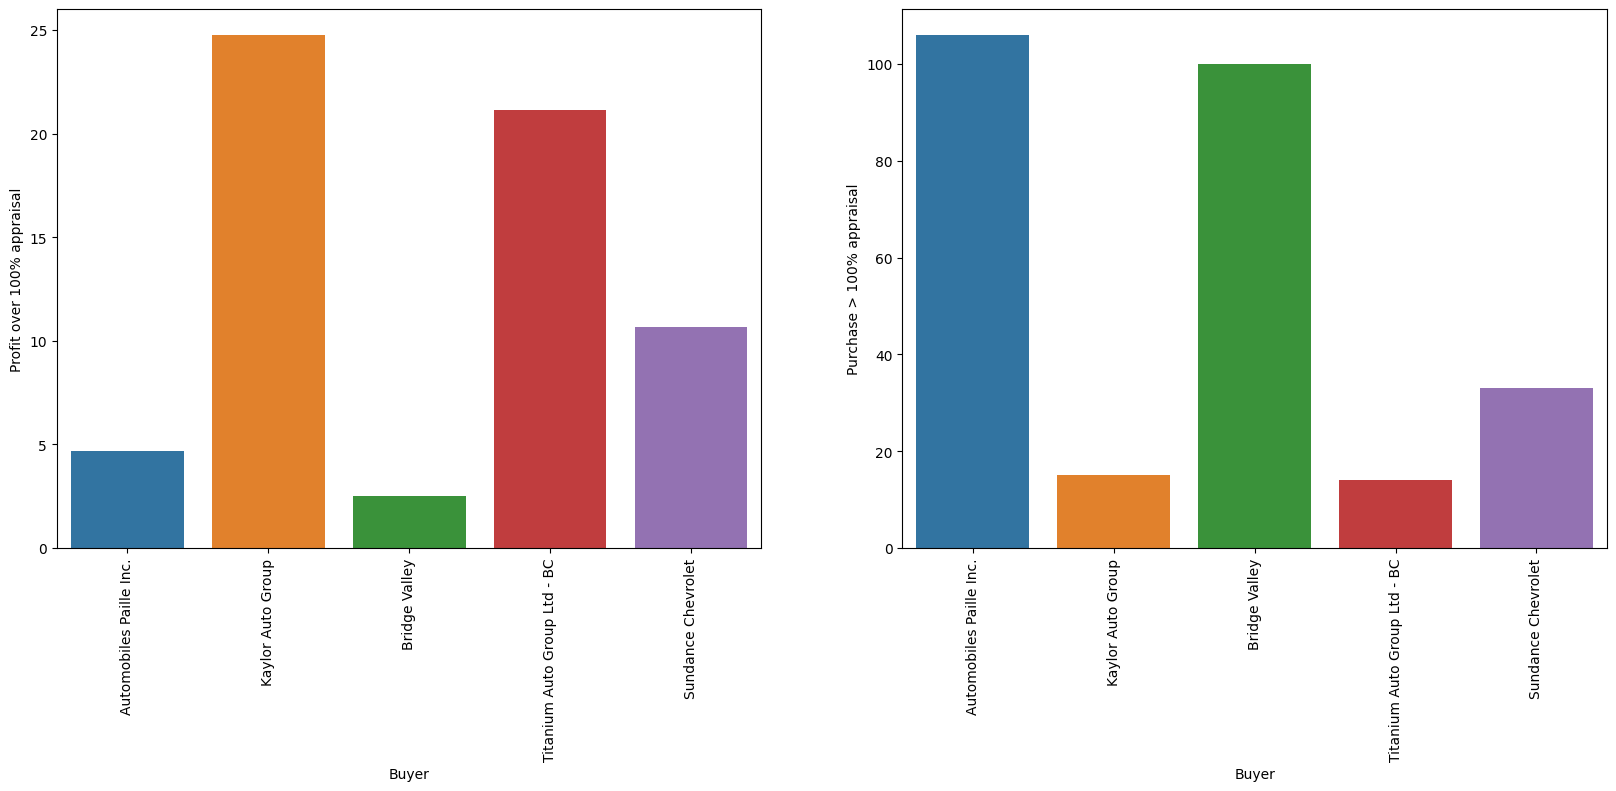

In [43]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,2)
ax1 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Gain Score", ascending=False).head(), x="Buyer", y="Greater100")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.ylabel("Purchase > 100% appraisal")
plt.subplot(1,2,1)
ax2 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Gain Score", ascending=False).head(), x="Buyer", y="Gain100")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.ylabel("Profit over 100% appraisal")
plt.show()

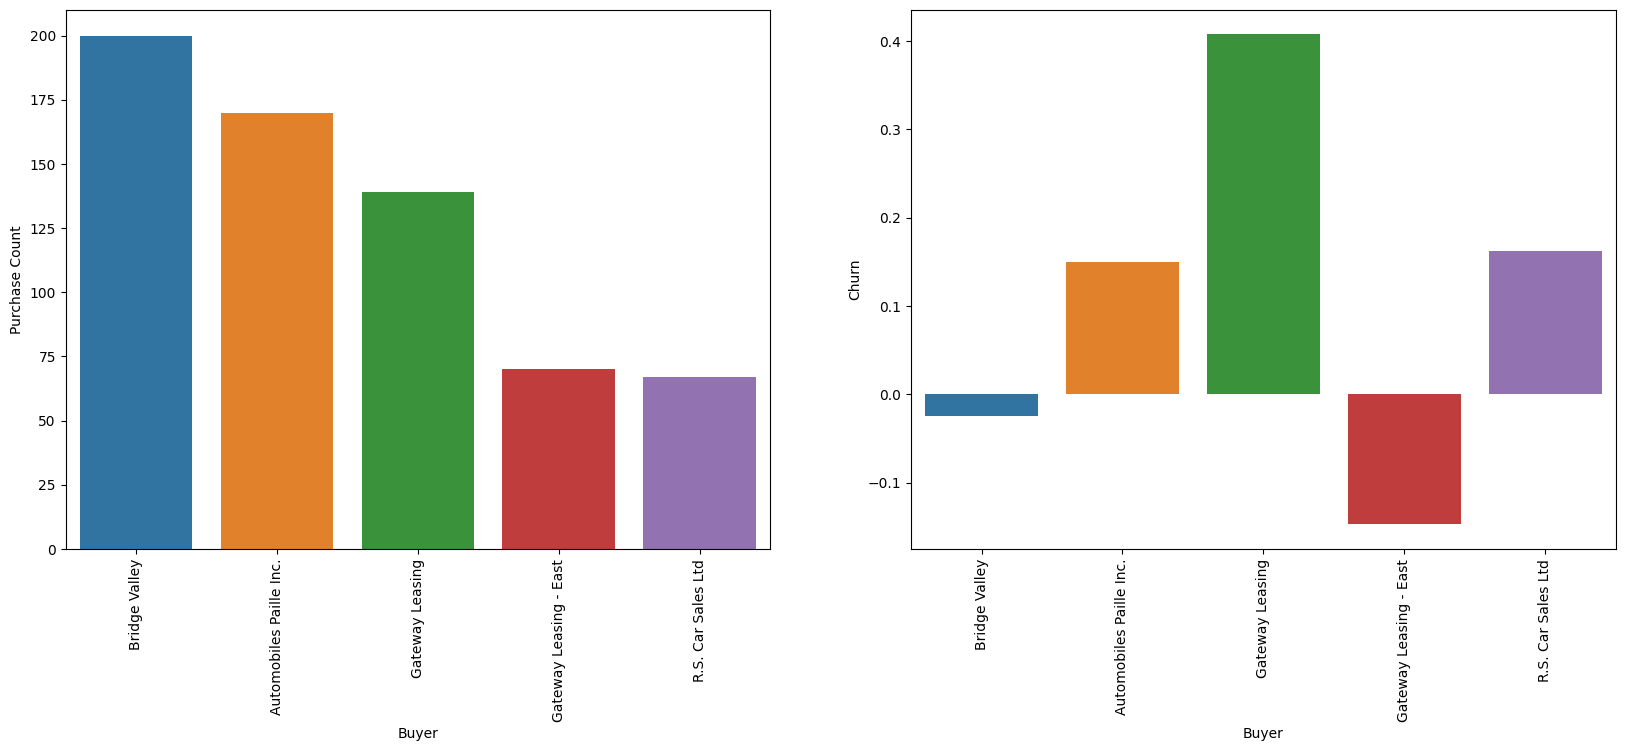

In [44]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
ax1 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Purchase Count", ascending=False).head(), x="Buyer", y="Purchase Count")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
# plt.ylabel("Purchase > 100% appraisal")
plt.subplot(1,2,2)
ax2 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Purchase Count", ascending=False).head(), x="Buyer", y="Churn")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
# plt.ylabel("Profit over 100% appraisal")
plt.show()

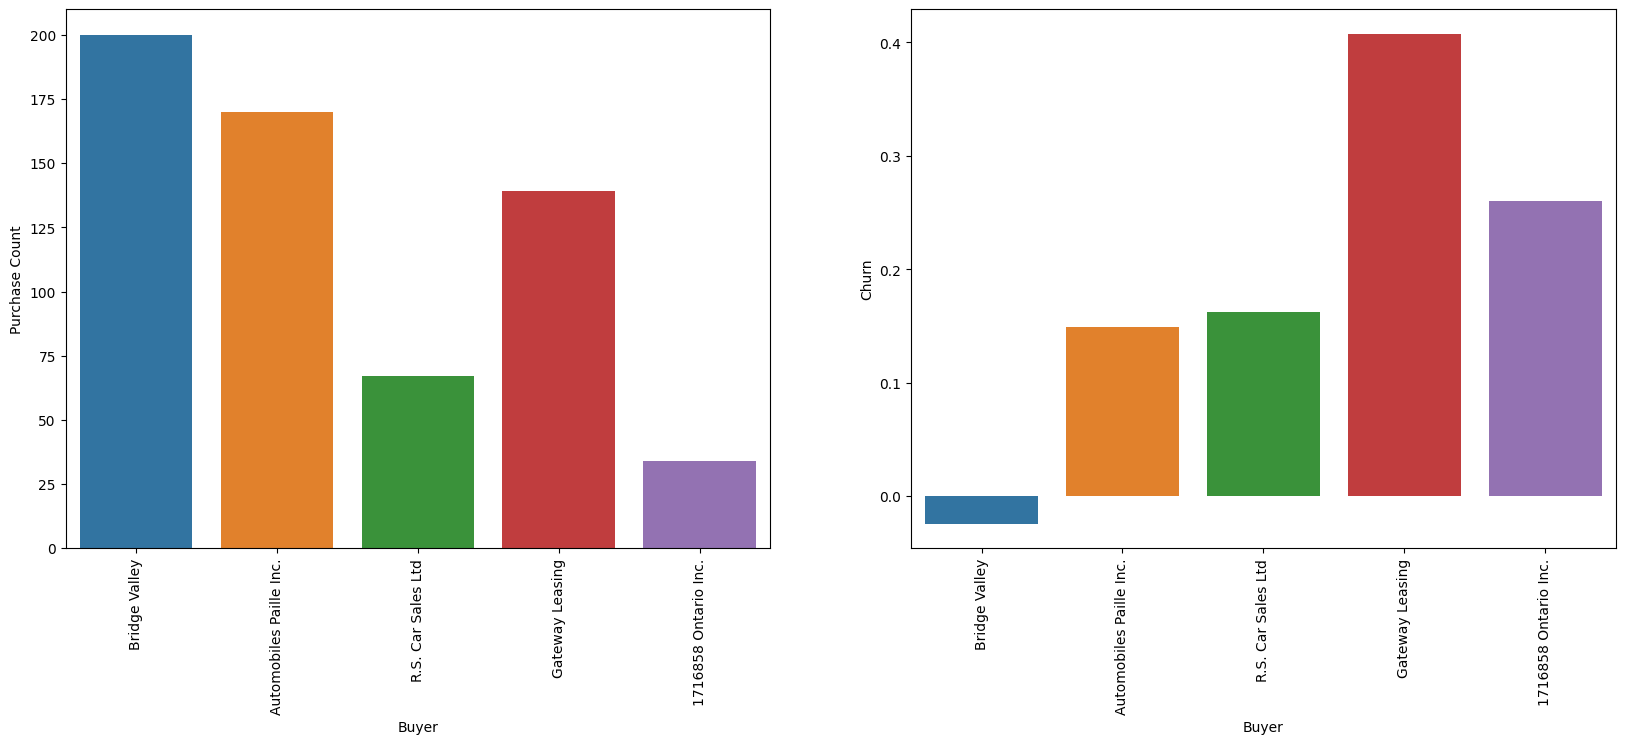

In [45]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
ax1 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Lead Score", ascending=False).head(), x="Buyer", y="Purchase Count")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
# plt.ylabel("Purchase > 100% appraisal")
plt.subplot(1,2,2)
ax2 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Lead Score", ascending=False).head(), x="Buyer", y="Churn")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
# plt.ylabel("Profit over 100% appraisal")
plt.show()

In [46]:
result["Lead Score"].min(), result["Lead Score"].max()

(1.0000281969120262, 2.8589860550867074)

In [47]:
result.head()

,Buyer,Make,Model,Purchase Price,90,95,100,105,110,Score,...,Greater105,Greater110,Purchase Count,Loyalty Index,Consistent Buys,Gain Score,Repeat Purchase Delay,Churn,Market Share,Lead Score
0,Wheels & Deals,Ford,F-150,15000.0,5461.0,6022.000000,6583.000000,7144.0,7705.000000,68.0,...,1,1,1,0.500000,0.009116,0.848765,NaN,NaN,1.000000,1.509116
1,HC & W Enterprise Corp,Ford,F-150,52500.0,34878.0,36965.000000,39052.000000,41139.0,43226.000000,93.0,...,1,1,1,1.000000,0.018329,0.776193,NaN,NaN,1.000000,1.018329
2,Mackenzie Auto Ltd. - SK,Ford,F-150,56900.0,38402.0,40820.000000,43238.000000,45656.0,48074.000000,95.0,...,1,1,1,1.000000,0.018329,0.773125,NaN,NaN,1.000000,1.018329
3,AFK Auto Wholesaler LTD,Ford,F-150,10500.0,10323.0,11321.000000,12319.000000,13317.0,14315.000000,65.0,...,0,0,1,0.111111,0.001949,0.740295,NaN,NaN,0.888889,1.001949
4,Pacific Nations Auto Sales And Finance Ltd,Ford,F-150,34500.0,29214.0,31213.333333,33212.666667,35212.0,37211.333333,76.0,...,2,1,3,0.071429,0.003851,0.759199,28.5,1.0,0.857143,2.003851


In [48]:
def plot_customer_churn(data: pd.DataFrame, buyer: str, make: str, model: str):
  buyer_data = data[["Buyer", "Date"]][(data["Model"] == model) & (data["Make"] == make) & (data["Buyer"] == buyer)]
  date_data = buyer_data.groupby("Date").size().reset_index(name='sales_count')
  plt.figure(figsize=(10, 7))
  sns.lineplot(data=date_data, x="Date", y="sales_count")
  plt.ylabel('Number of Sales')
  plt.xticks(rotation=45)

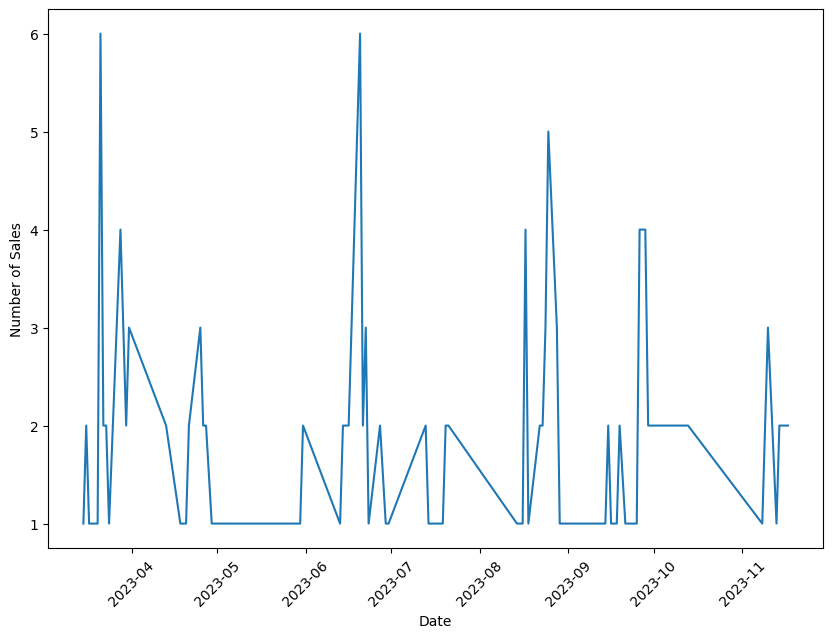

In [49]:
plot_customer_churn(data, "Bridge Valley", "Ford", "F-150")

In [50]:
customer_churn(data, "Bridge Valley", "Ford", "F-150")

-0.024323094544489884

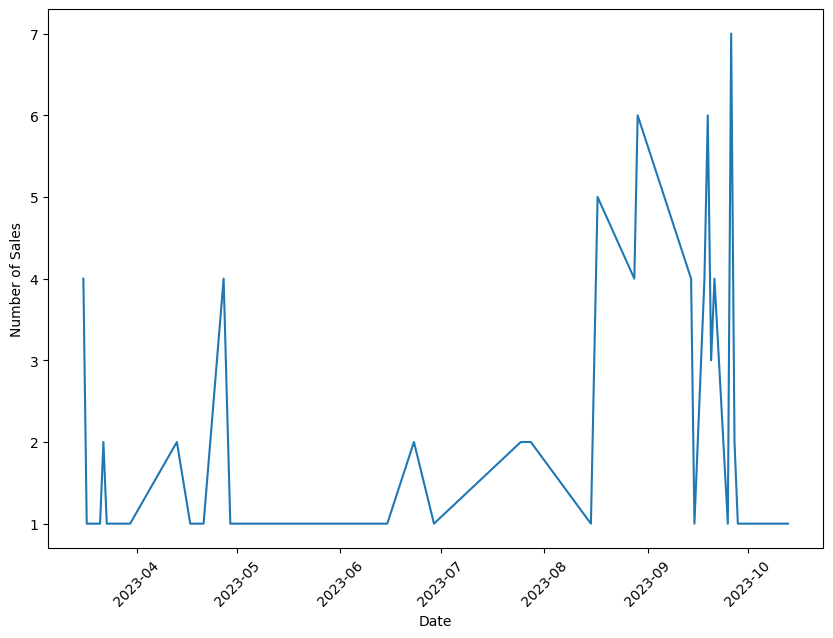

In [51]:
plot_customer_churn(data, "Gateway Leasing", "Ford", "F-150")

In [52]:
customer_churn(data, "Gateway Leasing", "Ford", "F-150")

0.40762018056342203

## Final Recommendations Analysis

In [53]:
def recommend_buyers(result: pd.DataFrame, num=5, by: str = "Lead Score", ascending=False):

    buyers_dataframe = result[["Buyer", "Purchase Count", "Gain Score",  "Consistent Buys", "Purchase Price", "Lead Score", "Greater100", "Greater105", "Greater110", "Repeat Purchase Delay", "Churn", "Market Share"]]
    limit = 10
    buyers_dataframe = buyers_dataframe[buyers_dataframe["Purchase Count"] >= limit]
    buyers_dataframe.sort_values(by=by, ascending=ascending, inplace=True)

    return buyers_dataframe.head(num)

recommendations = recommend_buyers(result)
recommendations

,Buyer,Purchase Count,Gain Score,Consistent Buys,Purchase Price,Lead Score,Greater100,Greater105,Greater110,Repeat Purchase Delay,Churn,Market Share
192,Bridge Valley,200,0.878782,0.858986,32314.000000,2.858986,100,80,54,1.843284,-0.024323,0.177156
181,Automobiles Paille Inc.,170,1.000000,0.583199,40558.582353,2.583199,106,74,53,2.008197,0.149407,0.192771
235,R.S. Car Sales Ltd,67,0.555808,0.530161,30467.910448,2.530161,24,16,9,4.846154,0.162046,0.096154
173,Gateway Leasing,139,0.826115,1.000000,43851.582734,2.500000,70,55,39,2.370787,0.407620,0.202247
217,1716858 Ontario Inc.,34,0.630034,0.163764,22830.882353,2.163764,12,8,3,11.375000,0.260485,0.130769


In [54]:
recommend_buyers(result, num=10, by="Lead Score")

,Buyer,Purchase Count,Gain Score,Consistent Buys,Purchase Price,Lead Score,Greater100,Greater105,Greater110,Repeat Purchase Delay,Churn,Market Share
192,Bridge Valley,200,0.878782,0.858986,32314.000000,2.858986,100,80,54,1.843284,-0.024323,0.177156
181,Automobiles Paille Inc.,170,1.000000,0.583199,40558.582353,2.583199,106,74,53,2.008197,0.149407,0.192771
235,R.S. Car Sales Ltd,67,0.555808,0.530161,30467.910448,2.530161,24,16,9,4.846154,0.162046,0.096154
173,Gateway Leasing,139,0.826115,1.000000,43851.582734,2.500000,70,55,39,2.370787,0.407620,0.202247
217,1716858 Ontario Inc.,34,0.630034,0.163764,22830.882353,2.163764,12,8,3,11.375000,0.260485,0.130769
265,Autospace Incorporated - Deals On Wheelz,52,0.055904,0.115780,16838.269231,2.115780,10,6,2,7.593750,0.291586,0.044186
31,Titanium Auto Group Ltd - BC,18,0.855320,0.089013,41552.777778,2.089013,14,13,12,8.125000,-0.605907,0.522388
134,Hinton Chrysler,17,0.764625,0.071868,34947.058824,2.071868,12,11,11,12.888889,NaN,0.270270
58,Kaylor Auto Group,15,0.905985,0.059991,35836.666667,2.059991,15,15,13,8.600000,0.554858,0.449275
89,Sundance Chevrolet,41,0.842239,0.059818,29128.048780,2.059818,33,27,17,8.894737,-0.149008,0.355899


In [55]:
recommend_buyers(result, num=10, by="Purchase Count")

,Buyer,Purchase Count,Gain Score,Consistent Buys,Purchase Price,Lead Score,Greater100,Greater105,Greater110,Repeat Purchase Delay,Churn,Market Share
192,Bridge Valley,200,0.878782,0.858986,32314.000000,2.858986,100,80,54,1.843284,-0.024323,0.177156
181,Automobiles Paille Inc.,170,1.000000,0.583199,40558.582353,2.583199,106,74,53,2.008197,0.149407,0.192771
173,Gateway Leasing,139,0.826115,1.000000,43851.582734,2.500000,70,55,39,2.370787,0.407620,0.202247
226,Gateway Leasing - East,70,0.800068,0.371482,38084.785714,1.871482,38,24,15,5.020408,-0.147056,0.115226
235,R.S. Car Sales Ltd,67,0.555808,0.530161,30467.910448,2.530161,24,16,9,4.846154,0.162046,0.096154
265,Autospace Incorporated - Deals On Wheelz,52,0.055904,0.115780,16838.269231,2.115780,10,6,2,7.593750,0.291586,0.044186
89,Sundance Chevrolet,41,0.842239,0.059818,29128.048780,2.059818,33,27,17,8.894737,-0.149008,0.355899
217,1716858 Ontario Inc.,34,0.630034,0.163764,22830.882353,2.163764,12,8,3,11.375000,0.260485,0.130769
79,European Auto Gallery,31,0.770427,0.040058,24451.612903,2.040058,19,18,13,9.095238,0.093360,0.378685
253,Marsh Auto Sales LLC,29,0.598525,0.227805,14169.310345,1.727805,10,6,3,16.307692,-0.413518,0.073529


In [56]:
recommend_buyers(result, num=10, by="Gain Score")

,Buyer,Purchase Count,Gain Score,Consistent Buys,Purchase Price,Lead Score,Greater100,Greater105,Greater110,Repeat Purchase Delay,Churn,Market Share
181,Automobiles Paille Inc.,170,1.000000,0.583199,40558.582353,2.583199,106,74,53,2.008197,0.149407,0.192771
58,Kaylor Auto Group,15,0.905985,0.059991,35836.666667,2.059991,15,15,13,8.600000,0.554858,0.449275
192,Bridge Valley,200,0.878782,0.858986,32314.000000,2.858986,100,80,54,1.843284,-0.024323,0.177156
31,Titanium Auto Group Ltd - BC,18,0.855320,0.089013,41552.777778,2.089013,14,13,12,8.125000,-0.605907,0.522388
89,Sundance Chevrolet,41,0.842239,0.059818,29128.048780,2.059818,33,27,17,8.894737,-0.149008,0.355899
49,Steve Marshall Motors 1996 ltd,21,0.840846,0.059655,40938.095238,2.059655,19,15,14,21.181818,-0.146200,0.485294
173,Gateway Leasing,139,0.826115,1.000000,43851.582734,2.500000,70,55,39,2.370787,0.407620,0.202247
226,Gateway Leasing - East,70,0.800068,0.371482,38084.785714,1.871482,38,24,15,5.020408,-0.147056,0.115226
193,Corey Ford,26,0.795996,0.303729,49421.153846,1.303729,18,13,6,13.333333,0.413387,0.170732
29,Pioneer Chrysler BC,12,0.785285,0.006741,49783.333333,2.006741,9,7,6,17.500000,0.423591,0.543814


In [57]:
recommend_buyers(result, num=10, by="Consistent Buys")

,Buyer,Purchase Count,Gain Score,Consistent Buys,Purchase Price,Lead Score,Greater100,Greater105,Greater110,Repeat Purchase Delay,Churn,Market Share
173,Gateway Leasing,139,0.826115,1.000000,43851.582734,2.500000,70,55,39,2.370787,0.407620,0.202247
192,Bridge Valley,200,0.878782,0.858986,32314.000000,2.858986,100,80,54,1.843284,-0.024323,0.177156
181,Automobiles Paille Inc.,170,1.000000,0.583199,40558.582353,2.583199,106,74,53,2.008197,0.149407,0.192771
235,R.S. Car Sales Ltd,67,0.555808,0.530161,30467.910448,2.530161,24,16,9,4.846154,0.162046,0.096154
226,Gateway Leasing - East,70,0.800068,0.371482,38084.785714,1.871482,38,24,15,5.020408,-0.147056,0.115226
193,Corey Ford,26,0.795996,0.303729,49421.153846,1.303729,18,13,6,13.333333,0.413387,0.170732
253,Marsh Auto Sales LLC,29,0.598525,0.227805,14169.310345,1.727805,10,6,3,16.307692,-0.413518,0.073529
217,1716858 Ontario Inc.,34,0.630034,0.163764,22830.882353,2.163764,12,8,3,11.375000,0.260485,0.130769
55,Auto Link Direct,13,0.759410,0.119680,54686.538462,1.119680,10,7,6,15.444444,-0.054364,0.461538
265,Autospace Incorporated - Deals On Wheelz,52,0.055904,0.115780,16838.269231,2.115780,10,6,2,7.593750,0.291586,0.044186


In [58]:
recommend_buyers(result, num=10, by="Repeat Purchase Delay", ascending=True)

,Buyer,Purchase Count,Gain Score,Consistent Buys,Purchase Price,Lead Score,Greater100,Greater105,Greater110,Repeat Purchase Delay,Churn,Market Share
192,Bridge Valley,200,0.878782,0.858986,32314.000000,2.858986,100,80,54,1.843284,-0.024323,0.177156
181,Automobiles Paille Inc.,170,1.000000,0.583199,40558.582353,2.583199,106,74,53,2.008197,0.149407,0.192771
173,Gateway Leasing,139,0.826115,1.000000,43851.582734,2.500000,70,55,39,2.370787,0.407620,0.202247
235,R.S. Car Sales Ltd,67,0.555808,0.530161,30467.910448,2.530161,24,16,9,4.846154,0.162046,0.096154
226,Gateway Leasing - East,70,0.800068,0.371482,38084.785714,1.871482,38,24,15,5.020408,-0.147056,0.115226
265,Autospace Incorporated - Deals On Wheelz,52,0.055904,0.115780,16838.269231,2.115780,10,6,2,7.593750,0.291586,0.044186
31,Titanium Auto Group Ltd - BC,18,0.855320,0.089013,41552.777778,2.089013,14,13,12,8.125000,-0.605907,0.522388
58,Kaylor Auto Group,15,0.905985,0.059991,35836.666667,2.059991,15,15,13,8.600000,0.554858,0.449275
89,Sundance Chevrolet,41,0.842239,0.059818,29128.048780,2.059818,33,27,17,8.894737,-0.149008,0.355899
79,European Auto Gallery,31,0.770427,0.040058,24451.612903,2.040058,19,18,13,9.095238,0.093360,0.378685


In [59]:
recommend_buyers(result, num=10, by="Churn")

,Buyer,Purchase Count,Gain Score,Consistent Buys,Purchase Price,Lead Score,Greater100,Greater105,Greater110,Repeat Purchase Delay,Churn,Market Share
58,Kaylor Auto Group,15,0.905985,0.059991,35836.666667,2.059991,15,15,13,8.600000,0.554858,0.449275
131,9315-7634 Quebec Inc,12,0.757596,0.073611,54908.333333,1.073611,10,5,3,19.333333,0.434400,0.277778
29,Pioneer Chrysler BC,12,0.785285,0.006741,49783.333333,2.006741,9,7,6,17.500000,0.423591,0.543814
193,Corey Ford,26,0.795996,0.303729,49421.153846,1.303729,18,13,6,13.333333,0.413387,0.170732
173,Gateway Leasing,139,0.826115,1.000000,43851.582734,2.500000,70,55,39,2.370787,0.407620,0.202247
265,Autospace Incorporated - Deals On Wheelz,52,0.055904,0.115780,16838.269231,2.115780,10,6,2,7.593750,0.291586,0.044186
217,1716858 Ontario Inc.,34,0.630034,0.163764,22830.882353,2.163764,12,8,3,11.375000,0.260485,0.130769
76,Elite Auto Group - USA,17,0.755046,0.038774,52582.352941,1.038774,12,9,8,19.076923,0.208132,0.386861
231,Yosh Shmenge Remarketing,18,0.722518,0.037217,35056.666667,2.037217,7,3,2,14.454545,0.182225,0.100000
235,R.S. Car Sales Ltd,67,0.555808,0.530161,30467.910448,2.530161,24,16,9,4.846154,0.162046,0.096154


In [60]:
recommend_buyers(result, num=10, by="Market Share")

,Buyer,Purchase Count,Gain Score,Consistent Buys,Purchase Price,Lead Score,Greater100,Greater105,Greater110,Repeat Purchase Delay,Churn,Market Share
26,Shahnawaz Enterprises Inc - SMS Motors,10,0.756735,0.014187,18840.000000,2.014187,8,8,3,30.285714,-0.125310,0.581395
29,Pioneer Chrysler BC,12,0.785285,0.006741,49783.333333,2.006741,9,7,6,17.500000,0.423591,0.543814
31,Titanium Auto Group Ltd - BC,18,0.855320,0.089013,41552.777778,2.089013,14,13,12,8.125000,-0.605907,0.522388
34,Midcan Brokers Inc.,18,0.765367,0.044128,48555.555556,1.544128,11,6,5,16.090909,0.033828,0.503704
49,Steve Marshall Motors 1996 ltd,21,0.840846,0.059655,40938.095238,2.059655,19,15,14,21.181818,-0.146200,0.485294
55,Auto Link Direct,13,0.759410,0.119680,54686.538462,1.119680,10,7,6,15.444444,-0.054364,0.461538
58,Kaylor Auto Group,15,0.905985,0.059991,35836.666667,2.059991,15,15,13,8.600000,0.554858,0.449275
76,Elite Auto Group - USA,17,0.755046,0.038774,52582.352941,1.038774,12,9,8,19.076923,0.208132,0.386861
79,European Auto Gallery,31,0.770427,0.040058,24451.612903,2.040058,19,18,13,9.095238,0.093360,0.378685
89,Sundance Chevrolet,41,0.842239,0.059818,29128.048780,2.059818,33,27,17,8.894737,-0.149008,0.355899


In [61]:
def recommend_buyers_count(result: pd.DataFrame, num=5, by: str = "Purchase Count", ascending=False):

    buyers_dataframe = result[["Buyer", "Purchase Count", "Consistent Buys", "Greater100", "Greater105", "Greater110", "Repeat Purchase Delay",  "Purchase Price"]]
    limit = 10
    buyers_dataframe = buyers_dataframe[buyers_dataframe["Purchase Count"] >= limit]
    buyers_dataframe.sort_values(by=by, ascending=ascending, inplace=True)

    return buyers_dataframe.head(num)

recommendations = recommend_buyers_count(result)
recommendations

,Buyer,Purchase Count,Consistent Buys,Greater100,Greater105,Greater110,Repeat Purchase Delay,Purchase Price
192,Bridge Valley,200,0.858986,100,80,54,1.843284,32314.000000
181,Automobiles Paille Inc.,170,0.583199,106,74,53,2.008197,40558.582353
173,Gateway Leasing,139,1.000000,70,55,39,2.370787,43851.582734
226,Gateway Leasing - East,70,0.371482,38,24,15,5.020408,38084.785714
235,R.S. Car Sales Ltd,67,0.530161,24,16,9,4.846154,30467.910448


In [62]:
recommend_buyers_count(result, by="Purchase Count", num=10)

,Buyer,Purchase Count,Consistent Buys,Greater100,Greater105,Greater110,Repeat Purchase Delay,Purchase Price
192,Bridge Valley,200,0.858986,100,80,54,1.843284,32314.000000
181,Automobiles Paille Inc.,170,0.583199,106,74,53,2.008197,40558.582353
173,Gateway Leasing,139,1.000000,70,55,39,2.370787,43851.582734
226,Gateway Leasing - East,70,0.371482,38,24,15,5.020408,38084.785714
235,R.S. Car Sales Ltd,67,0.530161,24,16,9,4.846154,30467.910448
265,Autospace Incorporated - Deals On Wheelz,52,0.115780,10,6,2,7.593750,16838.269231
89,Sundance Chevrolet,41,0.059818,33,27,17,8.894737,29128.048780
217,1716858 Ontario Inc.,34,0.163764,12,8,3,11.375000,22830.882353
79,European Auto Gallery,31,0.040058,19,18,13,9.095238,24451.612903
253,Marsh Auto Sales LLC,29,0.227805,10,6,3,16.307692,14169.310345


In [63]:
recommend_buyers_count(result, by="Consistent Buys", num=10)

,Buyer,Purchase Count,Consistent Buys,Greater100,Greater105,Greater110,Repeat Purchase Delay,Purchase Price
173,Gateway Leasing,139,1.000000,70,55,39,2.370787,43851.582734
192,Bridge Valley,200,0.858986,100,80,54,1.843284,32314.000000
181,Automobiles Paille Inc.,170,0.583199,106,74,53,2.008197,40558.582353
235,R.S. Car Sales Ltd,67,0.530161,24,16,9,4.846154,30467.910448
226,Gateway Leasing - East,70,0.371482,38,24,15,5.020408,38084.785714
193,Corey Ford,26,0.303729,18,13,6,13.333333,49421.153846
253,Marsh Auto Sales LLC,29,0.227805,10,6,3,16.307692,14169.310345
217,1716858 Ontario Inc.,34,0.163764,12,8,3,11.375000,22830.882353
55,Auto Link Direct,13,0.119680,10,7,6,15.444444,54686.538462
265,Autospace Incorporated - Deals On Wheelz,52,0.115780,10,6,2,7.593750,16838.269231


In [64]:
recommend_buyers_count(result, by="Greater100", num=10)

,Buyer,Purchase Count,Consistent Buys,Greater100,Greater105,Greater110,Repeat Purchase Delay,Purchase Price
181,Automobiles Paille Inc.,170,0.583199,106,74,53,2.008197,40558.582353
192,Bridge Valley,200,0.858986,100,80,54,1.843284,32314.000000
173,Gateway Leasing,139,1.000000,70,55,39,2.370787,43851.582734
226,Gateway Leasing - East,70,0.371482,38,24,15,5.020408,38084.785714
89,Sundance Chevrolet,41,0.059818,33,27,17,8.894737,29128.048780
235,R.S. Car Sales Ltd,67,0.530161,24,16,9,4.846154,30467.910448
49,Steve Marshall Motors 1996 ltd,21,0.059655,19,15,14,21.181818,40938.095238
79,European Auto Gallery,31,0.040058,19,18,13,9.095238,24451.612903
193,Corey Ford,26,0.303729,18,13,6,13.333333,49421.153846
190,1068827 Ontario Inc.,26,0.065465,17,14,9,14.461538,46423.076923


In [65]:
recommend_buyers_count(result, by="Greater105", num=10)

,Buyer,Purchase Count,Consistent Buys,Greater100,Greater105,Greater110,Repeat Purchase Delay,Purchase Price
192,Bridge Valley,200,0.858986,100,80,54,1.843284,32314.000000
181,Automobiles Paille Inc.,170,0.583199,106,74,53,2.008197,40558.582353
173,Gateway Leasing,139,1.000000,70,55,39,2.370787,43851.582734
89,Sundance Chevrolet,41,0.059818,33,27,17,8.894737,29128.048780
226,Gateway Leasing - East,70,0.371482,38,24,15,5.020408,38084.785714
79,European Auto Gallery,31,0.040058,19,18,13,9.095238,24451.612903
235,R.S. Car Sales Ltd,67,0.530161,24,16,9,4.846154,30467.910448
49,Steve Marshall Motors 1996 ltd,21,0.059655,19,15,14,21.181818,40938.095238
58,Kaylor Auto Group,15,0.059991,15,15,13,8.600000,35836.666667
190,1068827 Ontario Inc.,26,0.065465,17,14,9,14.461538,46423.076923


In [66]:
recommend_buyers_count(result, by="Greater110", num=10)

,Buyer,Purchase Count,Consistent Buys,Greater100,Greater105,Greater110,Repeat Purchase Delay,Purchase Price
192,Bridge Valley,200,0.858986,100,80,54,1.843284,32314.000000
181,Automobiles Paille Inc.,170,0.583199,106,74,53,2.008197,40558.582353
173,Gateway Leasing,139,1.000000,70,55,39,2.370787,43851.582734
89,Sundance Chevrolet,41,0.059818,33,27,17,8.894737,29128.048780
226,Gateway Leasing - East,70,0.371482,38,24,15,5.020408,38084.785714
49,Steve Marshall Motors 1996 ltd,21,0.059655,19,15,14,21.181818,40938.095238
58,Kaylor Auto Group,15,0.059991,15,15,13,8.600000,35836.666667
79,European Auto Gallery,31,0.040058,19,18,13,9.095238,24451.612903
31,Titanium Auto Group Ltd - BC,18,0.089013,14,13,12,8.125000,41552.777778
134,Hinton Chrysler,17,0.071868,12,11,11,12.888889,34947.058824


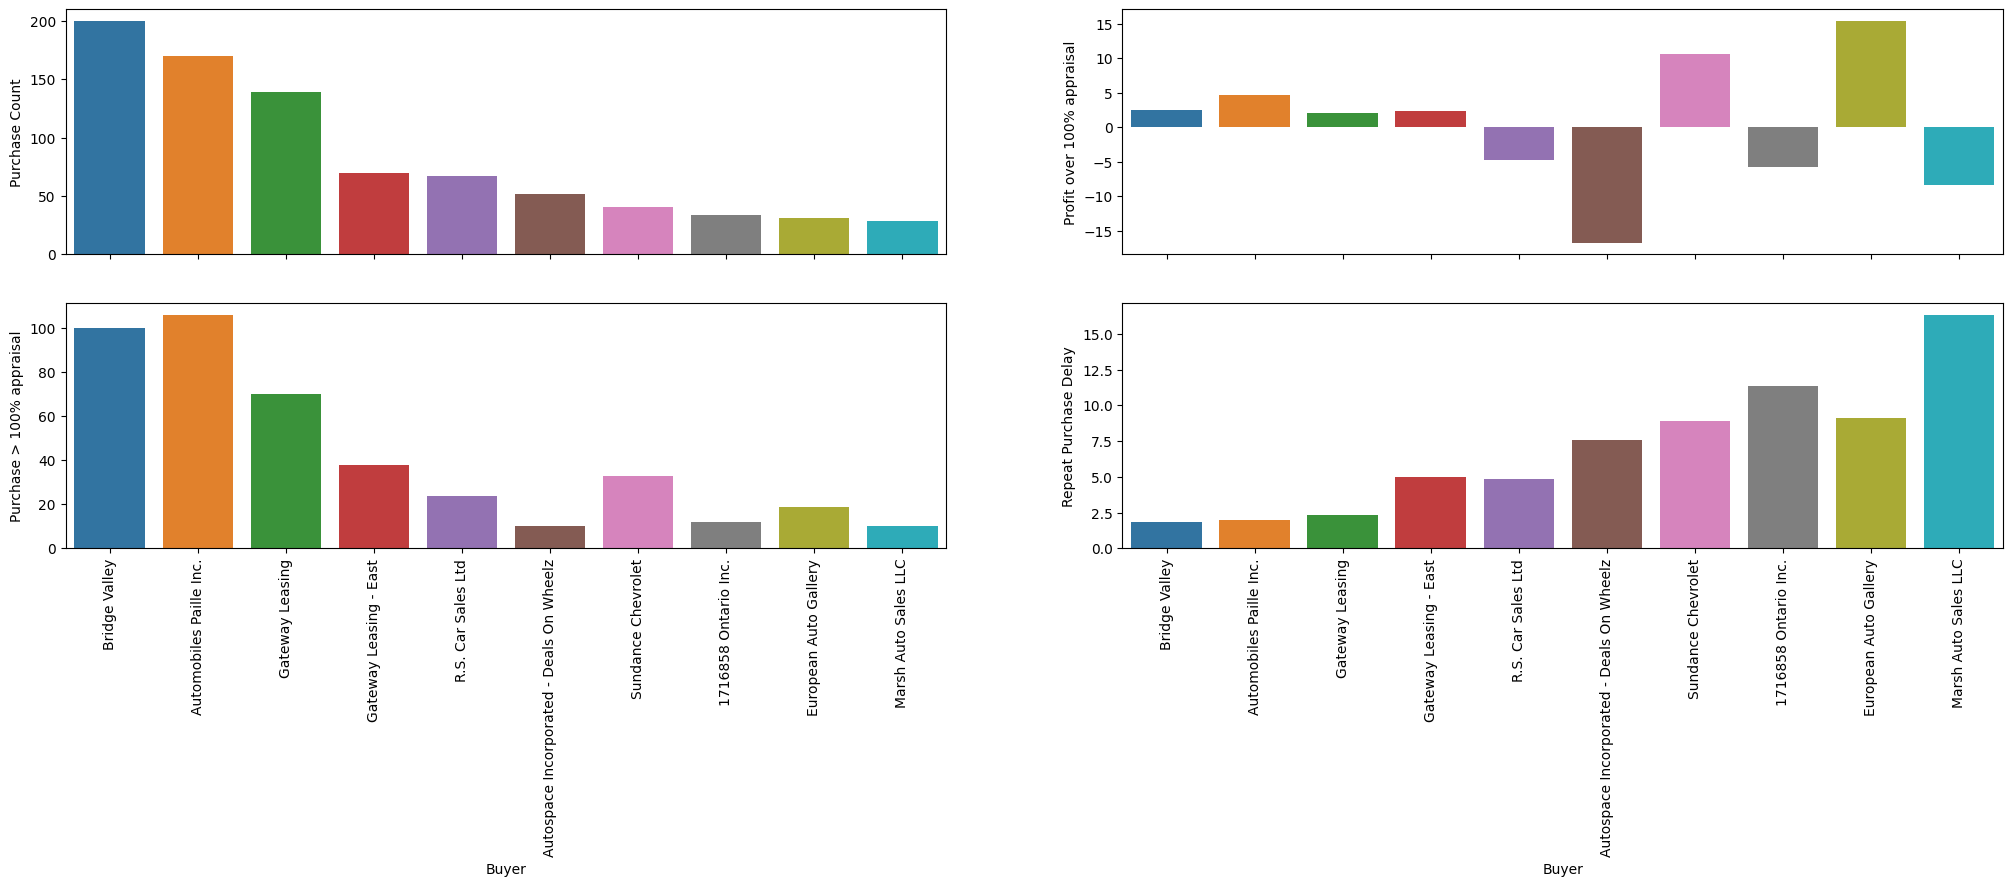

In [67]:
plt.figure(figsize=(25, 7))
plt.subplot(2,2,1)
ax1 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Purchase Count", ascending=False).head(10), x="Buyer", y="Purchase Count")
ax1.set_xticklabels([])
plt.xlabel("")
plt.subplot(2,2,2)
ax2 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Purchase Count", ascending=False).head(10), x="Buyer", y="Gain100")
ax2.set_xticklabels([])
plt.xlabel("")
plt.ylabel("Profit over 100% appraisal")
plt.subplot(2,2,3)
ax3 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Purchase Count", ascending=False).head(10), x="Buyer", y="Greater100")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
plt.ylabel("Purchase > 100% appraisal")
plt.subplot(2,2,4)
ax4 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Purchase Count", ascending=False).head(10), x="Buyer", y="Repeat Purchase Delay")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)
plt.show()

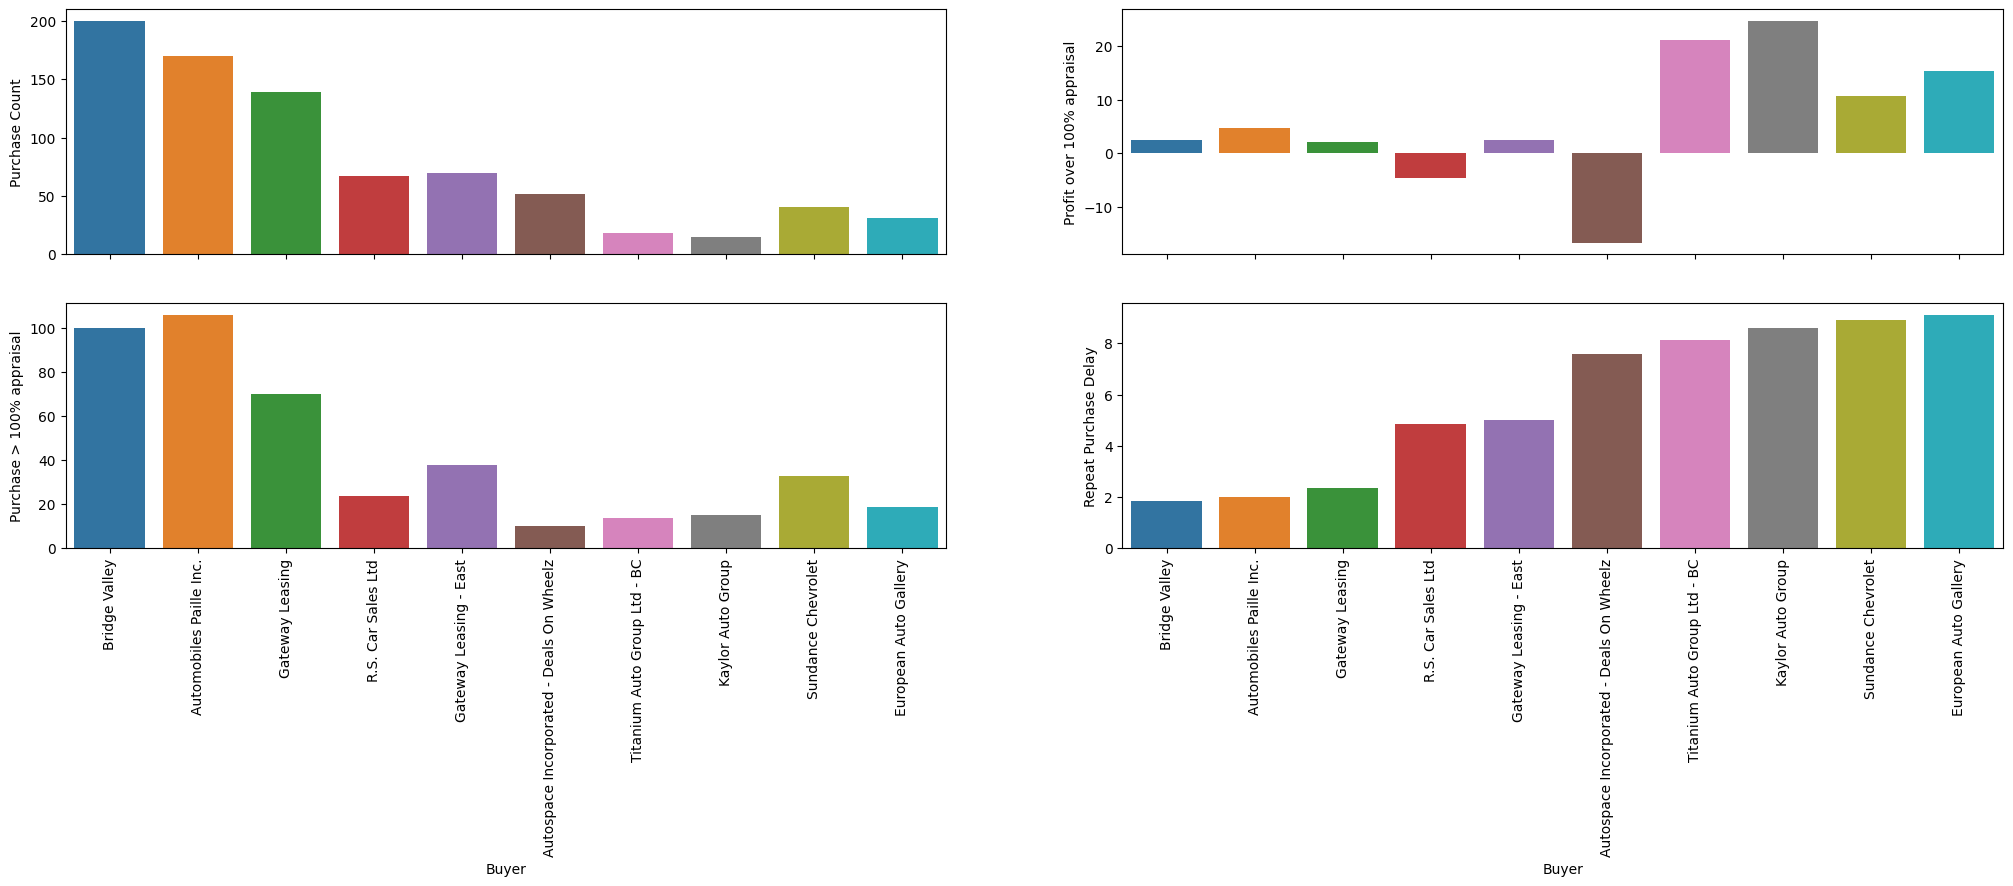

In [68]:
plt.figure(figsize=(25, 7))
plt.subplot(2,2,1)
ax1 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Repeat Purchase Delay").head(10), x="Buyer", y="Purchase Count")
ax1.set_xticklabels([])
plt.xlabel("")
plt.subplot(2,2,2)
ax2 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Repeat Purchase Delay").head(10), x="Buyer", y="Gain100")
ax2.set_xticklabels([])
plt.xlabel("")
plt.ylabel("Profit over 100% appraisal")
plt.subplot(2,2,3)
ax3 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Repeat Purchase Delay").head(10), x="Buyer", y="Greater100")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
plt.ylabel("Purchase > 100% appraisal")
plt.subplot(2,2,4)
ax4 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Repeat Purchase Delay").head(10), x="Buyer", y="Repeat Purchase Delay")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)
plt.show()

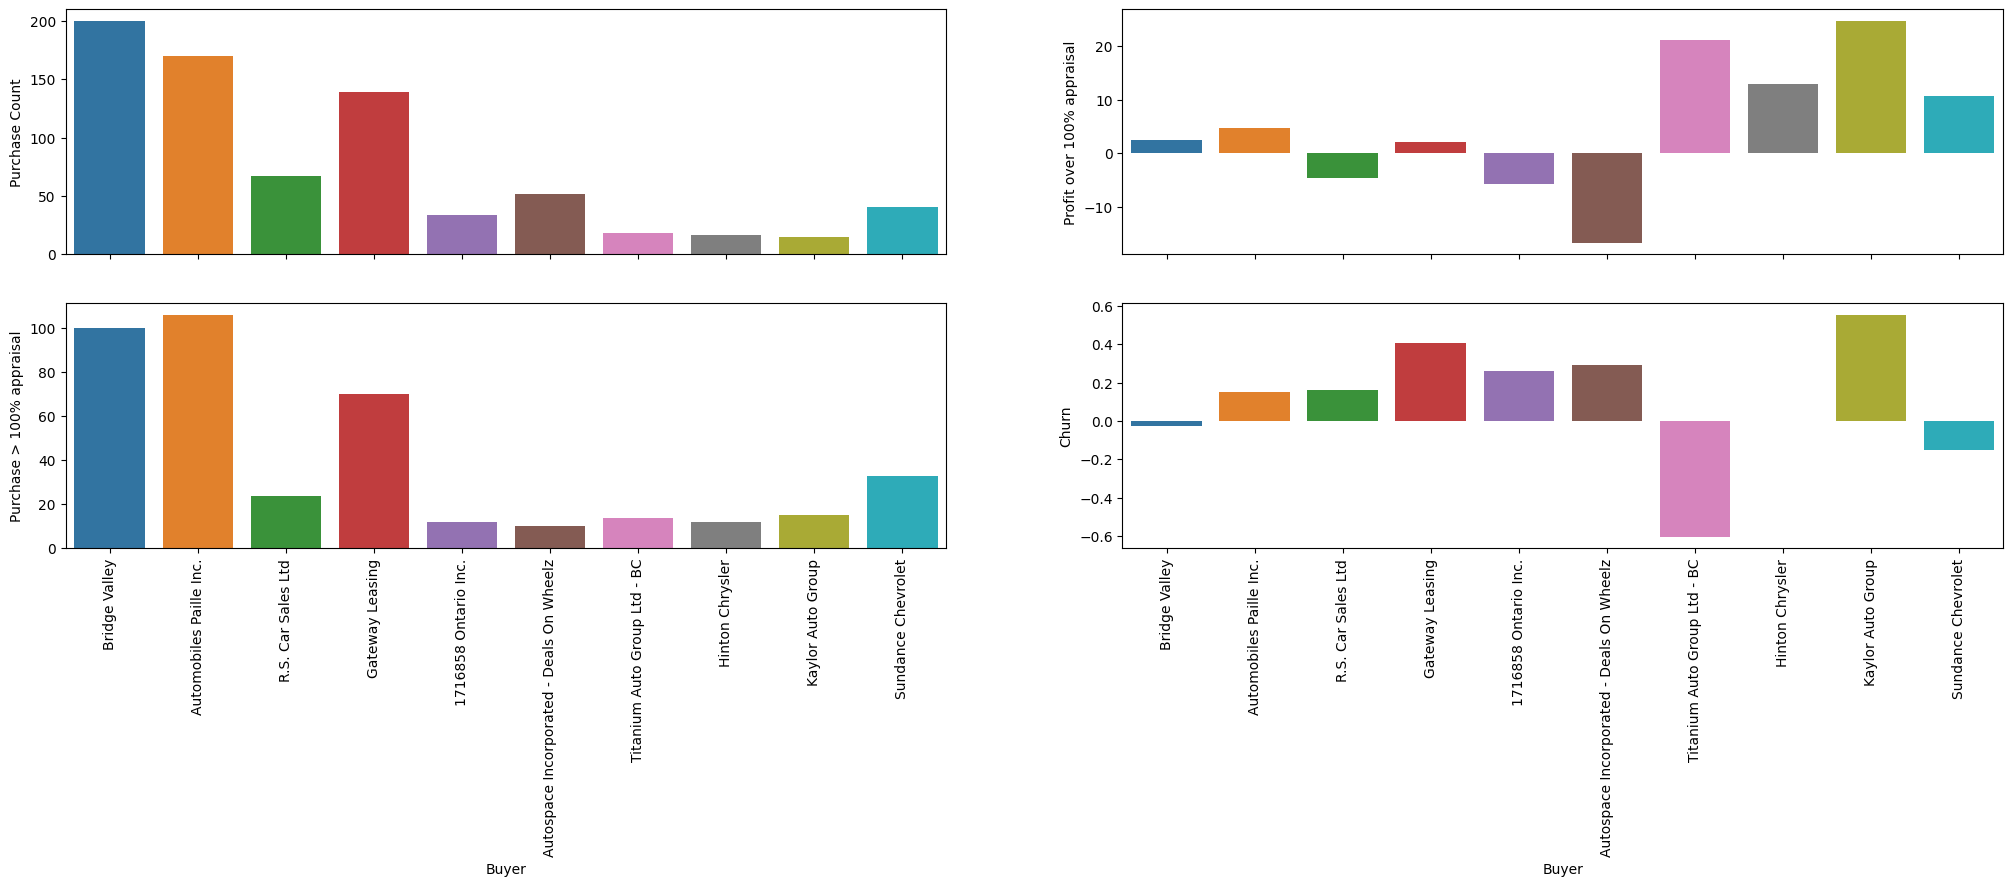

In [69]:
plt.figure(figsize=(25, 7))
plt.subplot(2,2,1)
ax1 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Lead Score", ascending=False).head(10), x="Buyer", y="Purchase Count")
ax1.set_xticklabels([])
plt.xlabel("")
plt.subplot(2,2,2)
ax2 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Lead Score", ascending=False).head(10), x="Buyer", y="Gain100")
ax2.set_xticklabels([])
plt.xlabel("")
plt.ylabel("Profit over 100% appraisal")
plt.subplot(2,2,3)
ax3 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Lead Score", ascending=False).head(10), x="Buyer", y="Greater100")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
plt.ylabel("Purchase > 100% appraisal")
plt.subplot(2,2,4)
ax4 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Lead Score", ascending=False).head(10), x="Buyer", y="Churn")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)
plt.show()

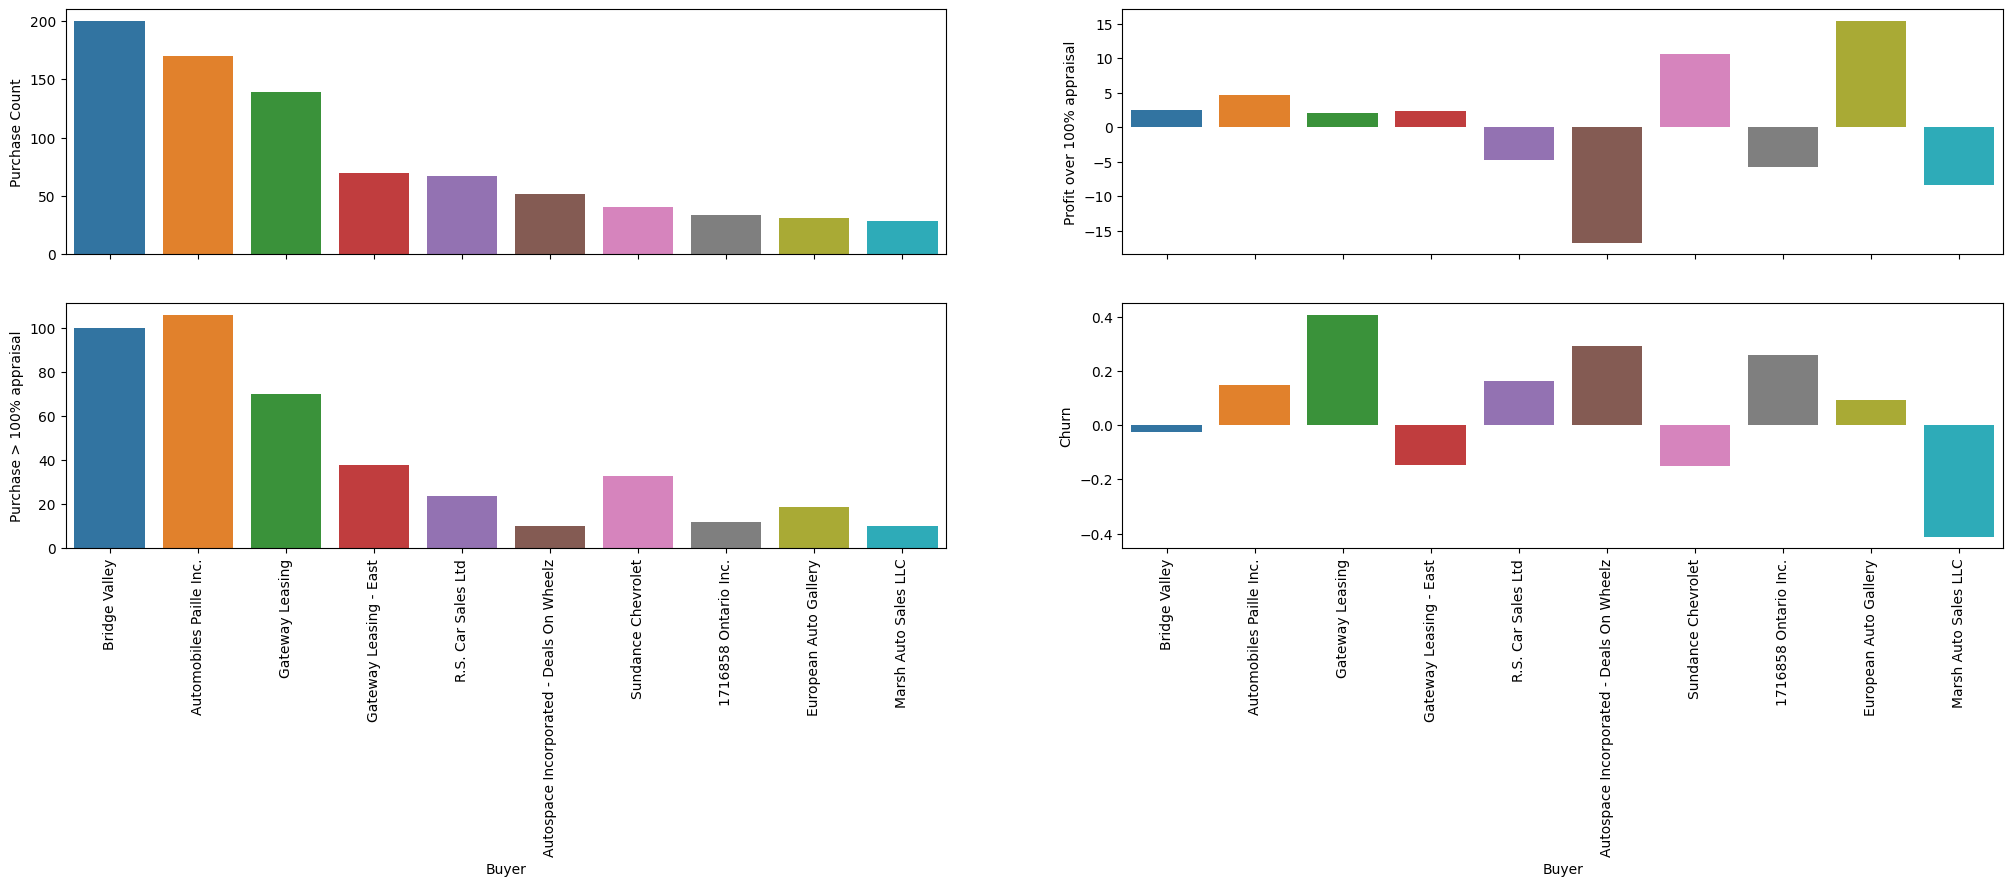

In [70]:
plt.figure(figsize=(25, 7))
plt.subplot(2,2,1)
ax1 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Purchase Count", ascending=False).head(10), x="Buyer", y="Purchase Count")
ax1.set_xticklabels([])
plt.xlabel("")
plt.subplot(2,2,2)
ax2 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Purchase Count", ascending=False).head(10), x="Buyer", y="Gain100")
ax2.set_xticklabels([])
plt.xlabel("")
plt.ylabel("Profit over 100% appraisal")
plt.subplot(2,2,3)
ax3 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Purchase Count", ascending=False).head(10), x="Buyer", y="Greater100")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
plt.ylabel("Purchase > 100% appraisal")
plt.subplot(2,2,4)
ax4 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Purchase Count", ascending=False).head(10), x="Buyer", y="Churn")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)
plt.show()

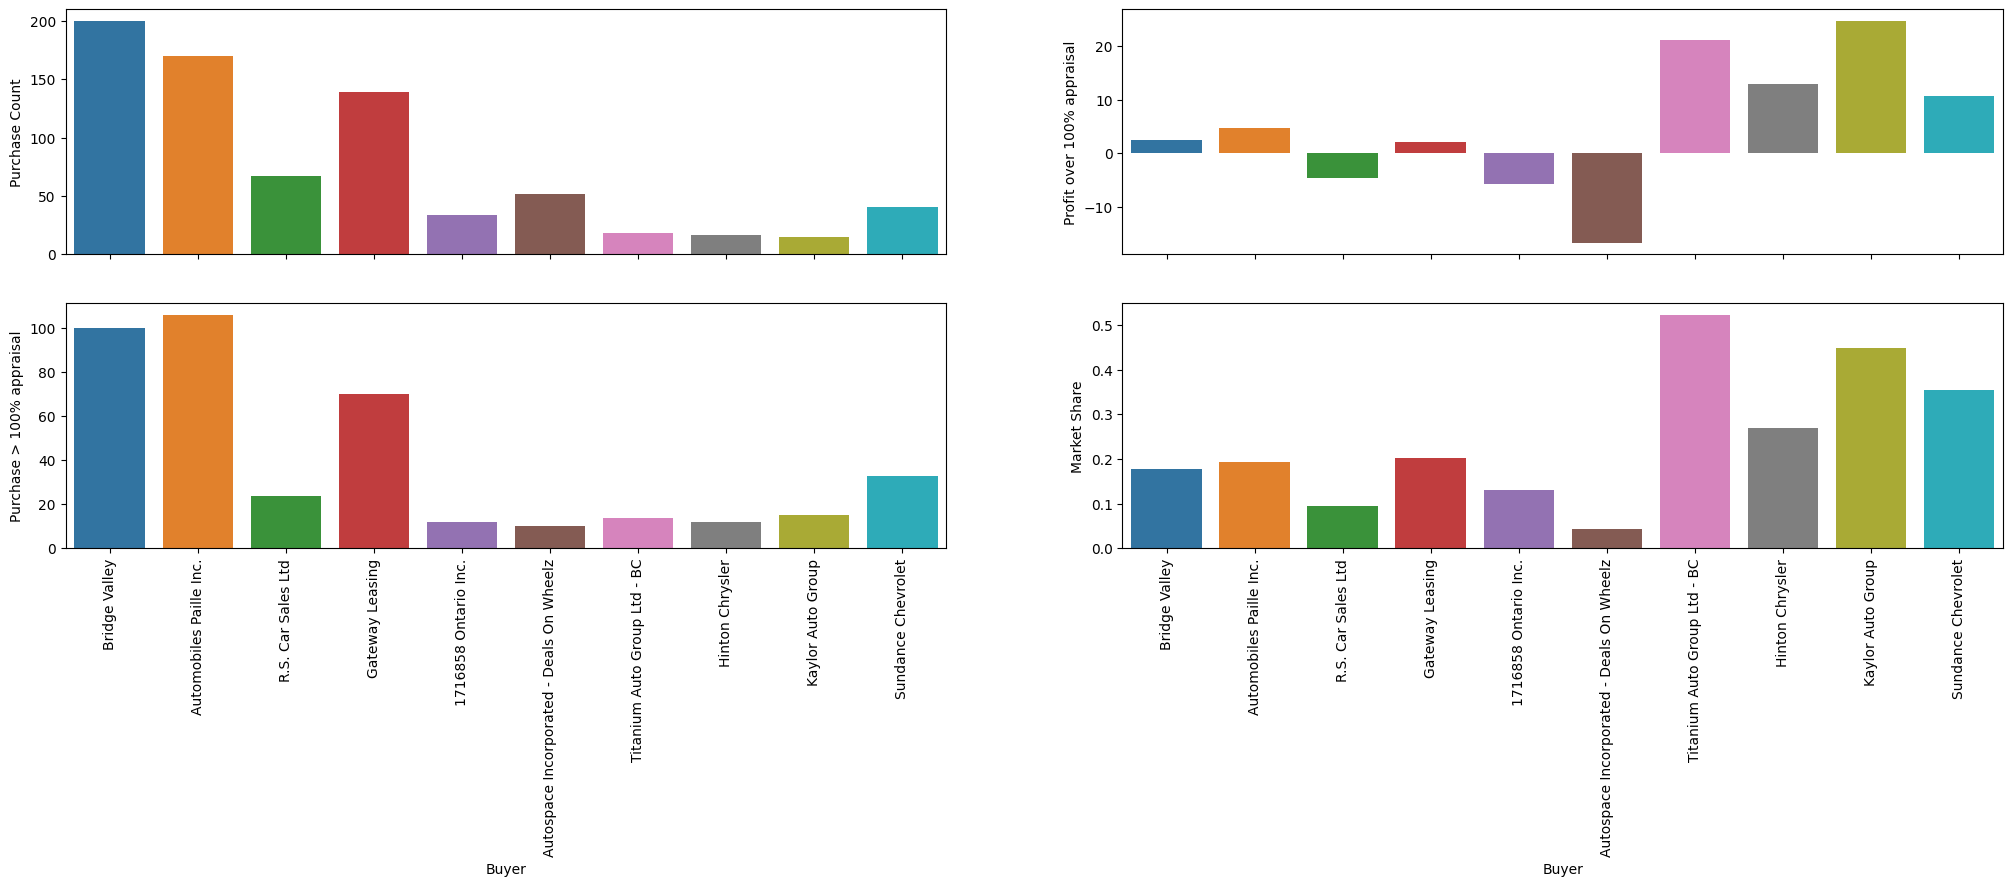

In [71]:
plt.figure(figsize=(25, 7))
plt.subplot(2,2,1)
ax1 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Lead Score", ascending=False).head(10), x="Buyer", y="Purchase Count")
ax1.set_xticklabels([])
plt.xlabel("")
plt.subplot(2,2,2)
ax2 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Lead Score", ascending=False).head(10), x="Buyer", y="Gain100")
ax2.set_xticklabels([])
plt.xlabel("")
plt.ylabel("Profit over 100% appraisal")
plt.subplot(2,2,3)
ax3 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Lead Score", ascending=False).head(10), x="Buyer", y="Greater100")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
plt.ylabel("Purchase > 100% appraisal")
plt.subplot(2,2,4)
ax4 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Lead Score", ascending=False).head(10), x="Buyer", y="Market Share")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)
plt.show()

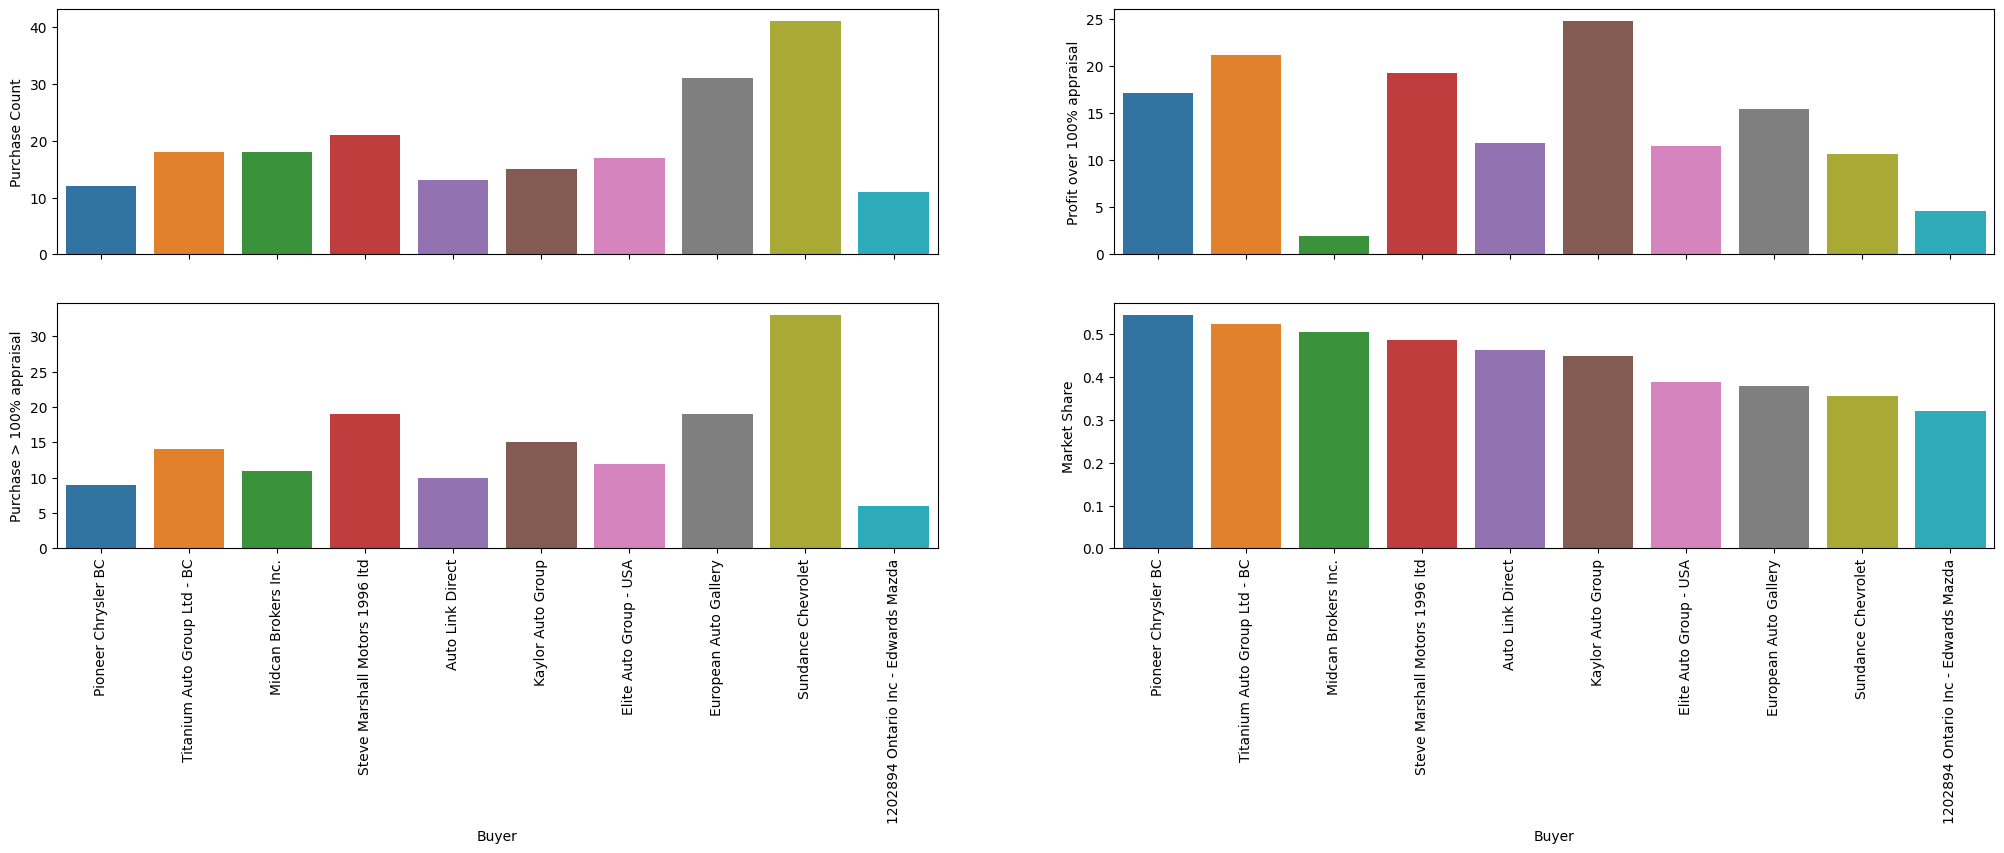

In [72]:
plt.figure(figsize=(25, 7))
plt.subplot(2,2,1)
ax1 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Market Share", ascending=False).head(10), x="Buyer", y="Purchase Count")
ax1.set_xticklabels([])
plt.xlabel("")
plt.subplot(2,2,2)
ax2 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Market Share", ascending=False).head(10), x="Buyer", y="Gain100")
ax2.set_xticklabels([])
plt.xlabel("")
plt.ylabel("Profit over 100% appraisal")
plt.subplot(2,2,3)
ax3 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Market Share", ascending=False).head(10), x="Buyer", y="Greater100")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
plt.ylabel("Purchase > 100% appraisal")
plt.subplot(2,2,4)
ax4 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Market Share", ascending=False).head(10), x="Buyer", y="Market Share")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)
plt.show()

In [73]:
def recommend_buyers_plot(data: pd.DataFrame, make:str, model:str, num=5, by="Purchase Count", limit=10):
  result = filter_dataset(data, make, model)
  result.reset_index(drop=True, inplace=True)
  plt.figure(figsize=(25, 7))
  plt.subplot(2,2,1)
  ax1 = sns.barplot(data=result[result["Purchase Count"] > limit].sort_values(by=by, ascending=False).head(10), x="Buyer", y="Purchase Count")
  ax1.set_xticklabels([])
  plt.xlabel("")
  plt.subplot(2,2,2)
  ax2 = sns.barplot(data=result[result["Purchase Count"] > limit].sort_values(by=by, ascending=False).head(10), x="Buyer", y="Consistent Buys")
  ax2.set_xticklabels([])
  plt.xlabel("")
  plt.subplot(2,2,3)
  ax3 = sns.barplot(data=result[result["Purchase Count"] > limit].sort_values(by=by, ascending=False).head(10), x="Buyer", y="Greater100")
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
  plt.ylabel("Purchase > 100% appraisal")
  plt.subplot(2,2,4)
  ax4 = sns.barplot(data=result[result["Purchase Count"] > limit].sort_values(by=by, ascending=False).head(10), x="Buyer", y="Repeat Purchase Delay")
  ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)
  plt.ylabel("Repeat Purchase Delay (Days)")
  plt.show()

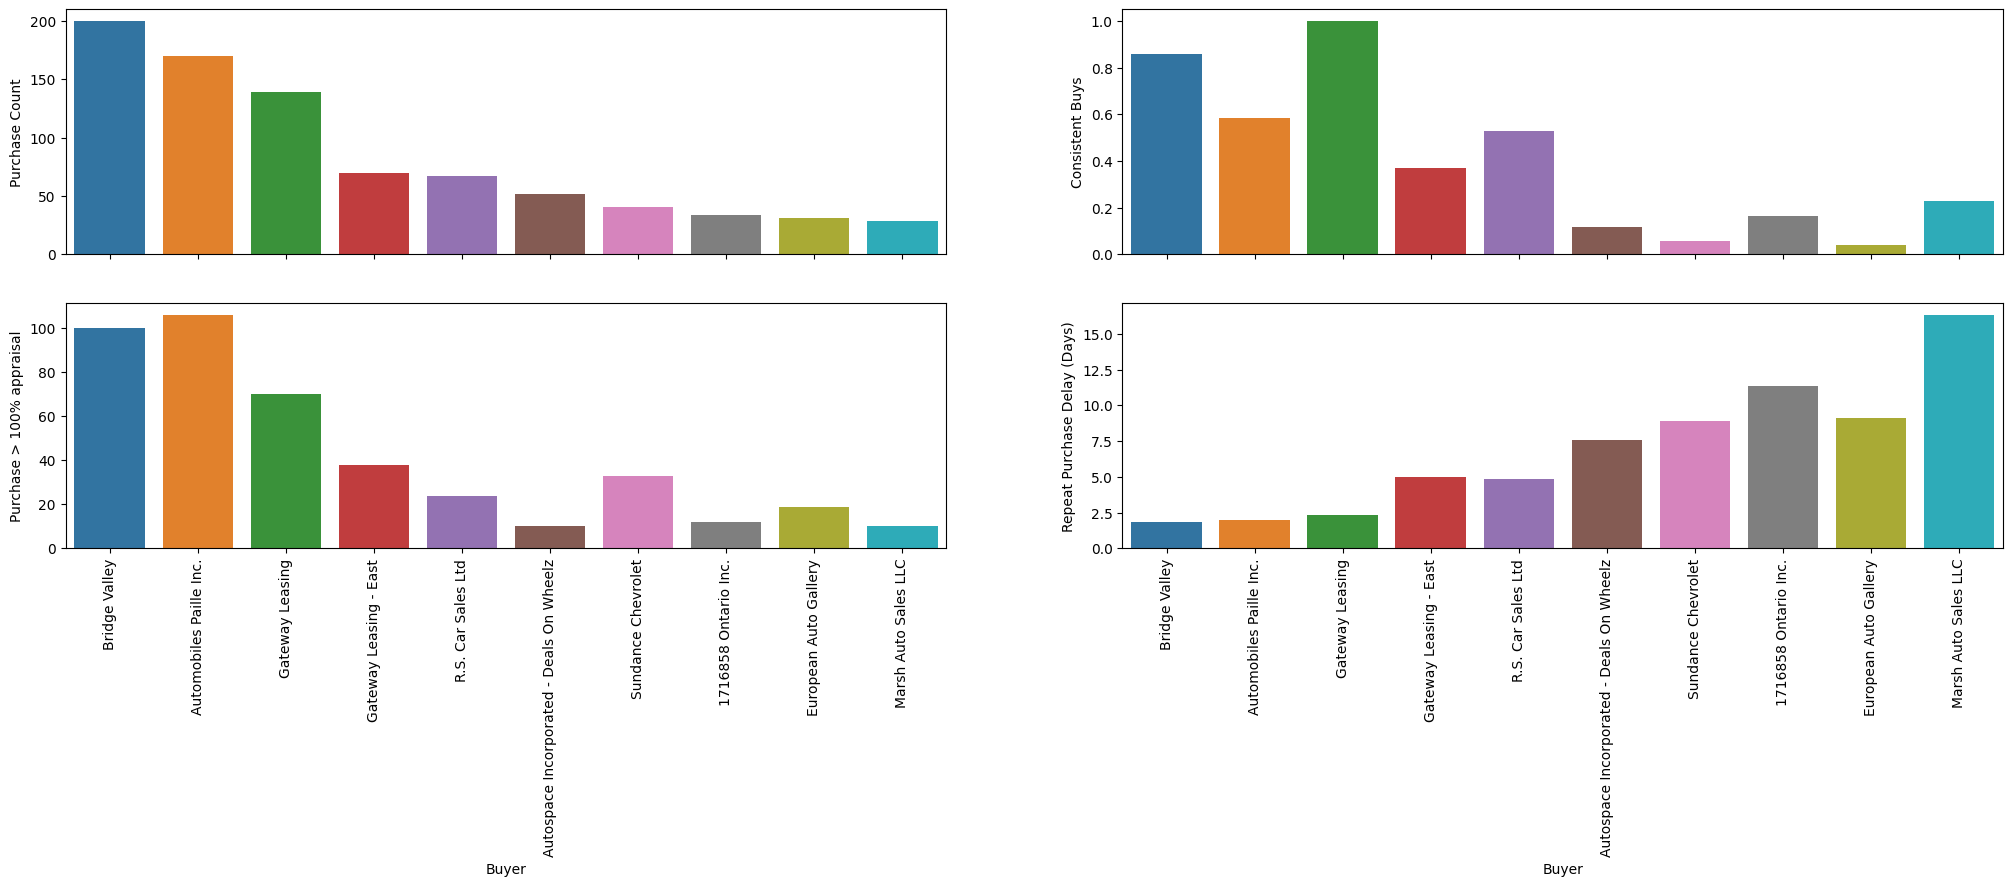

In [74]:
recommend_buyers_plot(data, "Ford", "F-150")

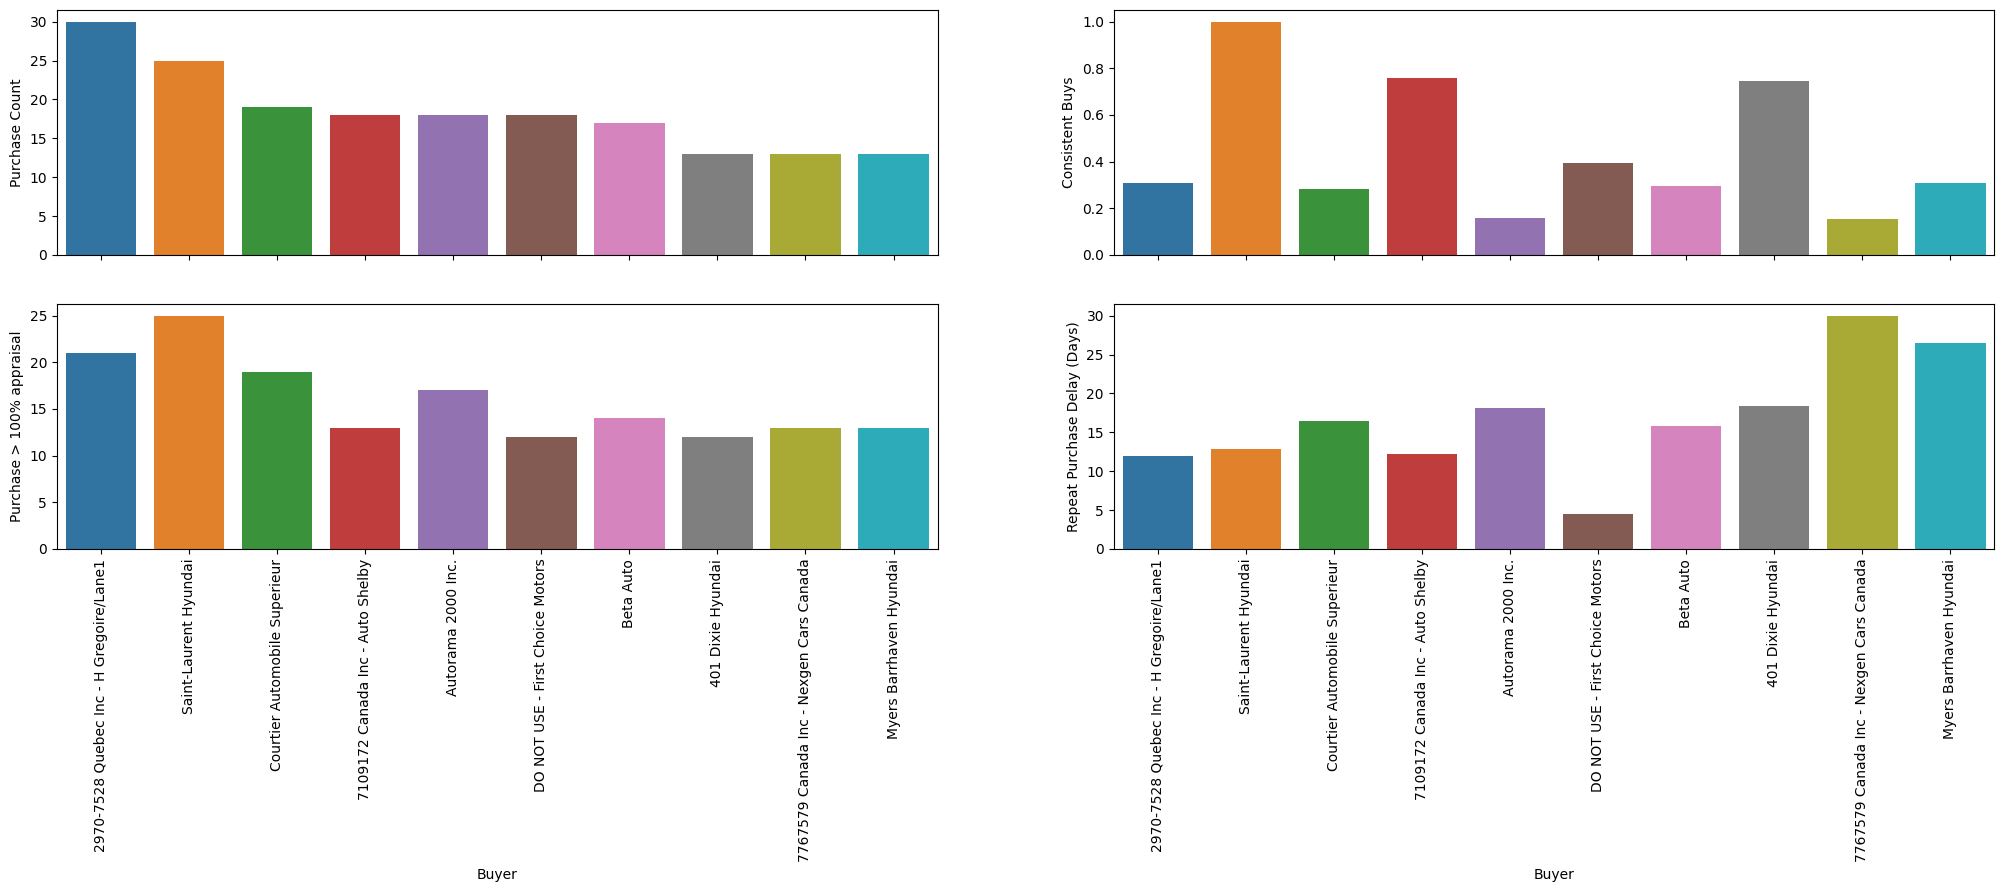

In [75]:
recommend_buyers_plot(data, "Hyundai", "Elantra")

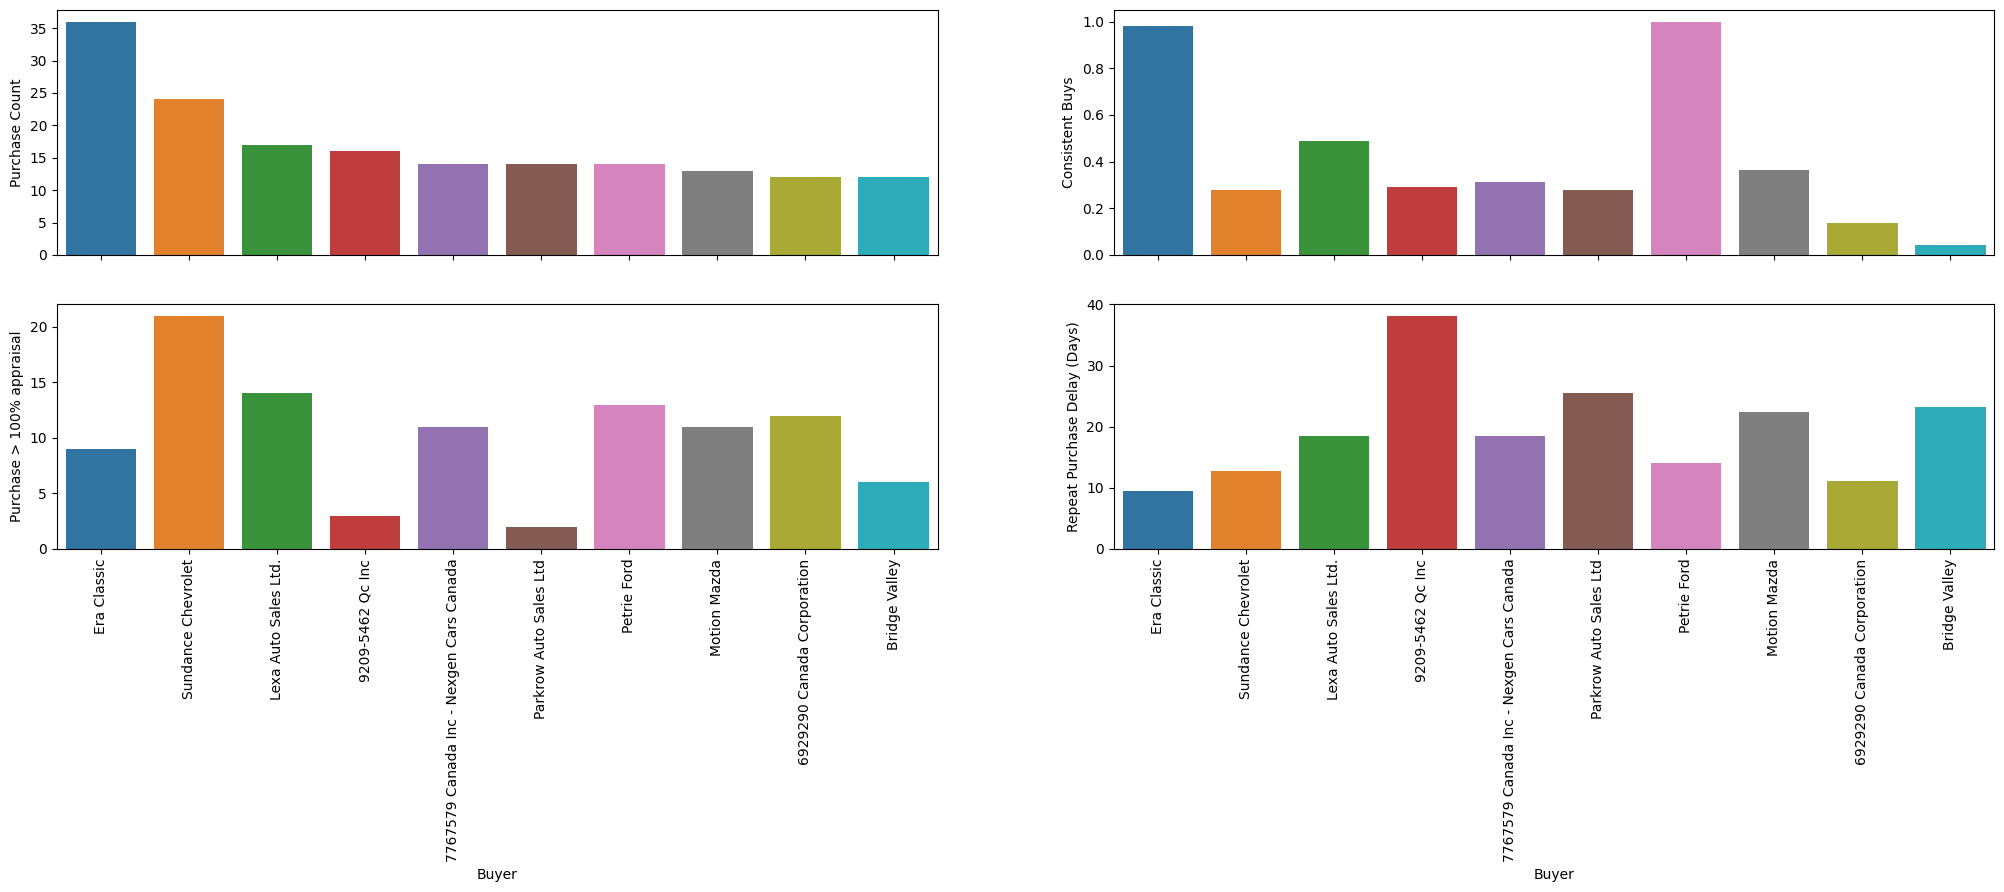

In [76]:
recommend_buyers_plot(data, "Ford", "Escape")

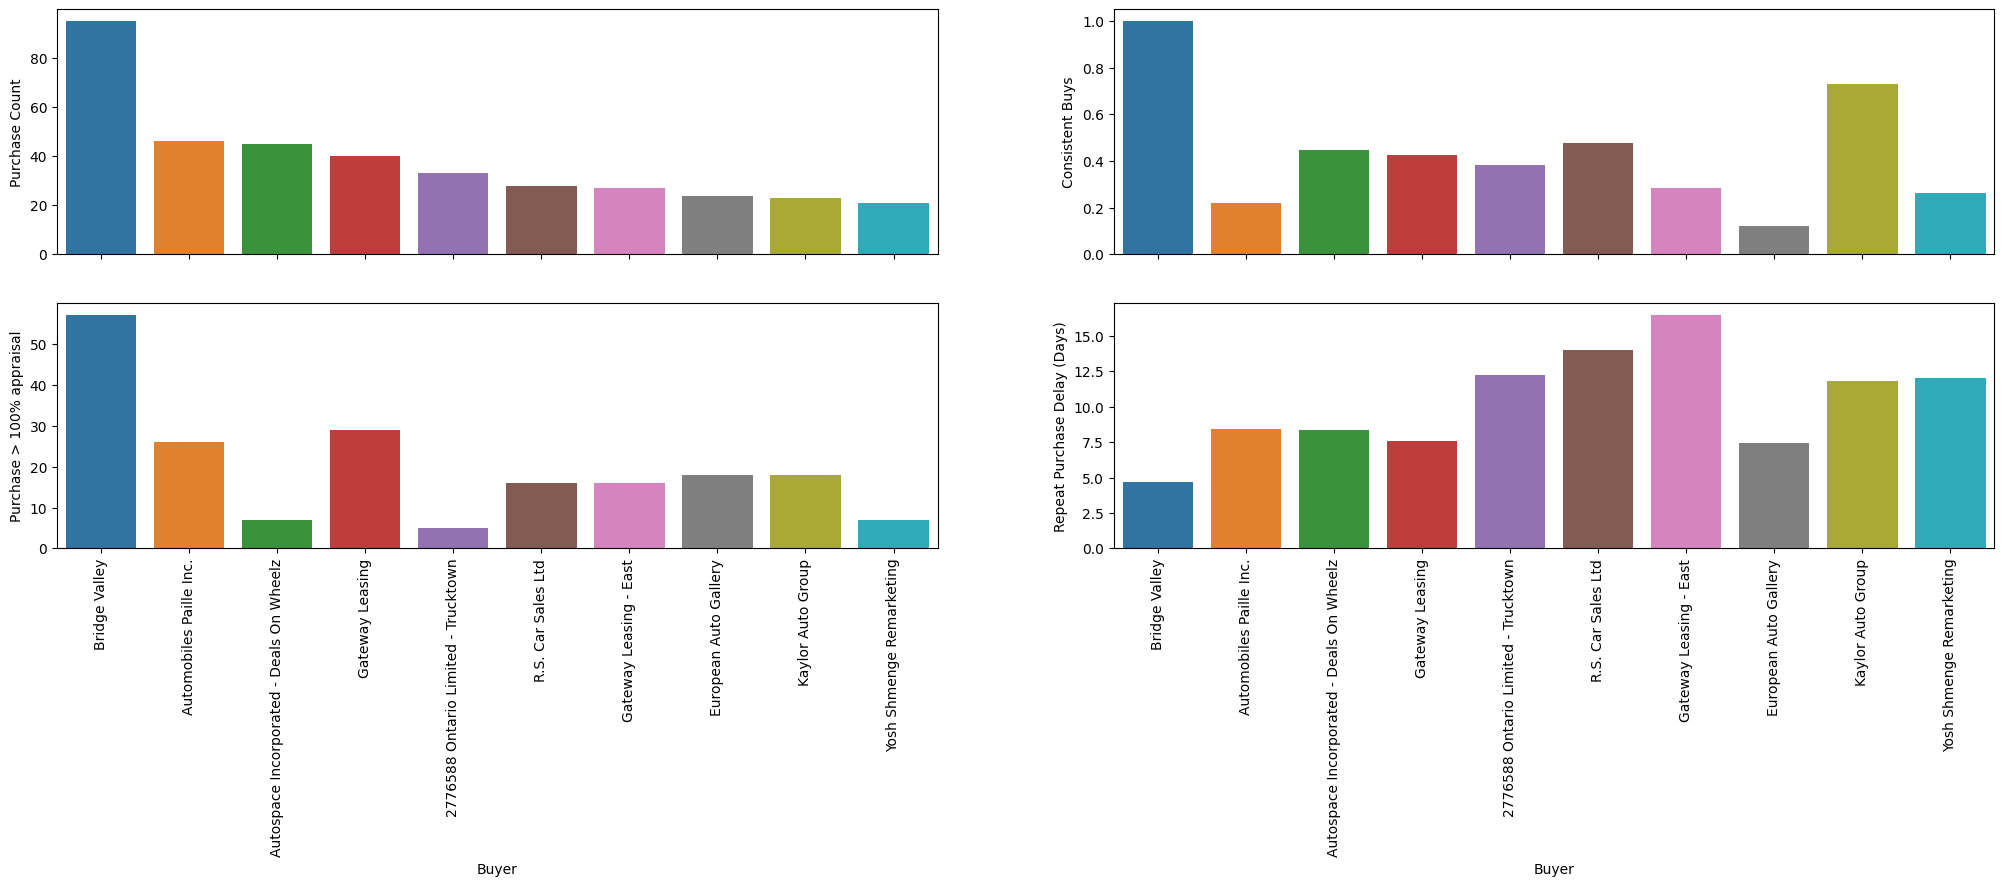

In [77]:
recommend_buyers_plot(data, "Ram", "1500")

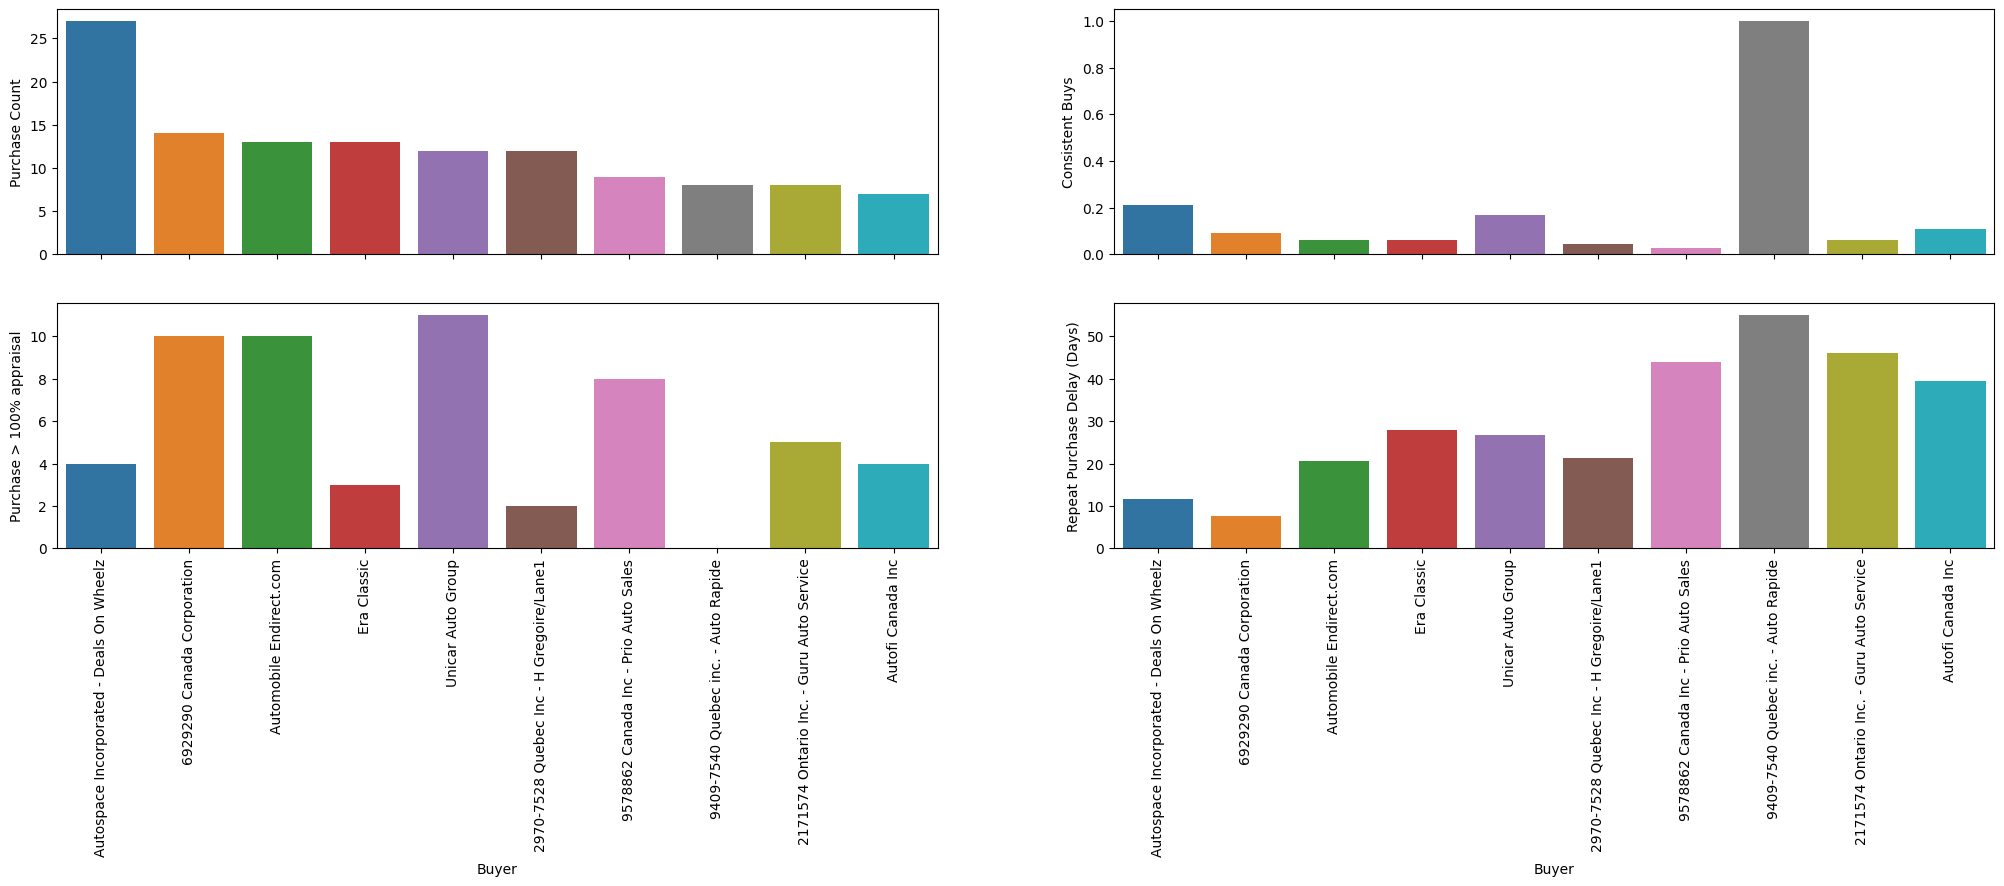

In [78]:
recommend_buyers_plot(data, "Dodge", "Grand Caravan", limit=5)

In [79]:
data.groupby(["Make", "Model"]).size().reset_index(name='Cars Bought').sort_values(by="Cars Bought", ascending=False).head()

,Make,Model,Cars Bought
193,Ford,F-150,1816
269,Hyundai,Elantra,1014
189,Ford,Escape,991
534,Ram,1500,981
164,Dodge,Grand Caravan,764


In [80]:
result[["Buyer", "Mileage", "Score", "Purchase Count"]].head(10)

,Buyer,Mileage,Score,Purchase Count
0,Wheels & Deals,201073.000000,68.0,1
1,HC & W Enterprise Corp,27755.000000,93.0,1
2,Mackenzie Auto Ltd. - SK,62782.000000,95.0,1
3,AFK Auto Wholesaler LTD,231462.000000,65.0,1
4,Pacific Nations Auto Sales And Finance Ltd,100308.333333,76.0,3
5,Legacy Cars - Legacy Auto Sales Inc,48403.000000,90.0,1
6,Kamloops Honda Cars,19017.000000,96.0,1
7,Vernon Nissan - Vernon Titanium Autogroup Ltd.,107362.000000,75.0,1
8,Seattle Direct Auto Sales,193505.000000,76.0,1
9,Morrey Volvo Of Burnaby,79394.000000,73.0,1


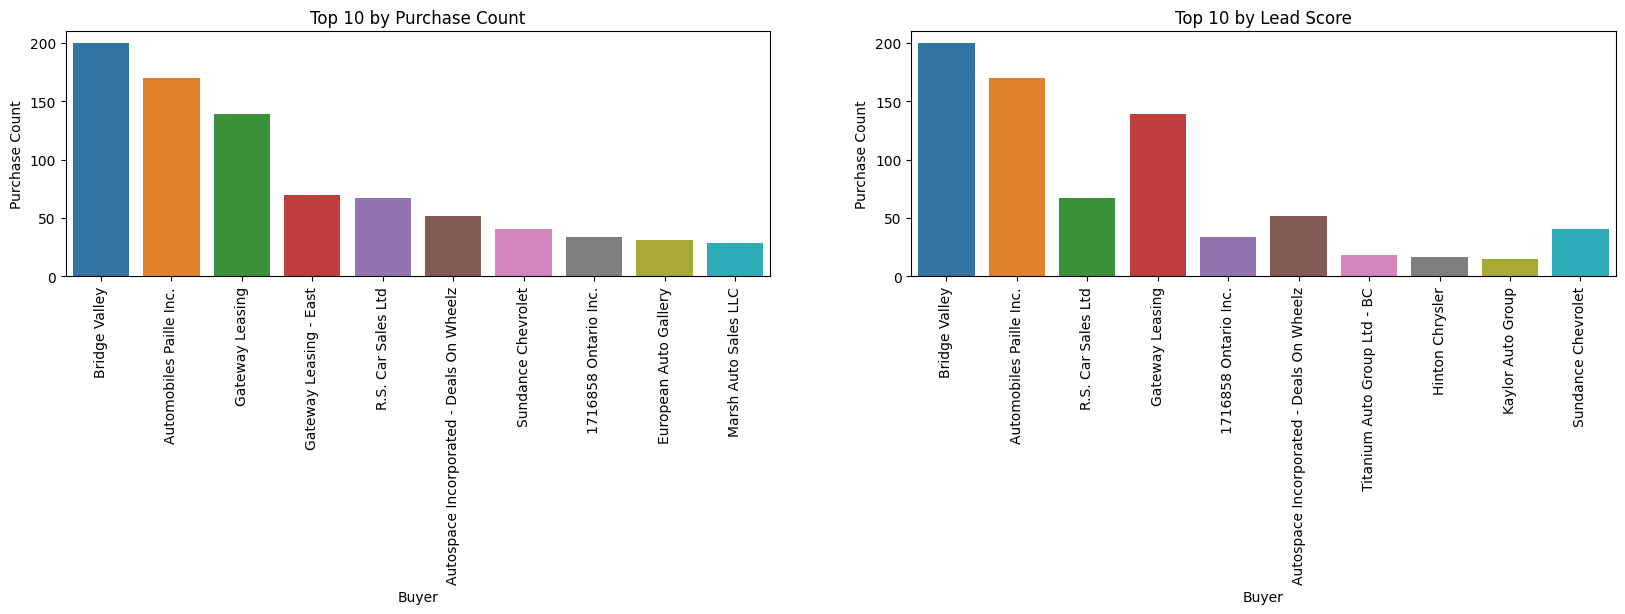

In [81]:
plt.figure(figsize=(20, 7))
plt.subplot(2,2,1)
ax1 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Purchase Count", ascending=False).head(10), x="Buyer", y="Purchase Count")
plt.xticks(rotation=90)
plt.title("Top 10 by Purchase Count")
plt.subplot(2,2,2)
ax2 = sns.barplot(data=result[result["Purchase Count"] > 10].sort_values(by="Lead Score", ascending=False).head(10), x="Buyer", y="Purchase Count")
plt.xticks(rotation=90)
plt.title("Top 10 by Lead Score")
plt.show()

In [82]:
def recommend_buyers_general(result: pd.DataFrame, num=5, by: str = "Purchase Count", ascending=False):

    buyers_dataframe = result[["Buyer", "Purchase Count", "Consistent Buys", "Greater100", "Greater105", "Greater110", "Repeat Purchase Delay",  "Purchase Price", "Lead Score"]]
    limit = 10
    buyers_dataframe = buyers_dataframe[buyers_dataframe["Purchase Count"] >= limit]
    buyers_dataframe.sort_values(by=by, ascending=ascending, inplace=True)

    return buyers_dataframe.head(num)

recommendations = recommend_buyers_count(result)
recommendations

,Buyer,Purchase Count,Consistent Buys,Greater100,Greater105,Greater110,Repeat Purchase Delay,Purchase Price
192,Bridge Valley,200,0.858986,100,80,54,1.843284,32314.000000
181,Automobiles Paille Inc.,170,0.583199,106,74,53,2.008197,40558.582353
173,Gateway Leasing,139,1.000000,70,55,39,2.370787,43851.582734
226,Gateway Leasing - East,70,0.371482,38,24,15,5.020408,38084.785714
235,R.S. Car Sales Ltd,67,0.530161,24,16,9,4.846154,30467.910448


In [83]:
recommend_buyers_general(result, num=10, by="Lead Score")

,Buyer,Purchase Count,Consistent Buys,Greater100,Greater105,Greater110,Repeat Purchase Delay,Purchase Price,Lead Score
192,Bridge Valley,200,0.858986,100,80,54,1.843284,32314.000000,2.858986
181,Automobiles Paille Inc.,170,0.583199,106,74,53,2.008197,40558.582353,2.583199
235,R.S. Car Sales Ltd,67,0.530161,24,16,9,4.846154,30467.910448,2.530161
173,Gateway Leasing,139,1.000000,70,55,39,2.370787,43851.582734,2.500000
217,1716858 Ontario Inc.,34,0.163764,12,8,3,11.375000,22830.882353,2.163764
265,Autospace Incorporated - Deals On Wheelz,52,0.115780,10,6,2,7.593750,16838.269231,2.115780
31,Titanium Auto Group Ltd - BC,18,0.089013,14,13,12,8.125000,41552.777778,2.089013
134,Hinton Chrysler,17,0.071868,12,11,11,12.888889,34947.058824,2.071868
58,Kaylor Auto Group,15,0.059991,15,15,13,8.600000,35836.666667,2.059991
89,Sundance Chevrolet,41,0.059818,33,27,17,8.894737,29128.048780,2.059818


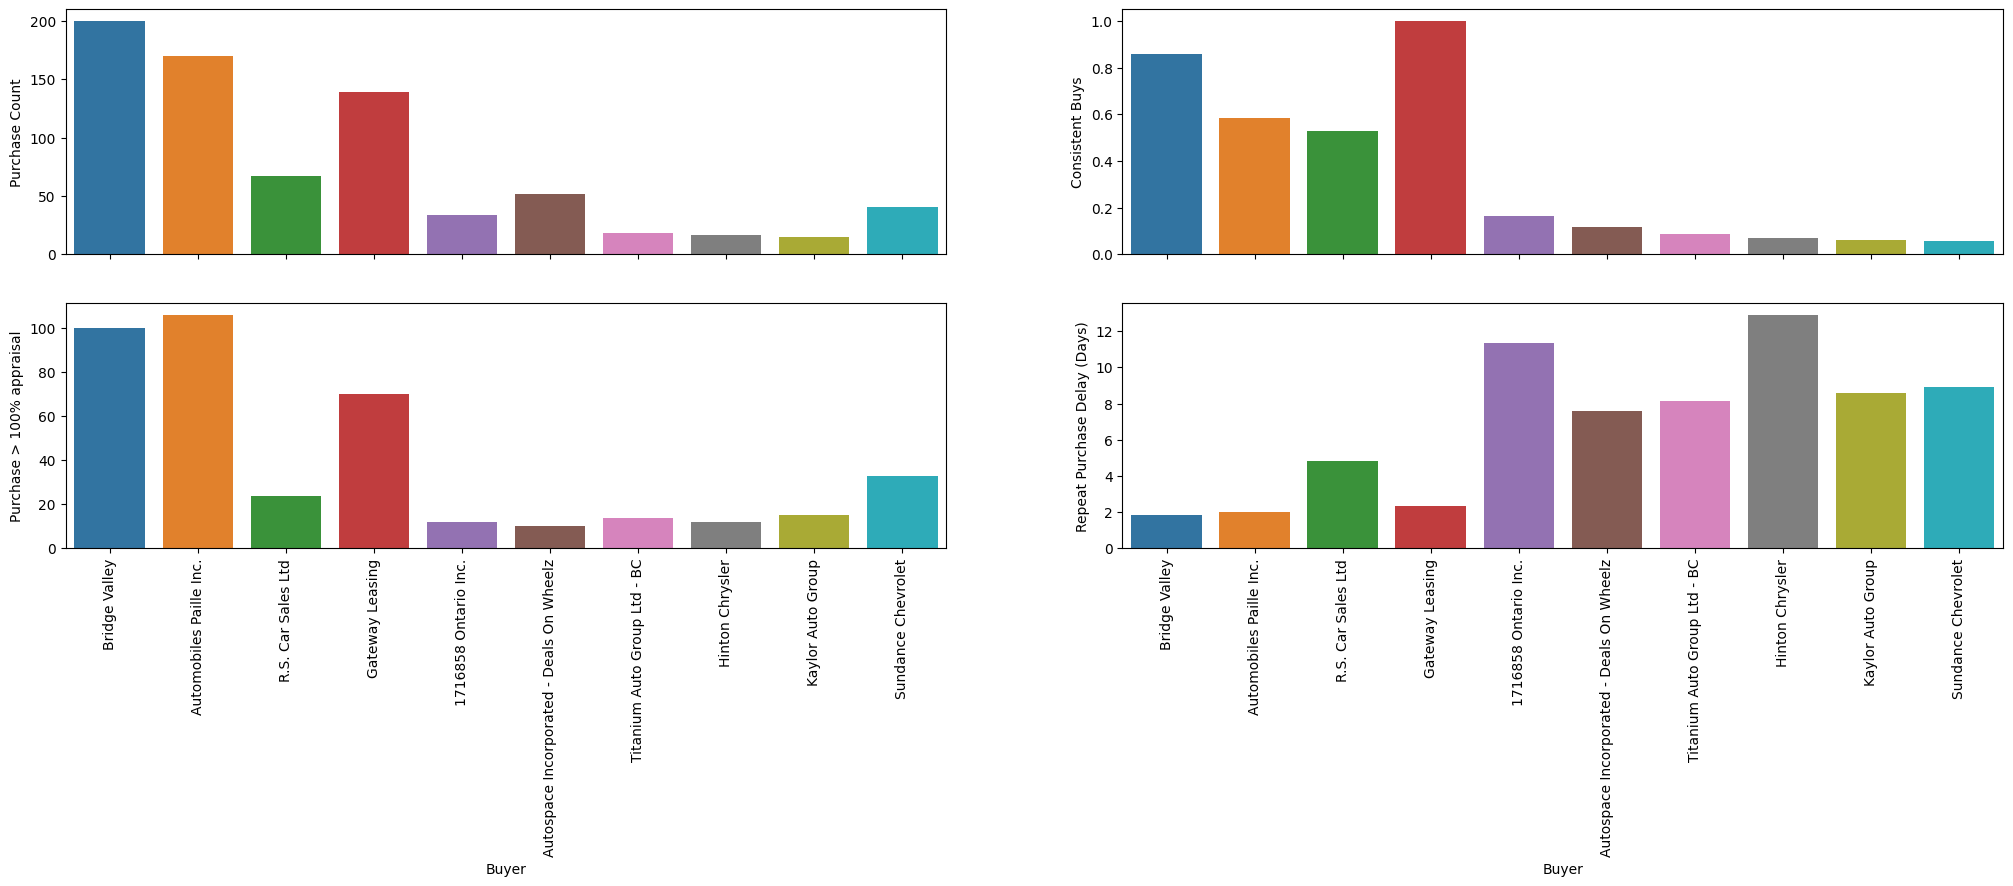

In [84]:
recommend_buyers_plot(data, "Ford", "F-150", by="Lead Score")

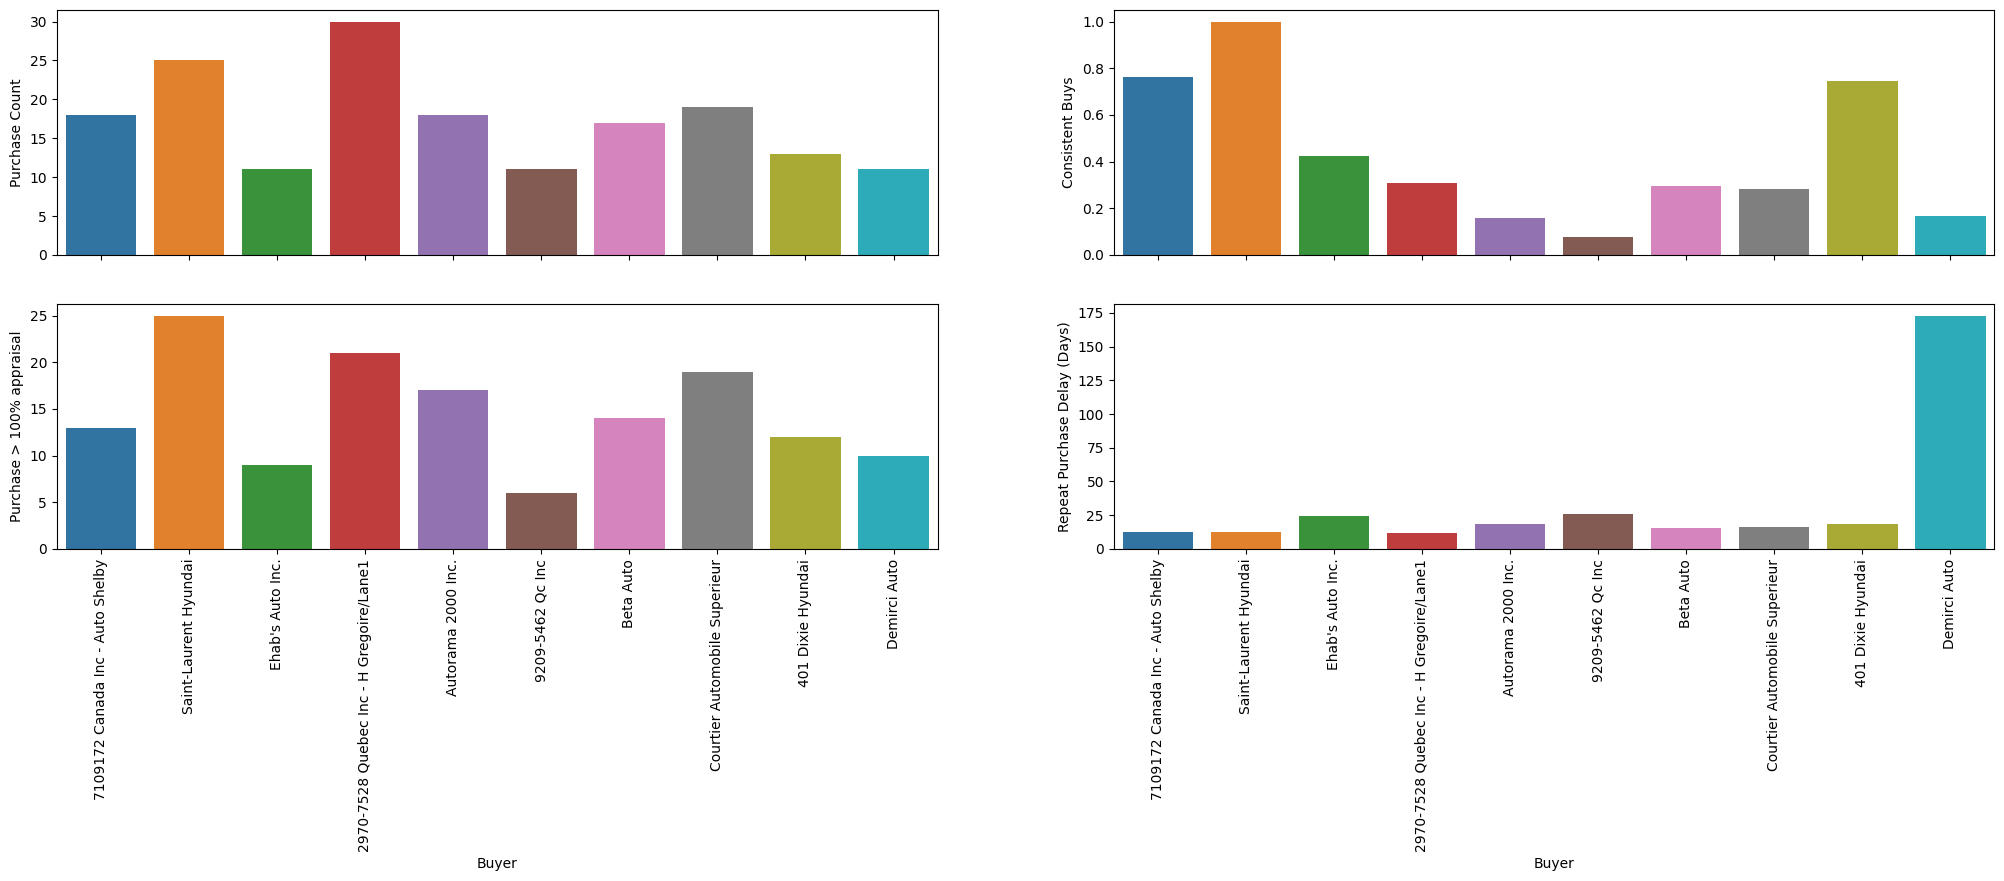

In [85]:
recommend_buyers_plot(data, "Hyundai", "Elantra", by="Lead Score")

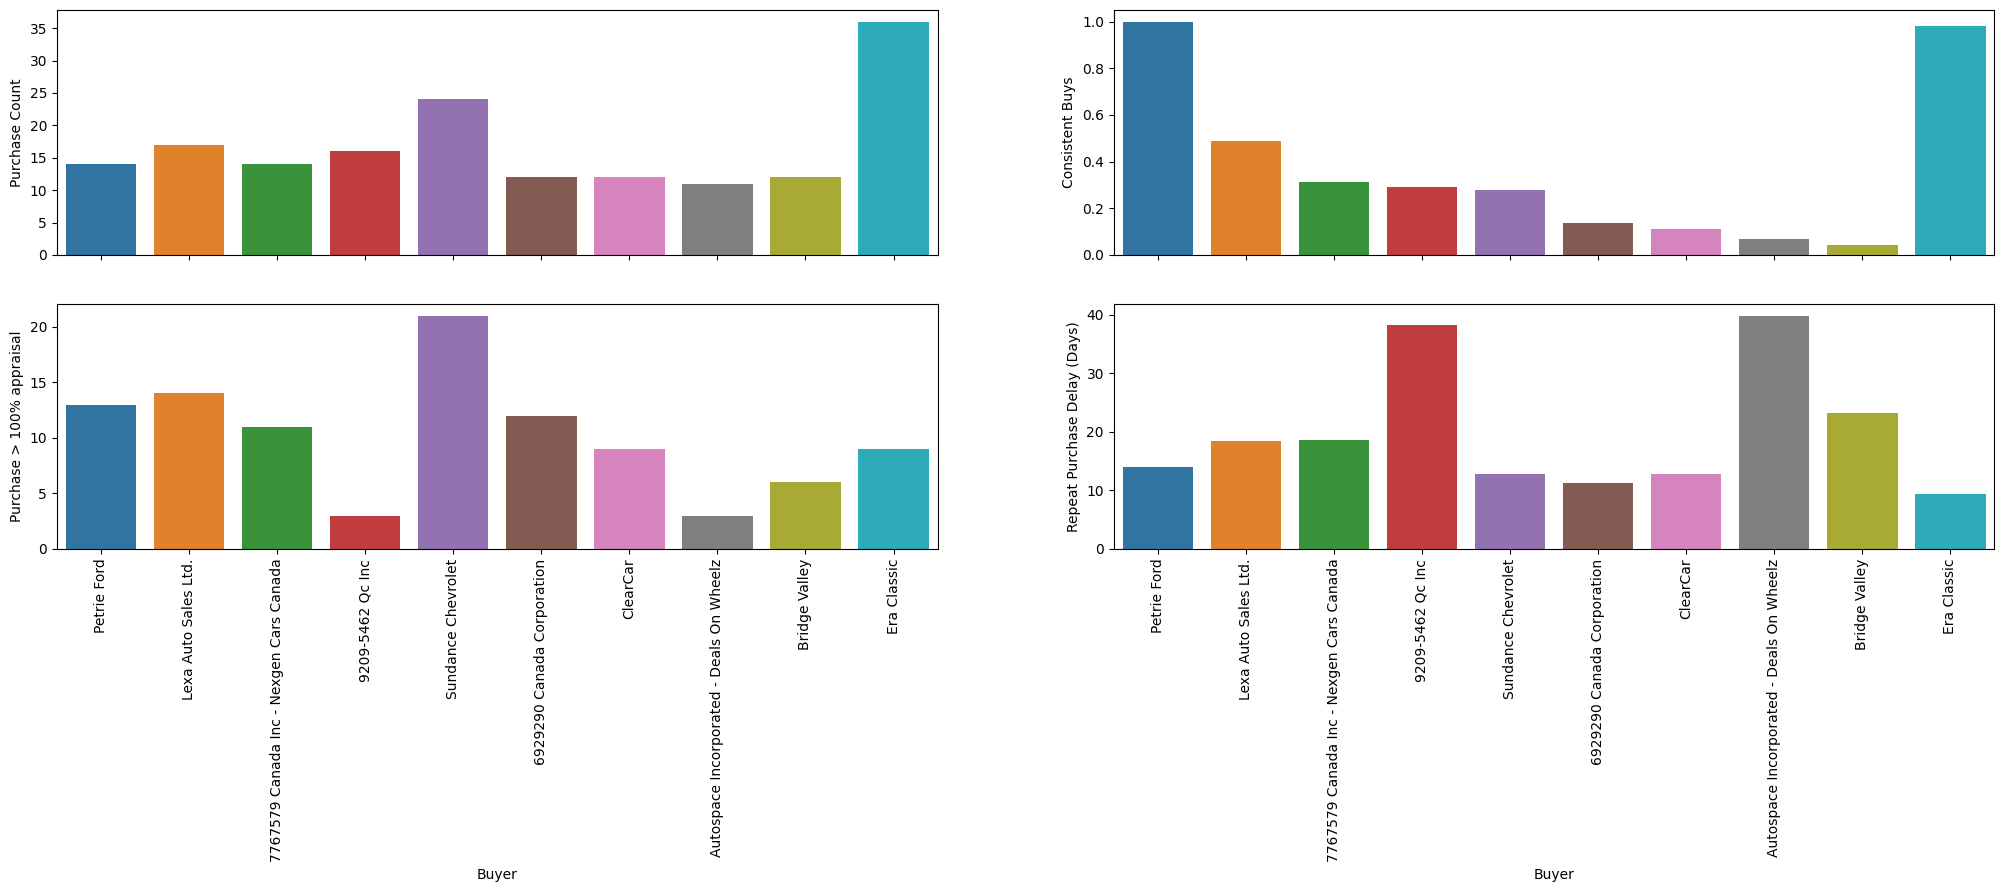

In [86]:
recommend_buyers_plot(data, "Ford", "Escape", by="Lead Score")

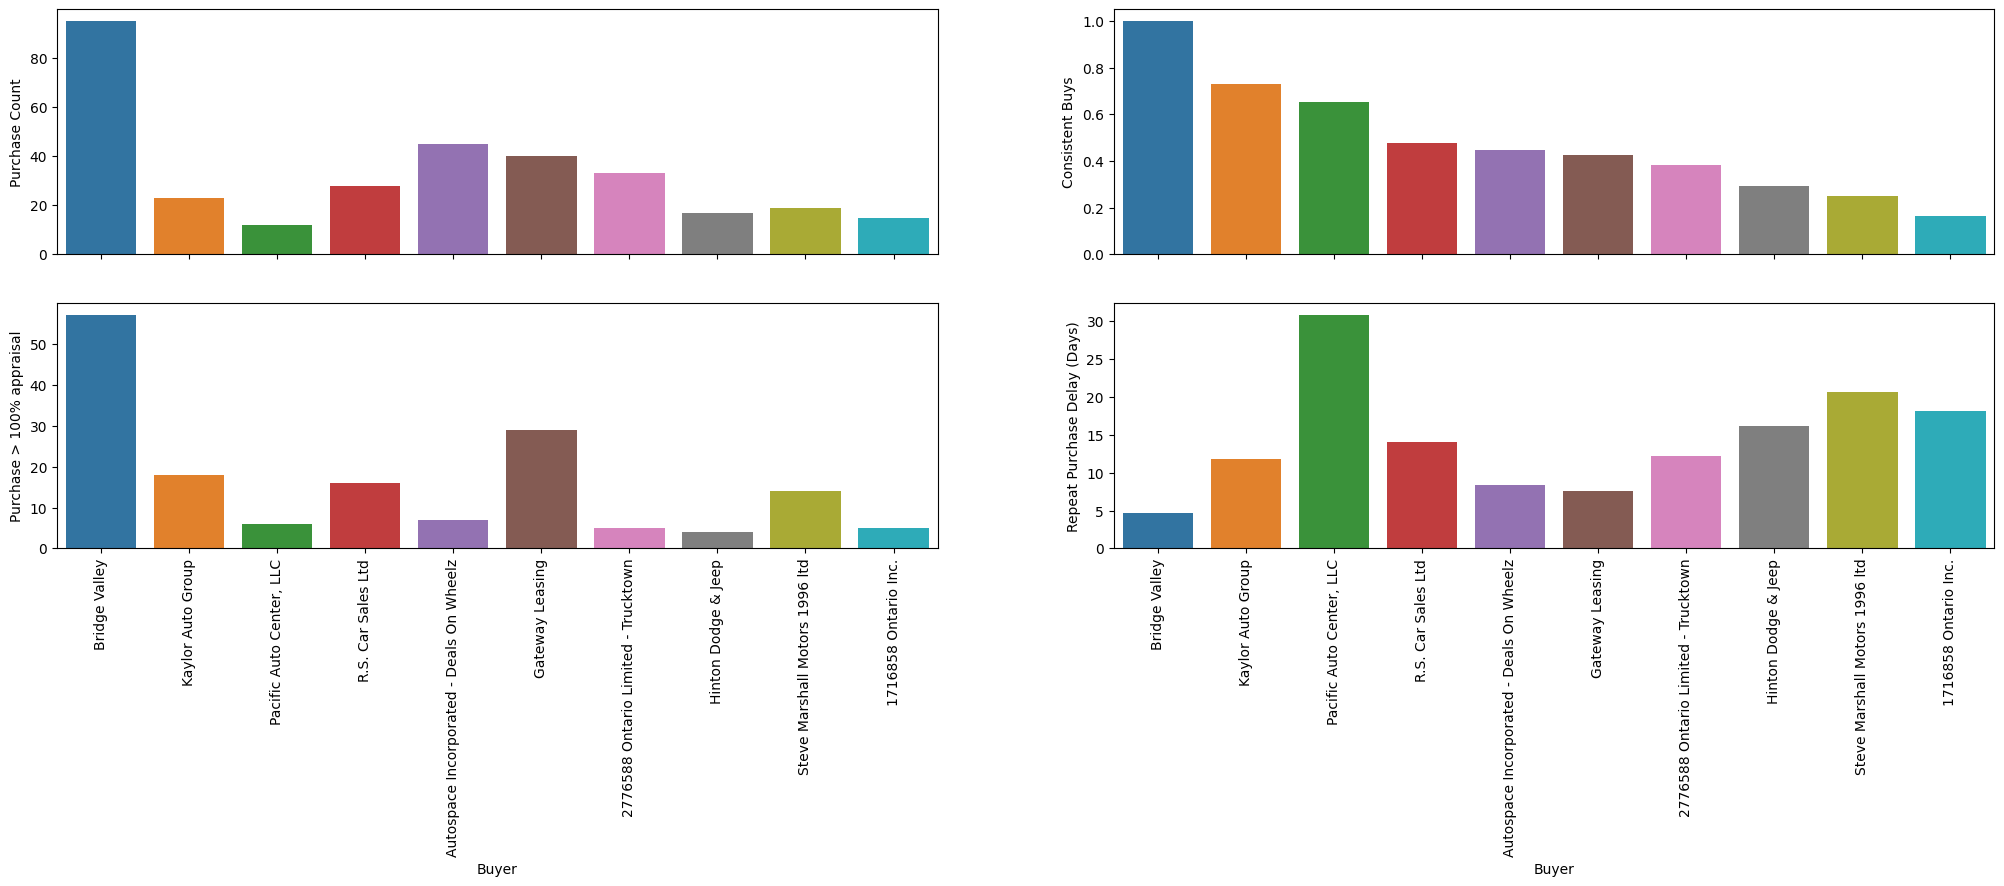

In [87]:
recommend_buyers_plot(data, "Ram", "1500", by="Lead Score")

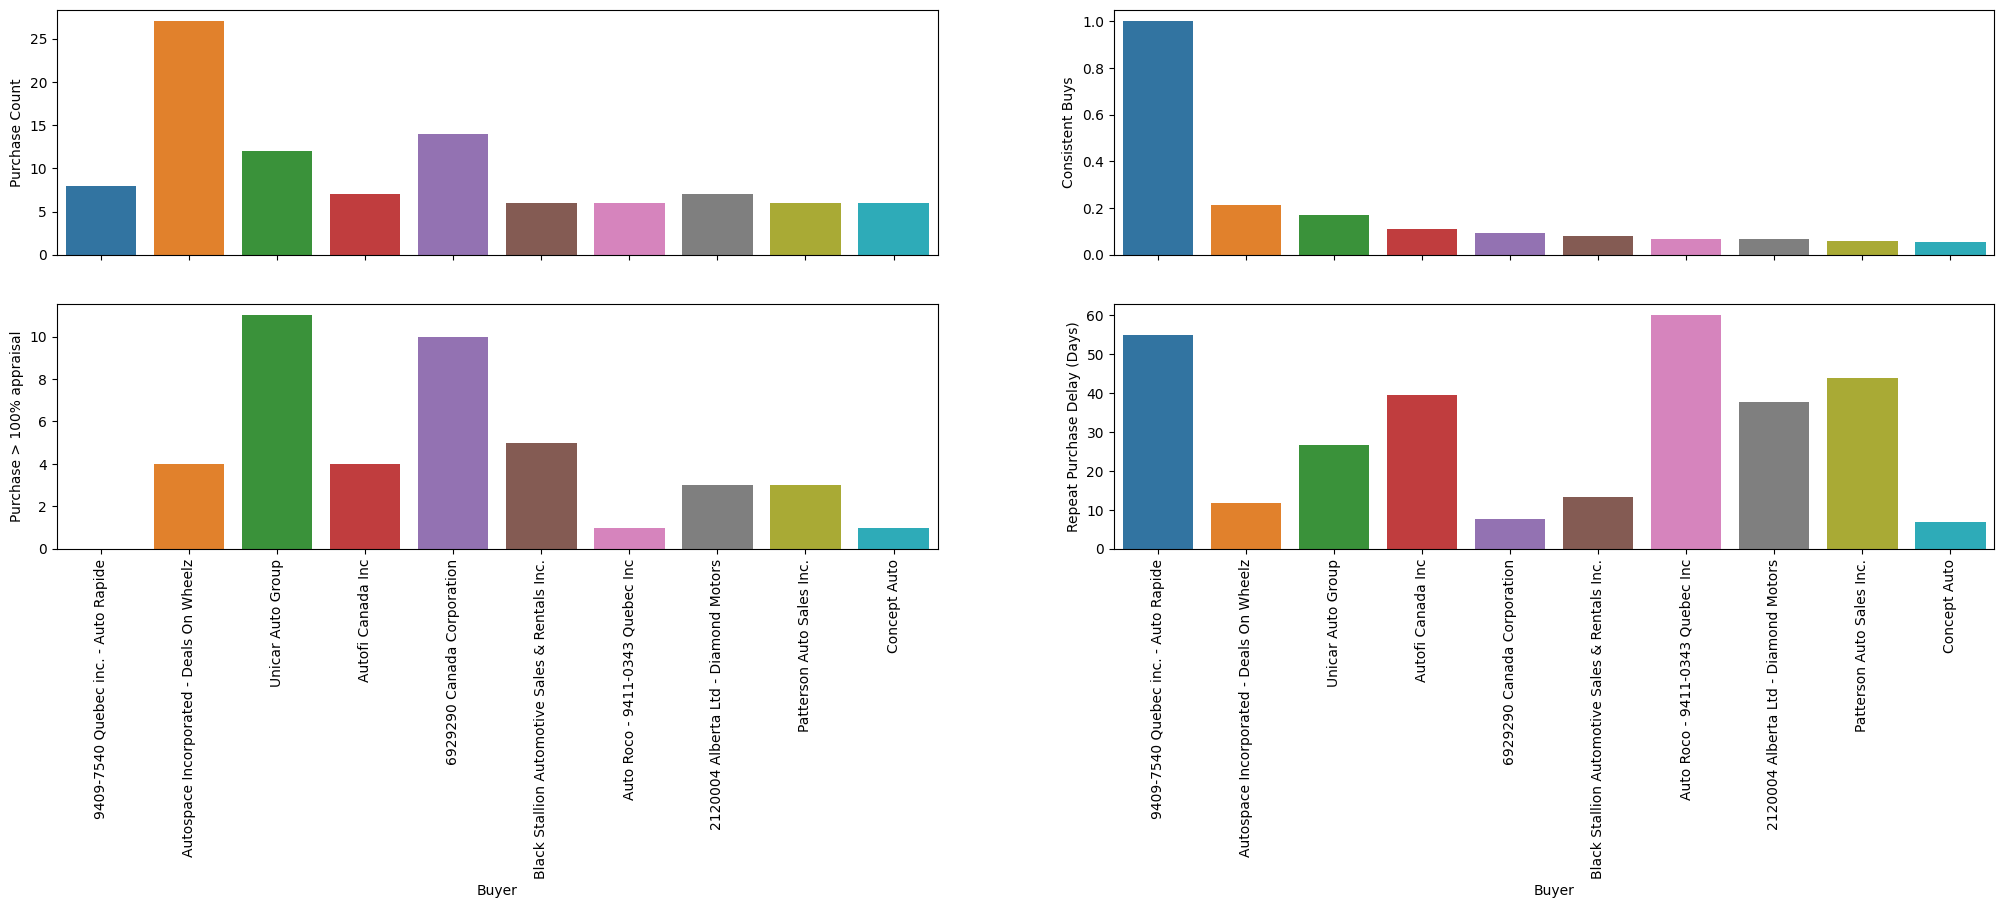

In [88]:
recommend_buyers_plot(data, "Dodge", "Grand Caravan", by="Lead Score", limit=5)

## Unused Code

```
def last_three_month_buys(data: pd.DataFrame, buyer: str, make: str, model: str):
    
    df = data[["Buyer", "Date"]][(data["Model"] == model) & (data["Make"] == make) & (data["Buyer"] == buyer)]
    new_df = df[(datetime.now().month - df["Date"].dt.month) <= 3]
    return len(new_df)
```

```
def calculate_profitability_score(data, buyer:str, make: str, model: str):

    transactions = data[(data['Buyer'] == buyer) & (data['Model'] == model) & (data['Make'] == make)]

    if len(transactions) == 0:
        return None


    profitable_transactions = transactions[transactions['Purchase Price'] >= transactions['110']]

    profitable_frequency = len(profitable_transactions)
    
    profitability_score = profitable_frequency / len(transactions)

    return profitability_score
```


```
from sklearn.preprocessing import MinMaxScaler

def purchase_power_index(result: pd.DataFrame):
    """
    Calculate the Purchase Power Index based on the number and average value of transactions.
    :param df: DataFrame with columns 'purchase_count' and 'avg_purchase_price'.
    :return: Purchase Power Index.
    """
    
    power_index = result['Purchase Count'] * result['Purchase Price']
    # Reshape the data for Min-Max scaling
    power_index_reshaped = power_index.values.reshape(-1, 1)

    scaler = MinMaxScaler()
    scaled_power_index = scaler.fit_transform(power_index_reshaped)
    return scaled_power_index.ravel()
```

```
def plot_results(recommendations: pd.DataFrame):
    plt.figure(figsize=(40,25))
    
    # Plot 1
    plt.subplot(2,3,1)
    ax1 = sns.barplot(data=recommendations, x="Buyer", y="Lead Score")
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    
    # Plot 2
    plt.subplot(2,3,2)
    ax2 = sns.barplot(data=recommendations, x="Buyer", y="Consistent Buys")
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
    
    # Plot 3
    plt.subplot(2,3,3)
    ax3 = sns.barplot(data=recommendations, x="Buyer", y="Gain Score")
    ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)

    # Plot 4
    plt.subplot(2,3,4)
    ax4 = sns.barplot(data=recommendations, x="Buyer", y="Purchase Price")
    ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)
    
    # Plot 5
    plt.subplot(2,3,5)
    ax5 = sns.barplot(data=recommendations, x="Buyer", y="Purchase Count")
    ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45)

    plt.show()
```